<img src="logo.png" alt="Logo">

# **Optimising Transjakarta Corridor 1:**
## **Integrating Public Services and Ensuring Operational Sustainability**


---

## **01. Introduction**

### **1.1 Background**

Transjakarta, one of Jakarta's major public transportation providers, strives to offer its customers effective, reasonably priced, and traffic-free services. Corridor 1 Blok M – Kota is one of the busiest routes, handling up to 65,000–70,000 people daily. The Transjakarta Corridor 1 route, which is thought to overlap with the MRT line, is being examined for removal or rerouting in light of the building of the MRT system that would connect Lebak Bulus to Kota in 2029.

Nonetheless, there is disagreement over the policy, particularly among those who take public transit. Given that Transjakarta consumers vary from MRT users in several ways, others contend that Corridor 1 should not be eliminated. This has to do with variations in prices, accessibility, and general travel trends. Furthermore, Transjakarta is now a complementing transport system as it has been combined with other transit options like the Jabodebek LRT and KAI Commuter.

### **1.2 Problem Statement**
How can Transjakarta address the transportation demands of users who rely on Corridor 1 while optimising operations to minimise overlap with MRT?

### **1.3 Approach**
1. **Analysis of Corridor 1 Passenger Travel Patterns**: This study uses tap-in/tap-out data to identify the primary routes of travel and the function of Corridor 1 in terms of user mobility.
2. **Impact Evaluation of Corridor 1 Removal**: Examining the possible loss of user accessibility in the event that Corridor 1 is entirely eliminated.
3. **Corridor 1 Rerouting Simulation**: creating other routes that minimise overlap with MRT lines while preserving service for people in non-MRT locations.

---
## **02. Import Package**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
from sklearn.preprocessing import LabelEncoder
import math
import scipy.stats as stats
from scipy.stats import fisher_exact
from scipy.stats import ttest_rel


import warnings
warnings.filterwarnings("ignore")

---

## **03. Read Data**

In order to answer the problem statement, the study will concentrate on the information gathered from Transjakarta in April 2023.

In [92]:
df = pd.read_csv("Transjakarta.csv")

---

## **04. Data Understanding**

Below is a description of the variables or columns found in the Transjakarta data.

Data about tap-in and tap-out occurrences, as well as customer identifying information, are included in the dataset's 22 columns.

| **Column Name**       | **Column Description**                                                              |
|-----------------------|------------------------------------------------------------------------------------|
| **transID**           | Unique transaction ID for every transaction.                                       |
| **payCardID**         | Customer's main identifier. The card customers use as a ticket for entrance and exit. |
| **payCardBank**       | Customer's card bank issuer name.                                                  |
| **payCardName**       | Customer's name that is embedded in the card.                                      |
| **payCardSex**        | Customer's sex that is embedded in the card.                                       |
| **payCardBirthDate**  | Customer's birth year.                                                             |
| **corridorID**        | Corridor ID or Route ID as a key for route grouping.                               |
| **corridorName**      | Corridor Name or Route Name, containing the start and finish points for each route.|
| **direction**         | Direction of the route: 0 for Go, 1 for Back.                                      |
| **tapInStops**        | Tap In (entrance) Stops ID for identifying stops name.                             |
| **tapInStopsName**    | Tap In (entrance) Stops Name where customers tap in.                               |
| **tapInStopsLat**     | Latitude of Tap In Stops.                                                          |
| **tapInStopsLon**     | Longitude of Tap In Stops.                                                         |
| **stopStartSeq**      | Sequence of the stops, 1st stop, 2nd stop, etc., related to direction.             |
| **tapInTime**         | Time of tap in (date and time).                                                    |
| **tapOutStops**       | Tap Out (exit) Stops ID for identifying stops name.                                |
| **tapOutStopsName**   | Tap Out (exit) Stops Name where customers tap out.                                 |
| **tapOutStopsLat**    | Latitude of Tap Out Stops.                                                         |
| **tapOutStopsLon**    | Longitude of Tap Out Stops.                                                        |
| **stopEndSeq**        | Sequence of the stops, 1st stop, 2nd stop, etc., related to direction.             |
| **tapOutTime**        | Time of tap out (date and time).                                                   |
| **payAmount**         | The amount customers pay. Some are free, some are not.                             |
| **age**               | Customer's age.                                                                     |
| **ageCategory**       | Customer's age category (e.g., Adult, Teenager).                            |
| **serviceType**       | Type of service (if applicable).                                                   |
| **distance_km**       | Distance of the trip in kilometers.                                                |
| **seqDiff**           | Difference in sequence between stops.                                              |
| **tripDuration**      | Duration of the trip in minutes or hours.                                          |
| **dayOfWeek**         | The day of the week when the trip occurred.                                        |
| **peakHour**          | Whether the trip occurred during peak hours or not.                                |
| **tapIn_timeOfDay**   | The time of day when the customer taps in.                                         |
| **tapOut_timeOfDay**  | The time of day when the customer taps out.                                        |


### **4.1 Understanding Data using Descriptive Analysis**

Understanding the available data is crucial before moving forward with additional analysis. To start, a descriptive analysis is conducted to look at each variable's identity and distribution.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [94]:
display(df.describe(include="number"))
display(df.describe(include="object"))

payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04      37900.000000  37900.000000   37900.000000   
mean   4.250060e+17       1990.089314      0.500633      -6.214838   
std    1.321699e+18         13.051482      0.500006       0.057911   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800442e+14       1982.000000      0.000000      -6.245863   
50%    3.507947e+15       1990.000000      1.000000      -6.214587   
75%    4.699023e+15       2001.000000      1.000000      -6.175528   
max    4.997694e+18       2012.000000      1.000000      -6.089429   

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count   37900.000000  37900.000000    36556.000000    36556.000000   
mean      106.841554     13.572480       -6.214651      106.841233   
std         0.060369     12.237623        0.059022        0.060999   
min       106.614730      0.000000       -6.394973      106.614730   
25%       106.803470      4.000000       -6.247225      106.801750   
50%       106.834830     10.000000       -6.214718      106.834580   
75%       106.882270     19.000000       -6.174736      106.883030   
max       107.023950     68.000000       -6.091746      107.023660   

         stopEndSeq     payAmount  
count  36556.000000  36893.000000  
mean      21.219909   2699.712683  
std       13.800689   4212.225592  
min        1.000000      0.000000  
25%       11.000000      0.000000  
50%       18.000000   3500.000000  
75%       29.000000   3500.000000  
max       77.000000  20000.000000

transID payCardBank         payCardName payCardSex corridorID  \
count            37900       37900               37900      37900      36643   
unique           37900           6                1993          2        221   
top     EIIW227B8L34VB         dki  Fathonah Saefullah          F         1T   
freq                 1       18743                  80      20157        400   

                corridorName tapInStops tapInStopsName            tapInTime  \
count                  35970      36687          37900                37900   
unique                   216       2570           2602                37079   
top     Cibubur - Balai Kota     P00170    Penjaringan  2023-04-25 06:23:00   
freq                     391        236            243                    3   

       tapOutStops tapOutStopsName           tapOutTime  
count        35611           36556                36556  
unique        2230            2248                35908  
top         P00016             BKN  2023-04-10 19:10:15  
freq           306             316                    3

In [95]:
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Column Name": i,
        "Number of Unique": unique_count,
        "Data Type": data_type,
        "Unique Sample": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)


Column Name  Number of Unique Data Type  \
0            transID             37900    object   
1          payCardID              2000     int64   
2        payCardBank                 6    object   
3        payCardName              1993    object   
4         payCardSex                 2    object   
5   payCardBirthDate                67     int64   
6         corridorID               221    object   
7       corridorName               216    object   
8          direction                 2   float64   
9         tapInStops              2570    object   
10    tapInStopsName              2602    object   
11     tapInStopsLat              2587   float64   
12     tapInStopsLon              2458   float64   
13      stopStartSeq                67     int64   
14         tapInTime             37079    object   
15       tapOutStops              2230    object   
16   tapOutStopsName              2248    object   
17    tapOutStopsLat              2237   float64   
18    tapOutStopsLon              2139   float64   
19        stopEndSeq                74   float64   
20        tapOutTime             35908    object   
21         payAmount                 3   float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0                                                                


1. **transID**: This column contains 37,900 unique transaction identifiers, stored as strings (object data type). Each value represents a unique transaction and is alphanumeric, such as "EIIW227B8L34VB" or "LGXO740D2N47GZ".
2. **payCardID**: There are 2,000 unique pay card identifiers in this column, stored as integers. Each identifier corresponds to a specific pay card used for the transaction, such as "180062659848800" or "4885331907664776".
2. **payCardBank**: The "payCardBank" column has 6 unique values, stored as strings. These represent the banks associated with the pay cards, including options like "emoney", "dki", "flazz", "online", "brizzi", and "bni".
3. **payCardName**: This column includes 1,993 unique cardholder names, stored as strings. Each entry represents the name of the individual associated with the pay card, such as "Bajragin Usada" or "Gandi Widodo".
4. **payCardSex**: There are 2 unique values in the "payCardSex" column, representing the gender of the cardholder. The values are "M" for male and "F" for female.
5. **payCardBirthDate**: This column contains 67 unique birth years, stored as integers. The birth years range from 1974 to 2008, reflecting the ages of the cardholders.
6. corridorID: The "corridorID" column has 221 unique identifiers for the Transjakarta route corridors, stored as strings. These identifiers vary from simple numeric values like "5" to alphanumeric codes such as "6C" and "R1A".
7. **corridorName**: There are 216 unique names of Transjakarta route corridors in this column, stored as strings. The names represent different routes, such as "Matraman Baru - Ancol" or "Stasiun Tebet - Karet".
8. **direction**: The "direction" column contains 2 unique values, stored as float64. These values indicate the travel direction, where "1.0" represents one direction and "0.0" represents the opposite direction.
9. **tapInStops**: This column includes 2,570 unique identifiers for tap-in stop locations, stored as strings. Examples of identifiers include "P00142" and "B01963P".
10. **tapInStopsName**: There are 2,602 unique names of tap-in stop locations, stored as strings. Some examples of tap-in stop names are "Pal Putih", "Kemenkes 2", and "Gg. Kunir II".
11. **tapInStopsLat**: The "tapInStopsLat" column contains 2,587 unique latitude coordinates, stored as floating-point numbers. These represent the geographic latitude of each tap-in stop, such as -6.184631 and -6.2287.
12. **tapInStopsLon**: This column includes 2,458 unique longitude coordinates, stored as floating-point numbers. These coordinates correspond to the longitude of each tap-in stop, such as 106.84402 and 106.83302.
13. **stopStartSeq**: The "stopStartSeq" column has 67 unique integer values, representing the sequence number of each stop within a route. Examples include 7, 13, and 38.
14. **tapInTime**: This column contains 37,079 unique timestamps, stored as strings. Each timestamp indicates the precise time when a passenger taps in at a stop, formatted as "YYYY-MM-DD HH:MM:SS", such as "2023-04-03 05:21:44" and "2023-04-03 05:42:44".
15. **tapOutStops**: The "tapOutStops" column consists of 2,230 unique identifiers for tap-out stop locations, stored as strings. Identifiers include values like "P00253" and "B03307P".
16. **tapOutStopsName**: There are 2,248 unique names for tap-out stop locations, stored as strings. Examples include "Tegalan", "Sampoerna Strategic", and "Simpang Kunir K".
17. **tapOutStopsLat**: This column contains 2,237 unique latitude coordinates for tap-out stops, stored as floating-point numbers. Latitude values range from -6.203101 to -6.217152.
18. **tapOutStopsLon**: The "tapOutStopsLon" column contains 2,139 unique longitude coordinates for tap-out stops, stored as floating-point numbers. Longitude values include 106.85715, 106.81892, and 106.81475.
19. **stopEndSeq**: The "stopEndSeq" column contains 74 unique sequence numbers, stored as float64 values. These represent the sequence of stops at the end of the route, with some missing values (represented as "nan").
20. **tapOutTime**: This column contains 35,908 unique timestamps, stored as strings, indicating the precise time when a passenger taps out at a stop. The format is "YYYY-MM-DD HH:MM:SS", with example entries like "2023-04-03 06:00:53" and "2023-04-03 06:40:01".
21. **payAmount**: The "payAmount" column includes 3 unique values, stored as float64. These represent the amount paid for the trip, with values such as 3500.0, 20000.0, and 0.0. Some entries have missing values (represented as "nan").

In [96]:
pd.reset_option("all")

def df_null_summary():
    global null_summary
    
    null_counts = df.isna().sum()
    null_percentages = (null_counts / len(df)) * 100
    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': round(null_percentages, 2)
    })

    return null_summary


df_null_summary()


Null Count  Null Percentage
transID                    0             0.00
payCardID                  0             0.00
payCardBank                0             0.00
payCardName                0             0.00
payCardSex                 0             0.00
payCardBirthDate           0             0.00
corridorID              1257             3.32
corridorName            1930             5.09
direction                  0             0.00
tapInStops              1213             3.20
tapInStopsName             0             0.00
tapInStopsLat              0             0.00
tapInStopsLon              0             0.00
stopStartSeq               0             0.00
tapInTime                  0             0.00
tapOutStops             2289             6.04
tapOutStopsName         1344             3.55
tapOutStopsLat          1344             3.55
tapOutStopsLon          1344             3.55
stopEndSeq              1344             3.55
tapOutTime              1344             3.55
payAmount               1007             2.66

Here is an analysis of the null count and percentage for each column in the Transjakarta dataset:

The columns with no missing values in the Transjakarta dataset include transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, direction, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, and tapInTime. These columns contain complete data, with no missing values, and are crucial for customer identity, payment card information, and tap-in event details.

1. **corridorID**: The "corridorID" column has 1,257 missing values, which accounts for 3.32% of the data.
2. **corridorName**: There are 1,930 missing values in the "corridorName" column, representing 5.09% of the data.
3. **tapInStops**: The "tapInStops" column has 1,213 missing values, or 3.20% of the data.
4. **tapOutStops**: The "tapOutStops" column has 2,289 missing values, which is 6.04% of the total data.
5. **tapOutStopsName**: There are 1,344 missing values in the "tapOutStopsName" column, representing 3.55% of the data.
6. **tapOutStopsLat**: The "tapOutStopsLat" column has 1,344 missing values, which accounts for 3.55% of the data.
7. **tapOutStopsLon**: Similar to "tapOutStopsLat", the "tapOutStopsLon" column has 1,344 missing values, representing 3.55% of the data.
8. **stopEndSeq**: The "stopEndSeq" column has 1,344 missing values, which is 3.55% of the data.
9. **tapOutTime**: There are 1,344 missing values in the "tapOutTime" column, representing 3.55% of the total data.
10. **payAmount**: The "payAmount" column has 1,007 missing values, which represents 2.66% of the data.




---

## **05. Data Cleaning**



Data Cleaning Process:

1. Assign NAs
2. Recoding
3. Identify outliers
4. Converting to numeric or variables

### **5.1 Assign NAs**

Examining the missing data pattern and determining whether any columns with missing values are connected is the first step in the data cleaning process. This makes it easier to determine whether the missing data is due to random causes or to particular problems, such as mistakes or insufficient data entry. Knowing these trends makes it easier to determine whether to add, delete, or retain the missing data depending on how it impacts the analysis.

<Axes: >

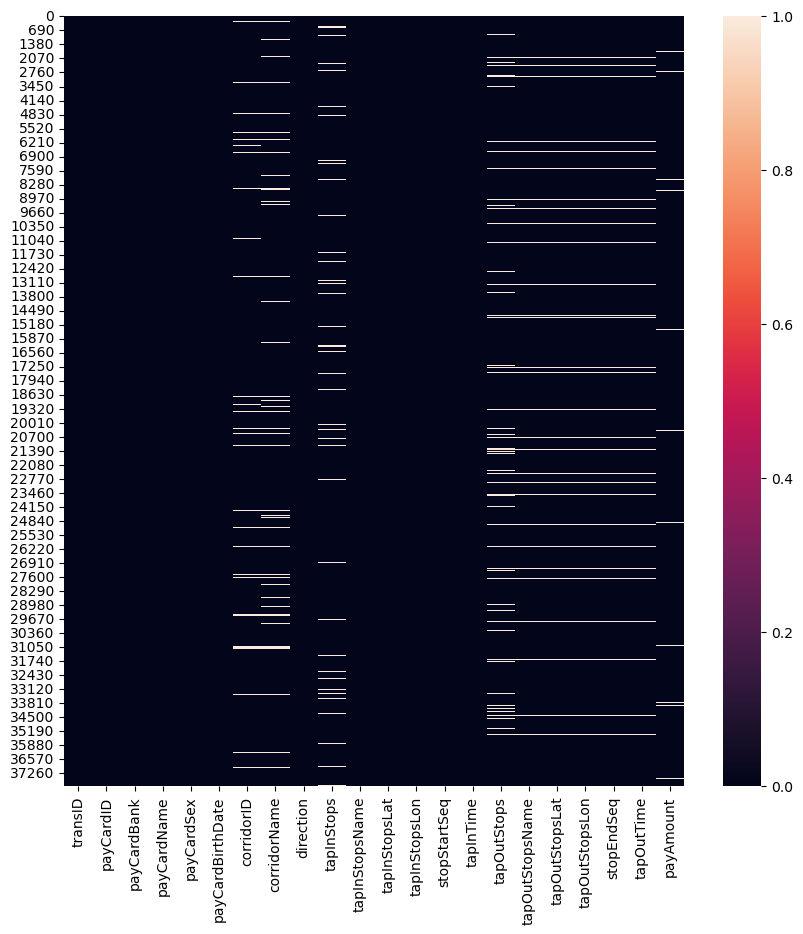

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

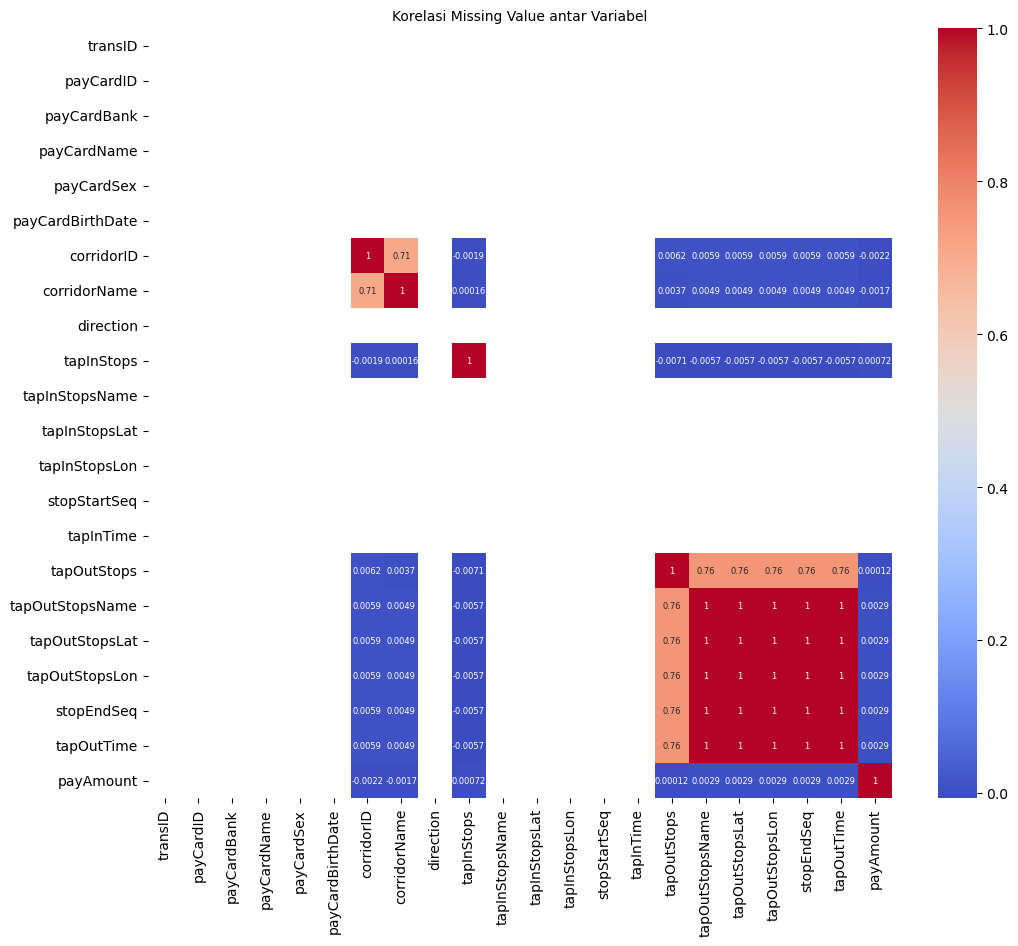

In [98]:
missing_corr = df.isnull().corr()
plt.figure(figsize=(12, 10))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', annot_kws={'size': 6}) 
plt.title("Korelasi Missing Value antar Variabel", fontsize=10) 
plt.show()

It was found that there is a strong correlation between the corridorID and corridorName columns, as well as between the remaining columns. This suggests that the missing values in these columns may be related, and addressing the missing data in one could help in handling the missing data in the other.








#### **5.1.1 corridorID dan corridorName**

The first step is to check the relationship between corridorID and corridorName. 

<Axes: >

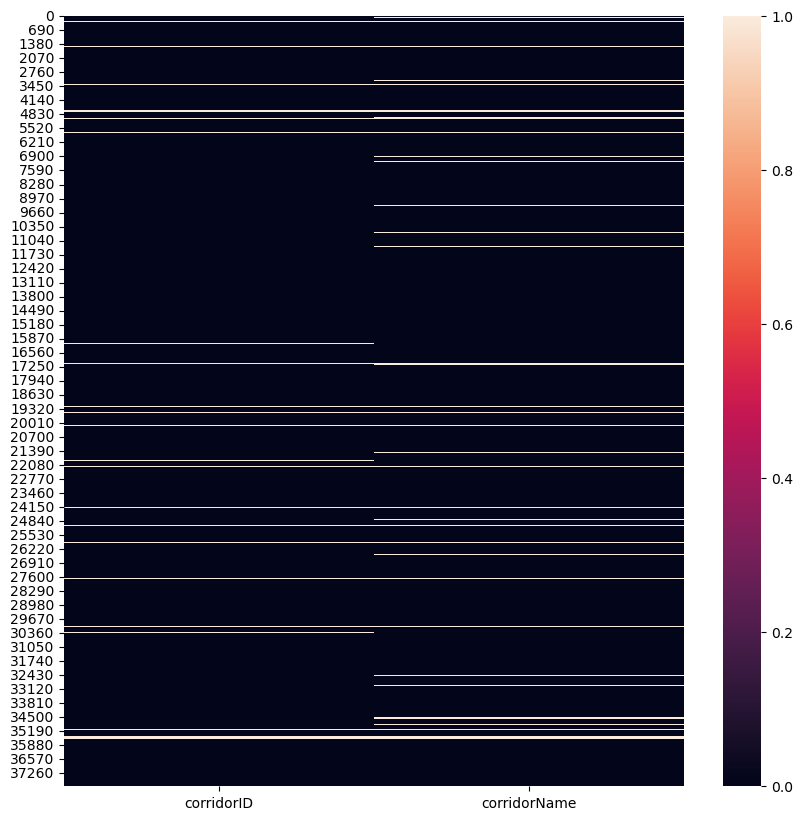

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(df[["corridorID","corridorName"]].isna())

The purpose of this check is to confirm that each corridorName correctly corresponds to a single corridorID. This guarantees that the two match correctly and that any inconsistencies or missing values can be found and fixed.

In [100]:
corridorID_count = df.groupby('corridorName')['corridorID'].nunique().sort_values(ascending=False)
print(corridorID_count)


corridorName
Pinang Ranti - Pluit                   2
Kalideres - Bundaran HI via Veteran    2
Pulo Gadung - Monas                    2
Matraman Baru - Ancol                  2
Blok M - Kota                          2
                                      ..
Kebayoran Lama - Jelambar              1
Kebayoran Lama - Tanah Abang           1
Kelapa Gading - Rusun Kemayoran        1
Kp. Rambutan - Kalisari                1
Universitas Indonesia - Lebak Bulus    1
Name: corridorID, Length: 216, dtype: int64


The findings indicate that a single corridorName may occasionally be linked to multiple corridorIDs. This suggests that corridorName might not always be exclusive to a single corridorID, necessitating additional research or data modifications.


In [101]:
corridorID_count = df.groupby('corridorName')['corridorID'].nunique()
corridorID_count = corridorID_count[corridorID_count > 1].sort_values(ascending=False)
print(corridorID_count)


corridorName
Blok M - Kota                          2
Kalideres - Bundaran HI via Veteran    2
Matraman Baru - Ancol                  2
Pinang Ranti - Pluit                   2
Pulo Gadung - Monas                    2
Name: corridorID, dtype: int64


In [102]:
df.query("corridorName in ['Blok M - Kota','Kalideres - Bundaran HI via Veteran', 'Matraman Baru - Ancol', 'Pinang Ranti - Pluit', 'Pulo Gadung - Monas']")[['corridorName','corridorID']].value_counts()

corridorName                         corridorID
Pulo Gadung - Monas                  2             279
Matraman Baru - Ancol                5             246
Blok M - Kota                        1             230
Kalideres - Bundaran HI via Veteran  M3            204
Pinang Ranti - Pluit                 M9            149
Kalideres - Bundaran HI via Veteran  3             127
Blok M - Kota                        M1             61
Pulo Gadung - Monas                  M2             60
Pinang Ranti - Pluit                 9              59
Matraman Baru - Ancol                M5             15
Name: count, dtype: int64

After checking the corridorID, it was found that the only difference was the addition of the letter "M" at the beginning. According to domain knowledge, a corridorID that begins with "M" should denote nighttime operations. But according to the data, buses with corridorIDs that begin with "M" travel in the same ways as buses without the prefix. Consequently, the decision was made to combine the two data sets.

In [103]:
df['corridorID'] = np.where(
    df['corridorID'] == 'M1', '1',
    np.where(df['corridorID'] == 'M2', '2',
    np.where(df['corridorID'] == 'M3', '3',
    np.where(df['corridorID'] == 'M5', '5',
    np.where(df['corridorID'] == 'M9', '9', 
    np.where(df['corridorID'] == 'M1H', '1H',
    df['corridorID']))))))


A mapping between corridorName and corridorID was then completed. In order to address any discrepancies or duplicates in the data, this step makes sure that each corridorName is appropriately linked to its corresponding corridorID.



In [104]:
def mapping_df(x,y):
    global mapping_dict
    mapped_df = df[[x, y]].drop_duplicates().dropna()
    mapping_dict = dict(zip(mapped_df[x], mapped_df[y]))
    return mapping_dict

mapping_df("corridorID","corridorName")

df['corridorName'] = df['corridorID'].map(mapping_dict).fillna(df['corridorName'])

In [105]:
mapping_df("corridorName","corridorID")
df['corridorID'] = df['corridorName'].map(mapping_dict).fillna(df['corridorID'])

In [106]:
df_null_summary()

Null Count  Null Percentage
transID                    0             0.00
payCardID                  0             0.00
payCardBank                0             0.00
payCardName                0             0.00
payCardSex                 0             0.00
payCardBirthDate           0             0.00
corridorID              1126             2.97
corridorName            1125             2.97
direction                  0             0.00
tapInStops              1213             3.20
tapInStopsName             0             0.00
tapInStopsLat              0             0.00
tapInStopsLon              0             0.00
stopStartSeq               0             0.00
tapInTime                  0             0.00
tapOutStops             2289             6.04
tapOutStopsName         1344             3.55
tapOutStopsLat          1344             3.55
tapOutStopsLon          1344             3.55
stopEndSeq              1344             3.55
tapOutTime              1344             3.55
payAmount               1007             2.66

After the mapping, the number of null values in corridorName and corridorID reduced to 1125. The next step is to see if the information from tapInStops and tapInStopsName can be used to fill in the missing corridorName and corridorID. This can guarantee that the dataset is more comprehensive by assisting in the inference of the missing values from other available 

<Axes: >

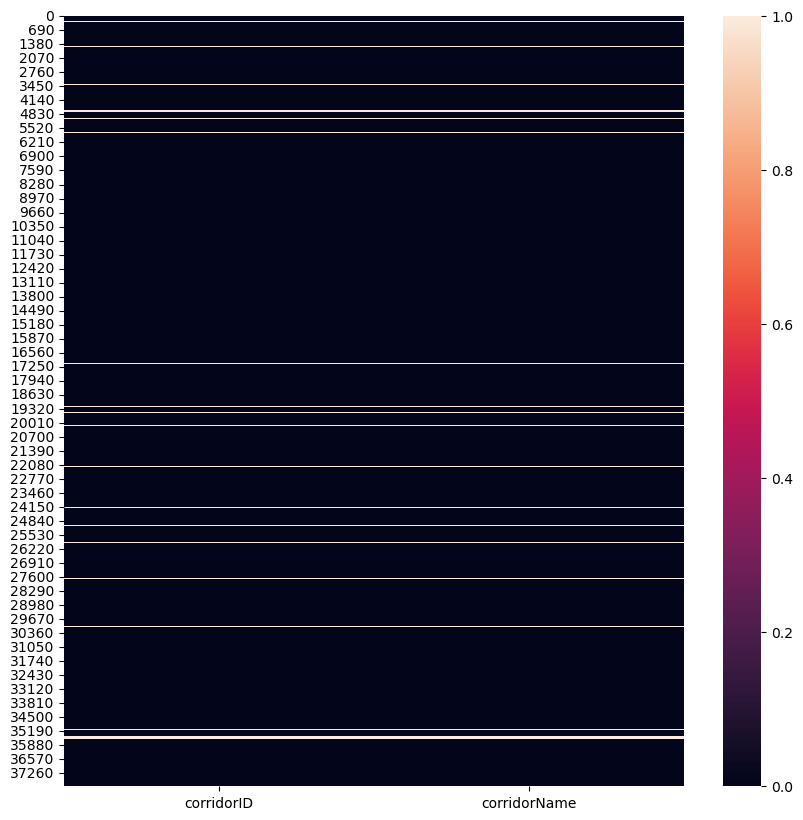

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(df[["corridorID","corridorName"]].isna())

In [108]:
df[["corridorID","corridorName","tapInStops","tapInStopsName"]].head()

corridorID                              corridorName tapInStops  \
0          5                     Matraman Baru - Ancol     P00142   
1         6C  Stasiun Tebet - Karet via Patra Kuningan    B01963P   
2        R1A                        Pantai Maju - Kota    B00499P   
3        11D       Pulo Gebang - Pulo Gadung 2 via PIK    B05587P   
4         12                     Tanjung Priok - Pluit     P00239   

           tapInStopsName  
0               Pal Putih  
1              Kemenkes 2  
2            Gg. Kunir II  
3            Taman Elok 1  
4  Sunter Boulevard Barat

Before performing the mapping, a check was conducted to ensure that stopsName can represent corridorName and corridorID. In order to ascertain whether the stop names could be utilised to deduce the associated corridor information, this check concentrated on stopsName entries where corridorName was still absent.

In [109]:
df[df['corridorName'].isna()]['tapInStopsName'].value_counts().head()

tapInStopsName
Cawang UKI                   8
Cibubur Junction             7
Bendungan Hilir              7
Jln. Taman Jatibaru Timur    6
Velodrome                    6
Name: count, dtype: int64

In [110]:
df.query("tapInStopsName in ['Cawang UKI','Cibubur Junction', 'Bendungan Hilir']")[['tapInStopsName', 'corridorName','corridorID']].value_counts()


tapInStopsName    corridorName                     corridorID
Cibubur Junction  Cibubur - BKN                    7C            87
Bendungan Hilir   Blok M - Kota                    1             54
Cawang UKI        PGC 2 - Tanjung Priok            M10           41
Cibubur Junction  Cibubur - Balai Kota             1T            38
Cawang UKI        Tanjung Priok - PGC 2            10            35
                  Pinang Ranti - Bundaran Senayan  9C            14
Bendungan Hilir   TU Gas - Bundaran Senayan        4C             9
                  Kampung Rambutan - Monas         M7             2
Cawang UKI        Bekasi Timur - Cawang            B21            1
                  Kampung Rambutan - Bidara Cina   7              1
                  Summarecon Bekasi - BNN          B11            1
Cibubur Junction  Cibubur Junction - Blok M        1K             1
Name: count, dtype: int64

After the check, it was found that stops Name could not be used to fill in corridorName and corridorID because a single stopsName can be associated with more than one corridor. As a result, the data that lacked corridorName and corridorID values was eliminated.

In [111]:
df.dropna(subset=['corridorID'],inplace=True)

The corridorID and corridorName no longer contain null values. Both columns are now complete since the missing values have been filled in.

In [112]:
df_null_summary()

Null Count  Null Percentage
transID                    0             0.00
payCardID                  0             0.00
payCardBank                0             0.00
payCardName                0             0.00
payCardSex                 0             0.00
payCardBirthDate           0             0.00
corridorID                 0             0.00
corridorName               0             0.00
direction                  0             0.00
tapInStops              1182             3.21
tapInStopsName             0             0.00
tapInStopsLat              0             0.00
tapInStopsLon              0             0.00
stopStartSeq               0             0.00
tapInTime                  0             0.00
tapOutStops             2210             6.01
tapOutStopsName         1297             3.53
tapOutStopsLat          1297             3.53
tapOutStopsLon          1297             3.53
stopEndSeq              1297             3.53
tapOutTime              1297             3.53
payAmount                978             2.66

#### **5.1.2 tapinStops**

The next step is to verify tapInStops using tapInStopsName. This check determines whether the stop names accurately represent or match the corresponding stop IDs, ensuring the dataset's consistency and completeness.


<Axes: >

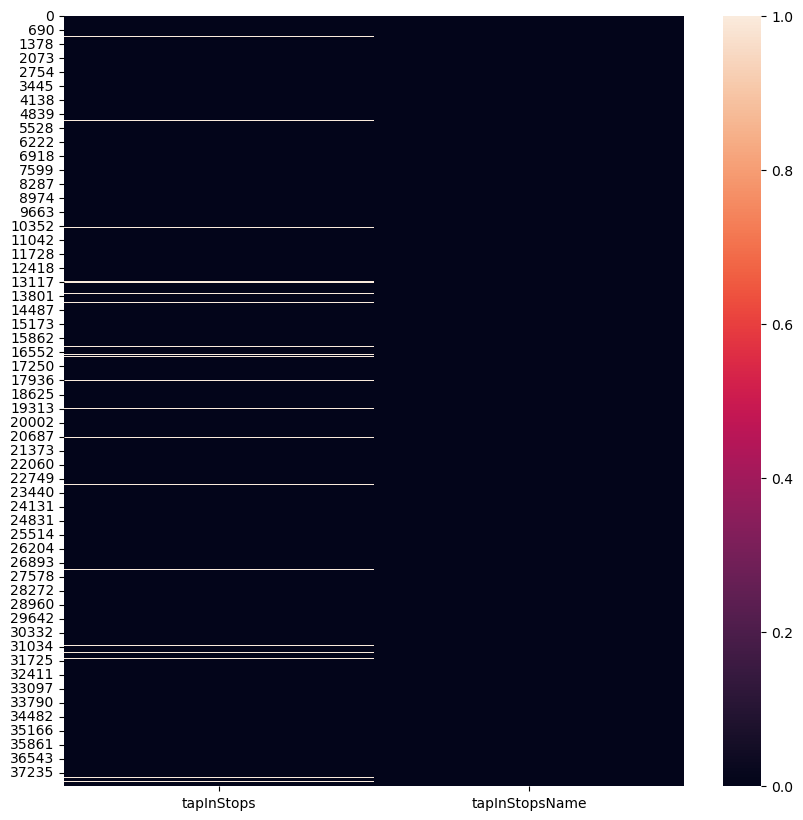

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df[["tapInStops","tapInStopsName"]].isna())

Here, a check is made to see if tapInStopsName accurately represents a single tapInStop. This ensures that each stop name matches its corresponding stop ID, and any inconsistencies can be identified and corrected.



In [114]:
tapInStopsName_count = df.groupby('tapInStopsName')['tapInStops'].nunique().sort_values(ascending=False).head(5)
print(tapInStopsName_count)


tapInStopsName
Dukuh Atas 2             2
18 Office Park           1
SMKN Jasalena Marunda    1
SMP 140                  1
SMP PSKD 3               1
Name: tapInStops, dtype: int64


First, a check was performed to ensure that tapInStopsName was unique. It was discovered that there is one tapInStopsName for every two tapInStops. However, this can be ignored because there are no empty tapInStops for the specified tapInStopsName. Because tapInStopsName is thought to accurately represent tapInStops, the tapInStops column will be removed from the dataset.


In [115]:
df = df.drop(labels="tapInStops", axis=1)

#### **5.1.3 payAmount**

The data analysis revealed that columns such as tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, and payAmount contain a high number of null values. However, further examination using a heatmap revealed no clear pattern in the null values in payAmount compared to the other columns. As a result, it was decided to fill in payAmount first, as there are no obvious issues with this column that require additional attention.

<Axes: >

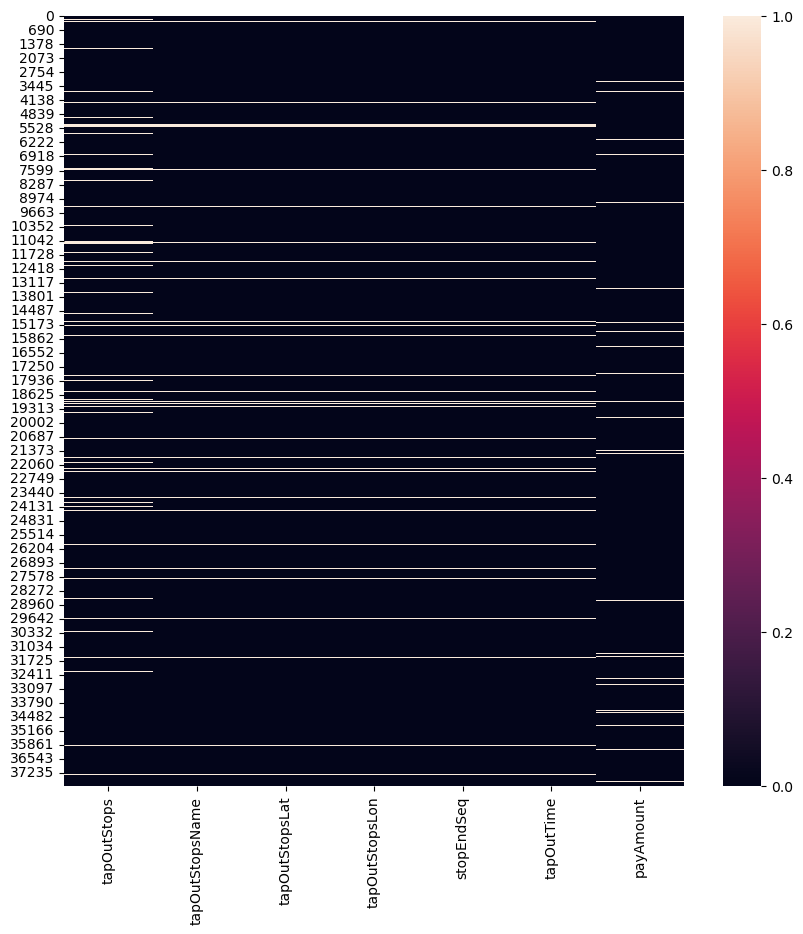

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount']].isna())

After analysing the heatmap, it was discovered that there is no discernible pattern in the null values in payAmount compared to the other columns. As a result, the next step is to fill out the payAmount first. This is accomplished by checking for null values in payAmount based on corridorID, which is determined by domain knowledge.

In [117]:
df[df["payAmount"].isna()][["corridorID"]].value_counts()

corridorID
M7B           310
JAK.48A       249
1H            170
JAK.48B       159
3H             90
Name: count, dtype: int64

Previously, the distribution of payAmount was investigated using novel and unique checks. Based on these findings, domain knowledge will be used to determine whether to fill in the null values. This ensures that any missing payAmount values are filled in a way that is consistent with the overall context of the data.

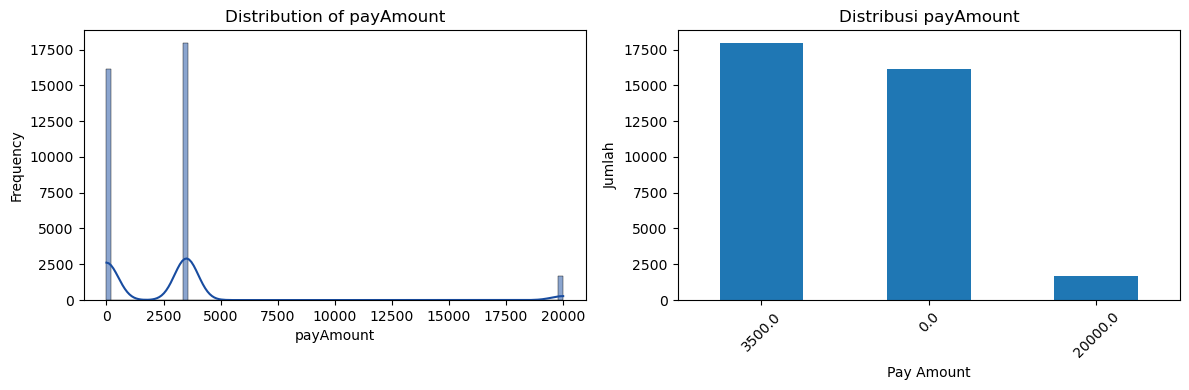

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 

sns.histplot(df['payAmount'], kde=True, color='#184ca0', ax=axes[0])
axes[0].set_title('Distribution of payAmount')
axes[0].set_xlabel('payAmount')
axes[0].set_ylabel('Frequency')

payAmount_counts = df['payAmount'].value_counts().sort_values(ascending=False)
payAmount_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribusi payAmount')
axes[1].set_xlabel('Pay Amount')
axes[1].set_ylabel('Jumlah')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


According to Kumparan ([link berita](https://kumparan.com/seputar-jakarta/apakah-jaklingko-gratis-cek-jawabannya-di-sini-21hxuSvgtQG/2)) Transjakarta offers free fares for Mikrotrans and Jaklingko. Other public transportation modes integrated with JakLingko, such as TransJakarta, MRT, and LRT, continue to charge passengers in accordance with the applicable fare regulations. One way to identify Jaklingko is to note that its corridorID starts with "JAK".

In [119]:
df[df["corridorID"].str.contains("JAK", regex=True)]["corridorID"].nunique()

81

Following validation, it was discovered that the data contains a significant number of Mikrotrans entries with a fare of zero. As a result, the next step is to assign a value of 0 to the null values in corridorID that begin with "JAK", consistent with the pattern identified in the data. Next, a re-check was conducted on the corridorID entries that have a null payAmount.


In [120]:
df.loc[df["corridorID"].str.contains("JAK", regex=True), "payAmount"] = df.loc[df["corridorID"].str.contains("JAK", regex=True), "payAmount"].fillna(0)

In [121]:
df[df["payAmount"].isna()]["corridorID"].value_counts()

corridorID
M7B    310
1H     170
3H      90
Name: count, dtype: int64

According to domain knowledge, these three corridorID entries should have a fare of 3,500, whereas the 20,000 fare only applies to Transjakarta Royal Trans. The next step is to validate the payAmount value of 20,000 to ensure that the fare is consistent with the understanding established in domain knowledge.


In [122]:
df[df["payAmount"] == 20000][["corridorID"]].value_counts()

corridorID
1T            400
B14           223
D32           180
T21           179
1K            160
S31           151
B13           131
6P             94
S12            94
D31            89
Name: count, dtype: int64

After validation, it was discovered that all corridorID entries with a payAmount of 20,000 are indeed associated with Royal Trans. As a result, the remaining corridorID entries with null values were assigned a fare of 3,500, which is the applicable fare for those types of corridorID.



In [123]:
df.loc[df["corridorID"].isin(["M7B", "1H", "3H"]), "payAmount"] = df.loc[df["corridorID"].isin(["M7B", "1H", "3H"]), "payAmount"].fillna(3500)

The payAmount for corridorID entries that were deemed inconsistent with the applicable regulations was adjusted as follows, based on validation results and domain knowledge understanding.

In [124]:
df[(~df["corridorID"].str.contains("JAK", regex=True)) & (df["payAmount"] == 0)][["corridorID"]].value_counts()

corridorID
11P           332
2E            318
3C            247
BW9           214
2F            204
3B            181
3A            175
11M           161
10A           148
4E            145
10B           140
11K           137
11N           136
12C           135
2H            103
11B            95
9F             88
11C            57
12F            55
Name: count, dtype: int64

In [125]:
non_jak = ["11P", "2E", "3C", "2F", "3B", "3A", "11M", "10A", "4E", "10B", "11K", "11N", "12C", "2H", "11B", "9F", "11C", "12F"]
df.loc[df["corridorID"].isin(non_jak), "payAmount"] = 3500

In [126]:
df[(~df["corridorID"].str.contains("JAK", regex=True)) & (df["payAmount"] == 0)][["corridorID"]].value_counts()

corridorID
BW9           214
Name: count, dtype: int64

BW9 refers to the Bus Wisata service, which, according to a Kompas article ([link berita](https://travel.kompas.com/read/2023/04/23/050600027/ada-bus-wisata-gratis-monas-pantai-maju-pik-khusus-libur-lebaran-2023?page=all)), provides free public transportation between Monas and Pantai Maju PIK. As a result, the payAmount for corridorID BW9 remained unchanged. 

#### **5.1.4 tapOutStops & tapOutStopsName**

The following step is similar to tapInStops: tapOutStopsName will be removed.

In [127]:
df = df.drop(labels="tapOutStops", axis=1)

In [128]:
df_null_summary()

Null Count  Null Percentage
transID                    0             0.00
payCardID                  0             0.00
payCardBank                0             0.00
payCardName                0             0.00
payCardSex                 0             0.00
payCardBirthDate           0             0.00
corridorID                 0             0.00
corridorName               0             0.00
direction                  0             0.00
tapInStopsName             0             0.00
tapInStopsLat              0             0.00
tapInStopsLon              0             0.00
stopStartSeq               0             0.00
tapInTime                  0             0.00
tapOutStopsName         1297             3.53
tapOutStopsLat          1297             3.53
tapOutStopsLon          1297             3.53
stopEndSeq              1297             3.53
tapOutTime              1297             3.53
payAmount                  0             0.00

<Axes: >

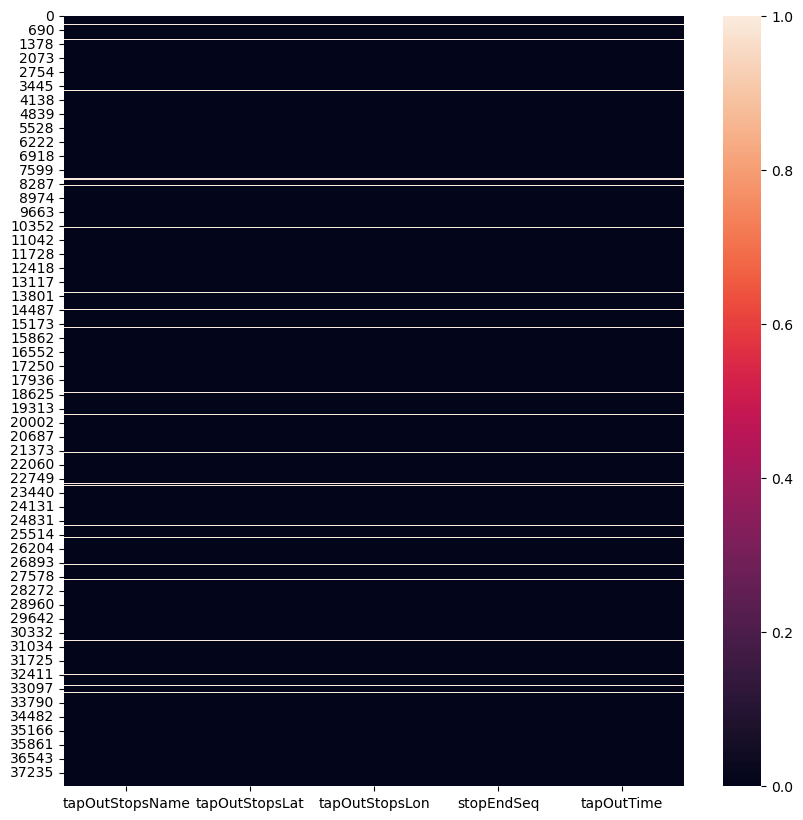

In [129]:
plt.figure(figsize=(10,10))
sns.heatmap(df[["tapOutStopsName","tapOutStopsLat","tapOutStopsLon","stopEndSeq","tapOutTime"]].isna())

Following the check, it was discovered that several variables still have null values: tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, and tapOutTime.

The heatmap analysis shows that these six variables are highly correlated (correlation close to one). Because the number of missing data points is low (less than 5%), and there is no other way to fill them, it was decided to remove the rows with missing values.

In [130]:
df = df.dropna()

There are no more null values in the dataset df. All missing data has been addressed using a variety of methods, including filling values based on domain knowledge and dropping rows as needed. The dataset is now complete and ready for additional analysis or modelling.

In [131]:
df_null_summary()

Null Count  Null Percentage
transID                    0              0.0
payCardID                  0              0.0
payCardBank                0              0.0
payCardName                0              0.0
payCardSex                 0              0.0
payCardBirthDate           0              0.0
corridorID                 0              0.0
corridorName               0              0.0
direction                  0              0.0
tapInStopsName             0              0.0
tapInStopsLat              0              0.0
tapInStopsLon              0              0.0
stopStartSeq               0              0.0
tapInTime                  0              0.0
tapOutStopsName            0              0.0
tapOutStopsLat             0              0.0
tapOutStopsLon             0              0.0
stopEndSeq                 0              0.0
tapOutTime                 0              0.0
payAmount                  0              0.0

In [132]:
print(f"Dataset is now contains of {len(df)} entries")

Dataset is now contains of 35477 entries


### **5.2 Data Conversion**

The next step is to convert the data in the dataset. The variables in the dataset were classified into the following groups:

| **Category**            | **Columns**                                                                                   |
|--------------------------|-----------------------------------------------------------------------------------------------|
| **Customer Identifier**  | ['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'age', 'ageCategory'] |
| **Trip Identifier**      | ['corridorID', 'corridorName', 'serviceType', 'direction', 'distance_km', 'seqDiff', 'tripDuration'] |
| **Environmental Context**| ['dayOfWeek', 'peakHour', 'tapIn_timeOfDay', 'tapOut_timeOfDay']                               |
| **Tap In Identifier**    | ['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime'] |
| **Tap Out Identifier**   | ['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'] |
| **Pay**                  | ['payAmount']                                                                                |


With this categorisation, the data treatment steps will be carried out based on the relevant categories, ensuring that each category is processed appropriately.


#### **5.2.1 Customer Identifier**

In [133]:
df[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate']].head()

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate  
0              2008  
1              1997  
2              1992  
3              1978  
4              1982

In [134]:
df[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35477 entries, 0 to 37899
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transID           35477 non-null  object
 1   payCardID         35477 non-null  int64 
 2   payCardBank       35477 non-null  object
 3   payCardName       35477 non-null  object
 4   payCardSex        35477 non-null  object
 5   payCardBirthDate  35477 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [135]:
df['payCardID'] = df['payCardID'].astype('object')
df['payCardBank'] = df['payCardBank'].astype('category')
df['payCardSex'] = df['payCardSex'].astype('category')

In the Customer Identifier category, the following data types were converted:

- **payCardID** was converted to an object type to better group diverse and non-numeric values. This ensures that data types such as alphanumeric strings are handled correctly.
- **payCardBank** was converted to a category type to improve storage and processing of values with few possible categories, such as bank names. This conversion speeds up operations and improves memory efficiency, particularly when dealing with repetitive values.
- **PayCardSex** was also converted to a category type to facilitate gender processing and analysis, as it only has two possible values ('M' for Male and 'F' for Female). This conversion reduces memory usage and speeds up computations when dealing with categorical data.

#### **5.2.2 Trip Identifier**

In [136]:
df[['corridorID', 'corridorName', 'direction']].head()

corridorID                              corridorName  direction
0          5                     Matraman Baru - Ancol        1.0
1         6C  Stasiun Tebet - Karet via Patra Kuningan        0.0
2        R1A                        Pantai Maju - Kota        0.0
3        11D       Pulo Gebang - Pulo Gadung 2 via PIK        0.0
4         12                     Tanjung Priok - Pluit        0.0

In [137]:
df['direction'] = df['direction'].astype('category') 

In the Trip Identifier category, the following data type conversion was performed:

- **Direction** was transformed into a category type for easier processing and analysis. Because the direction variable typically has only a few values, converting it to a category type optimises storage and improves data manipulation performance, allowing computations to run faster when working with directional data.

#### **5.2.2 Tap In Identifier**

In [138]:
df[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime']].head()

tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0               Pal Putih      -6.184631      106.84402             7   
1              Kemenkes 2      -6.228700      106.83302            13   
2            Gg. Kunir II      -6.133132      106.81435            38   
3            Taman Elok 1      -6.195743      106.93526            23   
4  Sunter Boulevard Barat      -6.149650      106.88900             5   

             tapInTime  
0  2023-04-03 05:21:44  
1  2023-04-03 05:42:44  
2  2023-04-03 05:59:06  
3  2023-04-03 05:44:51  
4  2023-04-03 06:17:35

In [139]:
df[['corridorID', 'corridorName', 'direction', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35477 entries, 0 to 37899
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   corridorID      35477 non-null  object  
 1   corridorName    35477 non-null  object  
 2   direction       35477 non-null  category
 3   tapInStopsName  35477 non-null  object  
 4   tapInStopsLat   35477 non-null  float64 
 5   tapInStopsLon   35477 non-null  float64 
 6   stopStartSeq    35477 non-null  int64   
 7   tapInTime       35477 non-null  object  
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 2.2+ MB


In [140]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In the Tap In Identifier category, the following data type conversion occurred:

- **tapInTime** was changed to to_datetime to ensure that the time data is treated as a date-time object. This conversion enables additional analysis, such as calculating travel duration or performing time-based processing, which is required for operations like filtering by time or grouping by specific time intervals.

#### **5.2.3 Tap Out Identifier**

In [141]:
df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].head()

tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq  \
0                Tegalan       -6.203101       106.85715        12.0   
1    Sampoerna Strategic       -6.217152       106.81892        21.0   
2  Simpang Kunir Kemukus       -6.133731       106.81475        39.0   
3      Raya Penggilingan       -6.183068       106.93194        29.0   
4       Kali Besar Barat       -6.135355       106.81143        15.0   

            tapOutTime  
0  2023-04-03 06:00:53  
1  2023-04-03 06:40:01  
2  2023-04-03 06:50:55  
3  2023-04-03 06:28:16  
4  2023-04-03 06:57:03

In [142]:
df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35477 entries, 0 to 37899
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tapOutStopsName  35477 non-null  object 
 1   tapOutStopsLat   35477 non-null  float64
 2   tapOutStopsLon   35477 non-null  float64
 3   stopEndSeq       35477 non-null  float64
 4   tapOutTime       35477 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


In [143]:
df['stopEndSeq'] = df['stopEndSeq'].astype('int') 
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])


In the Tap Out Identifier category, the following data types were converted:

- **stopEndSeq** was converted to int so that the stop sequence (seq) could be represented as an integer. This makes it easier to analyse the journey's order, such as identifying the sequence of stops or determining the location of a specific stop within the trip.
- **TapOutTime** was converted to DateTime to properly format the exit time for time-based analysis. By converting tapOutTime to date-time format, it is possible to calculate travel durations as well as analyse time patterns such as peak exit times or trip durations.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35477 entries, 0 to 37899
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           35477 non-null  object        
 1   payCardID         35477 non-null  object        
 2   payCardBank       35477 non-null  category      
 3   payCardName       35477 non-null  object        
 4   payCardSex        35477 non-null  category      
 5   payCardBirthDate  35477 non-null  int64         
 6   corridorID        35477 non-null  object        
 7   corridorName      35477 non-null  object        
 8   direction         35477 non-null  category      
 9   tapInStopsName    35477 non-null  object        
 10  tapInStopsLat     35477 non-null  float64       
 11  tapInStopsLon     35477 non-null  float64       
 12  stopStartSeq      35477 non-null  int64         
 13  tapInTime         35477 non-null  datetime64[ns]
 14  tapOutStopsName   35477 non

In [145]:
df[['payAmount']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35477 entries, 0 to 37899
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   payAmount  35477 non-null  float64
dtypes: float64(1)
memory usage: 554.3 KB


### **5.3 Recoding/Data Transformation**

Following the data type conversion, the next step is to recode or transform several variables to ensure consistency and facilitate analysis. 

#### **5.3.1 Customer Identifier**

The steps to recode the Customer Identifier category are as follows:

- payCardSex
    - Convert 'm' with 'Male'.
    - Convert 'f' to 'Female'.
- age 
    - Subtract the payCardBirthDate year from 2023 to find the age. The formula is: age = 2023 - payCardBirthDate.year.
- ageCategory, 
    - Children aged 0–12 years
    - Teenagers: 13 to 17 years
    - Young Adults (18-24 years)
    - Adults: 25 to 59 years
    - Seniors: 60 years and older.


> ##### payCardSex

In [146]:
df['payCardSex'] = np.where(df['payCardSex'] == 'M', 'Male', 
                   np.where(df['payCardSex'] == 'F', 'Female', df['payCardSex']))

df['payCardSex'] = df['payCardSex'].astype('category')

df["payCardSex"].unique()


['Male', 'Female']
Categories (2, object): ['Female', 'Male']

> ##### Age

In [147]:
df["age"] = 2023 - df["payCardBirthDate"]

df[["payCardBirthDate","age"]].head()

payCardBirthDate  age
0              2008   15
1              1997   26
2              1992   31
3              1978   45
4              1982   41

In [148]:
df["age"].info()

<class 'pandas.core.series.Series'>
Index: 35477 entries, 0 to 37899
Series name: age
Non-Null Count  Dtype
--------------  -----
35477 non-null  int64
dtypes: int64(1)
memory usage: 554.3 KB


> ##### Age Category

In [149]:
df["ageCategory"] = np.where(df['age'] <= 12, 'Children', 
                    np.where(df['age'] <= 17, 'Teenager',
                    np.where(df['age'] <= 24, 'Young Adult',
                    np.where(df['age'] <= 59, 'Adult',
                    'Senior Adult'     
                    ))))
df['ageCategory'] = df['ageCategory'].astype('category')
df["ageCategory"].unique()

['Teenager', 'Adult', 'Young Adult', 'Children', 'Senior Adult']
Categories (5, object): ['Adult', 'Children', 'Senior Adult', 'Teenager', 'Young Adult']

#### **5.5.2 Trip Identifier**

The Trip Identifier is recoded as follows:

- serviceType
    - If payAmount = 3500, then the serviceType is set to BRT (Bus Rapid Transit).
    - If payAmount = 2000, then the serviceType is set to RoyalTrans.
    - If payAmount = 0, then the serviceType is set to MikroTrans (Microtrans).
    - If corridorID is in the angkutanPengumpan_list, then the serviceType is set to Angkutan Pengumpan (Feeder Transport).
    
- seqDiff: The difference between stopEndSeq and stopStartSeq (stopEndSeq - stopStartSeq) represents the sequence difference between the two stops on the journey.

- distance_km: Distance_km is calculated using the Haversine formula, which is used to calculate the distance between two geographical points based on coordinates latitude and longitude. In this case, the rumus is divided into two sections: tapInStops and tapOutStops, which are used to measure the distance travelled in a single kilometre.

- tripDuration: The duration of the trip is determined by dividing the tapOutTime by the tapInTime, which is the time when the person arrives and departs from the office.

> ##### Service Type

In [150]:
df["serviceType"] = np.where(df["payAmount"] == 3500, "BRT",
                    np.where(df["payAmount"] == 20000, "Royaltrans",
                    "Mikrotrans"))

In [151]:
df[df["corridorID"].str.contains("BW", regex=True)]["corridorID"].unique()

array(['BW9'], dtype=object)

In [152]:
df["serviceType"] = np.where(df["corridorID"] == "BW9", "Wisata",
                             df["serviceType"])

In [153]:
angkutanPengumpan_list = [
    "8K", "8E", "7Q", "6U", "7W", "7U", "7C", "7V", "7R", "7T", 
    "6Q", "6W", "2Q", "2B", "8D", "11Q", "5M", "5F", "7B", "7E", 
    "9E", "8N", "8C", "12A", "7A", "1M", "14A", "1A", "9H", "9D", 
    "6T", "6K", "4C", "1C", "4F", "12B", "7P", "1E", "4K", "2M", 
    "11D", "6N", "5N", "1Q", "1P", "6H", "1R", "2P", "3E", "12P", 
    "6C", "11W", "6M", "4B", "1F", "1B", "1H", "5B", "6D", "3D", 
    "1N", "8M", "14B", "7D"
]


In [154]:
df.loc[df['corridorID'].isin(angkutanPengumpan_list), 'serviceType'] = 'Angkutan Pengumpan'

In [155]:
df["serviceType"].value_counts()

serviceType
Mikrotrans            13009
BRT                   12735
Angkutan Pengumpan     7878
Royaltrans             1646
Wisata                  209
Name: count, dtype: int64

In [156]:
df["serviceType"].info()

<class 'pandas.core.series.Series'>
Index: 35477 entries, 0 to 37899
Series name: serviceType
Non-Null Count  Dtype 
--------------  ----- 
35477 non-null  object
dtypes: object(1)
memory usage: 554.3+ KB


In [157]:
df['serviceType'] = df['serviceType'].astype('category')

Because the analysis only focusses on Corridor 1 with the type of service "BRT", data that is collected will be filtered to select only data that is related to service.Type = BRT.

In [158]:
df = df[df["serviceType"] == "BRT"]

> ##### Distance (km)

In [159]:
df['distance_km'] = df.apply(lambda row: geodesic((row['tapInStopsLat'], row['tapInStopsLon']),
                                                 (row['tapOutStopsLat'], row['tapOutStopsLon'])).kilometers, axis=1)

df['distance_km'] = round(df['distance_km'],2)

print(df[['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'distance_km']].head())


    tapInStopsLat  tapInStopsLon  tapOutStopsLat  tapOutStopsLon  distance_km
0       -6.184631      106.84402       -6.203101       106.85715         2.51
2       -6.133132      106.81435       -6.133731       106.81475         0.08
4       -6.149650      106.88900       -6.135355       106.81143         8.73
11      -6.240213      106.83102       -6.242699       106.82572         0.65
12      -6.201948      106.79998       -6.221110       106.81354         2.60


In [160]:
df["distance_km"].info()

<class 'pandas.core.series.Series'>
Index: 12735 entries, 0 to 37899
Series name: distance_km
Non-Null Count  Dtype  
--------------  -----  
12735 non-null  float64
dtypes: float64(1)
memory usage: 199.0 KB


> ##### Sequence Difference

In [161]:
df["seqDiff"] = df["stopEndSeq"] - df["stopStartSeq"]

In [162]:
df["seqDiff"].head()

0      5
2      1
4     10
11     2
12     2
Name: seqDiff, dtype: int64

> ##### Trip Duration

In [163]:
df["tripDuration"] = df["tapOutTime"] - df["tapInTime"]
df['tripDuration'] = round(df['tripDuration'].dt.total_seconds() / 3600,3)

In [164]:
df["tripDuration"].head()

0     0.652
2     0.864
4     0.658
11    0.470
12    0.891
Name: tripDuration, dtype: float64

#### **5.5.3 Environmental Context**

In the Environmental Context, recoding is done as follows:

- dayOfWeek: Use strftime('%A') to extract the day of the week from the tapInTime column. This will display the full name of the day (Monday, Tuesday, etc.).

- peakHour:
    - True: tapInTime and tapOutTime falls within specific peak hours (06:00–09:00 dan 14:00-21:00)
    - False: tapInTime and tapOutTime falls doesn't within specific peak hours  (06:00–09:00 dan 14:00-21:00)

> ##### Day of Week

In [165]:
df['dayOfWeek'] = df['tapInTime'].dt.strftime('%A') 
df['dayOfWeek'].head()

0     Monday
2     Monday
4     Monday
11    Monday
12    Monday
Name: dayOfWeek, dtype: object

In [166]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['dayOfWeek'] = pd.Categorical(df['dayOfWeek'], categories=day_order, ordered=True)


> ##### Peak Hour: True/False

In [167]:
def is_peak_hour(time):
    return (time.hour >= 6 and time.hour < 9) or (time.hour >= 14 and time.hour < 21)

df['peakHour'] = np.where(
    (df['tapInTime'].apply(is_peak_hour)) | (df['tapOutTime'].apply(is_peak_hour)),
    True, 
    False 
)

print(df[['tapInTime', 'tapOutTime', 'peakHour']].head())


             tapInTime          tapOutTime  peakHour
0  2023-04-03 05:21:44 2023-04-03 06:00:53      True
2  2023-04-03 05:59:06 2023-04-03 06:50:55      True
4  2023-04-03 06:17:35 2023-04-03 06:57:03      True
11 2023-04-03 06:22:10 2023-04-03 06:50:21      True
12 2023-04-03 06:15:04 2023-04-03 07:08:31      True


Following that, the columns are sorted, making the data more structured and easier to analyse.

In [168]:
new_order = [
    # 1. Customer Identifier
    'transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'age', 'ageCategory',

    # 2. Trip Identifier
    'corridorID', 'corridorName', 'serviceType', 'direction', 'distance_km', 'seqDiff', 'tripDuration',

    # 3. Environmental Context
    'dayOfWeek', 'peakHour',

    # 4. Tap In Identifier
    'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime',

    # 5. Tap Out Identifier
    'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',

    # 6. Pay
    'payAmount'
]

df = df[new_order]


After the data has been completely cleaned and converted, the last dataset is exported and stored in Excel or CSV style for additional study or reporting.

In [169]:
df.to_csv("df_cleaned.csv")

### **5.4 EDA & Identify Outliers**

Because the majority of the dataset is made up of categorical variables, the focus of this Exploratory Data Analysis (EDA) phase will be on understanding their frequency distribution. By examining how frequently each category appears, we can detect potential data anomalies or inconsistencies. Some categories may be over-represented or under-represented, and these disparities may indicate problems such as data entry errors, missing values, or outliers that must be addressed.

For example, if one category appears far more frequently than others, it may skew the analysis or indicate that the data collection process was flawed. In contrast, categories that appear very infrequently may indicate rare events that need to be handled carefully, as they could represent unique conditions.

#### **5.4.1 Customer Identifier**

In [170]:
display(df[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'age', 'ageCategory']].describe(include="number"))
display(df[['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'age', 'ageCategory']].describe(exclude="number"))

payCardBirthDate           age
count      12735.000000  12735.000000
mean        1990.560503     32.439497
std           13.562469     13.562469
min         1946.000000     11.000000
25%         1982.000000     21.000000
50%         1991.000000     32.000000
75%         2002.000000     41.000000
max         2012.000000     77.000000

transID        payCardID payCardBank    payCardName payCardSex  \
count            12735            12735       12735          12735      12735   
unique           12735             1003           6           1003          2   
top     EIIW227B8L34VB  213174928876354         dki  Rini Hutasoit       Male   
freq                 1               40        5919             40       6373   

       ageCategory  
count        12735  
unique           5  
top          Adult  
freq          8571

Based on the summary statistics of the dataset:

- **age**: The mean of age is 32.44 years, with a minimum age of 11 and a maximum age of 77. Given that the distribution of age spans a wide range, it is likely to be slightly positively skewed (with more younger individuals).
- **payCardID** and **payCardName** each have 1,003 unique values.
- **payCardBank** has 6 unique values, with the most frequent being "dki," which appears 5,919 times.
- **payCardSex** is balanced with a slightly higher frequency of "Male" (6,373 occurrences).
- **ageCategory** is distributed as follows:
    - The majority of people fall under the "Dewasa" (Adult) category, with 8,571 occurrences.
    - Other categories include Children, Teenager, Young Adult, and Senior Adult.

> #### payCardBank

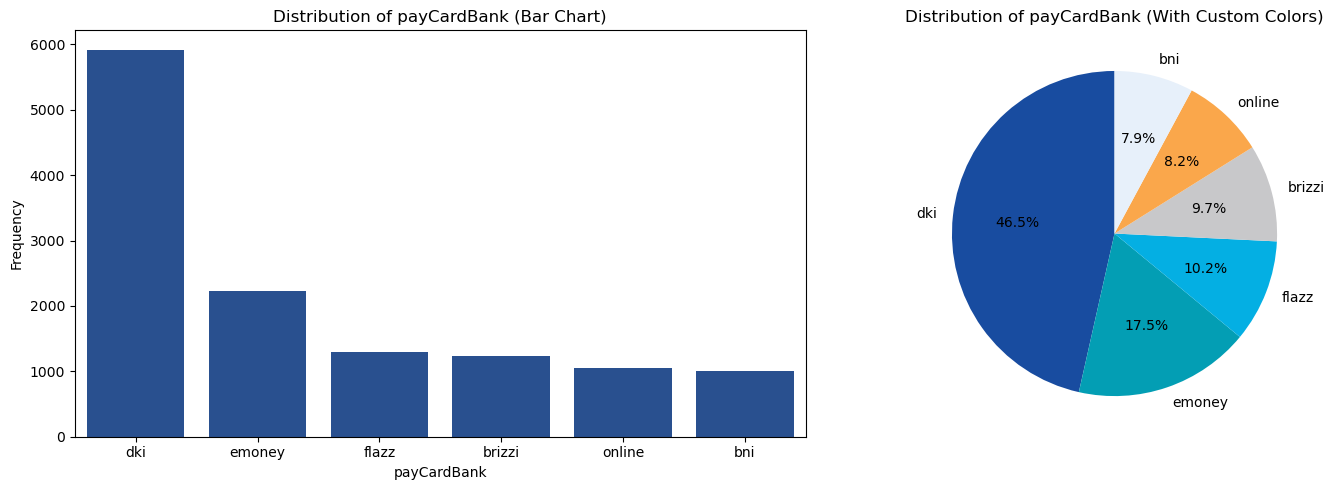

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Bar Chart
payCardBank_order = df['payCardBank'].value_counts().index
sns.countplot(ax=axes[0], x=df['payCardBank'], color='#184ca0', order=payCardBank_order)
axes[0].set_title('Distribution of payCardBank (Bar Chart)')
axes[0].set_xlabel('payCardBank')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=0)

# Pie Chart
payCardBank_counts = df['payCardBank'].value_counts()
custom_colors = ['#184ca0', '#039eb4', '#04afe3', '#c8c8ca', '#faa74b', '#e7f0fa']
plt.pie(payCardBank_counts, labels=payCardBank_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Distribution of payCardBank (With Custom Colors)')

# Adjust layout and display
plt.tight_layout()
plt.show()


The bar plot and pie plot for the variable payCardBank show that the majority of banks have nearly identical frequency, with dki being the most frequent bank, accounting for 46.5% of total transactions. This high likelihood is due to the preference of the majority of customers to use DKI banks, which may affect business or special promotions from the bank, or it may also be due to geographical factors that influence bank selection.

> #### payCardBirthDate & age

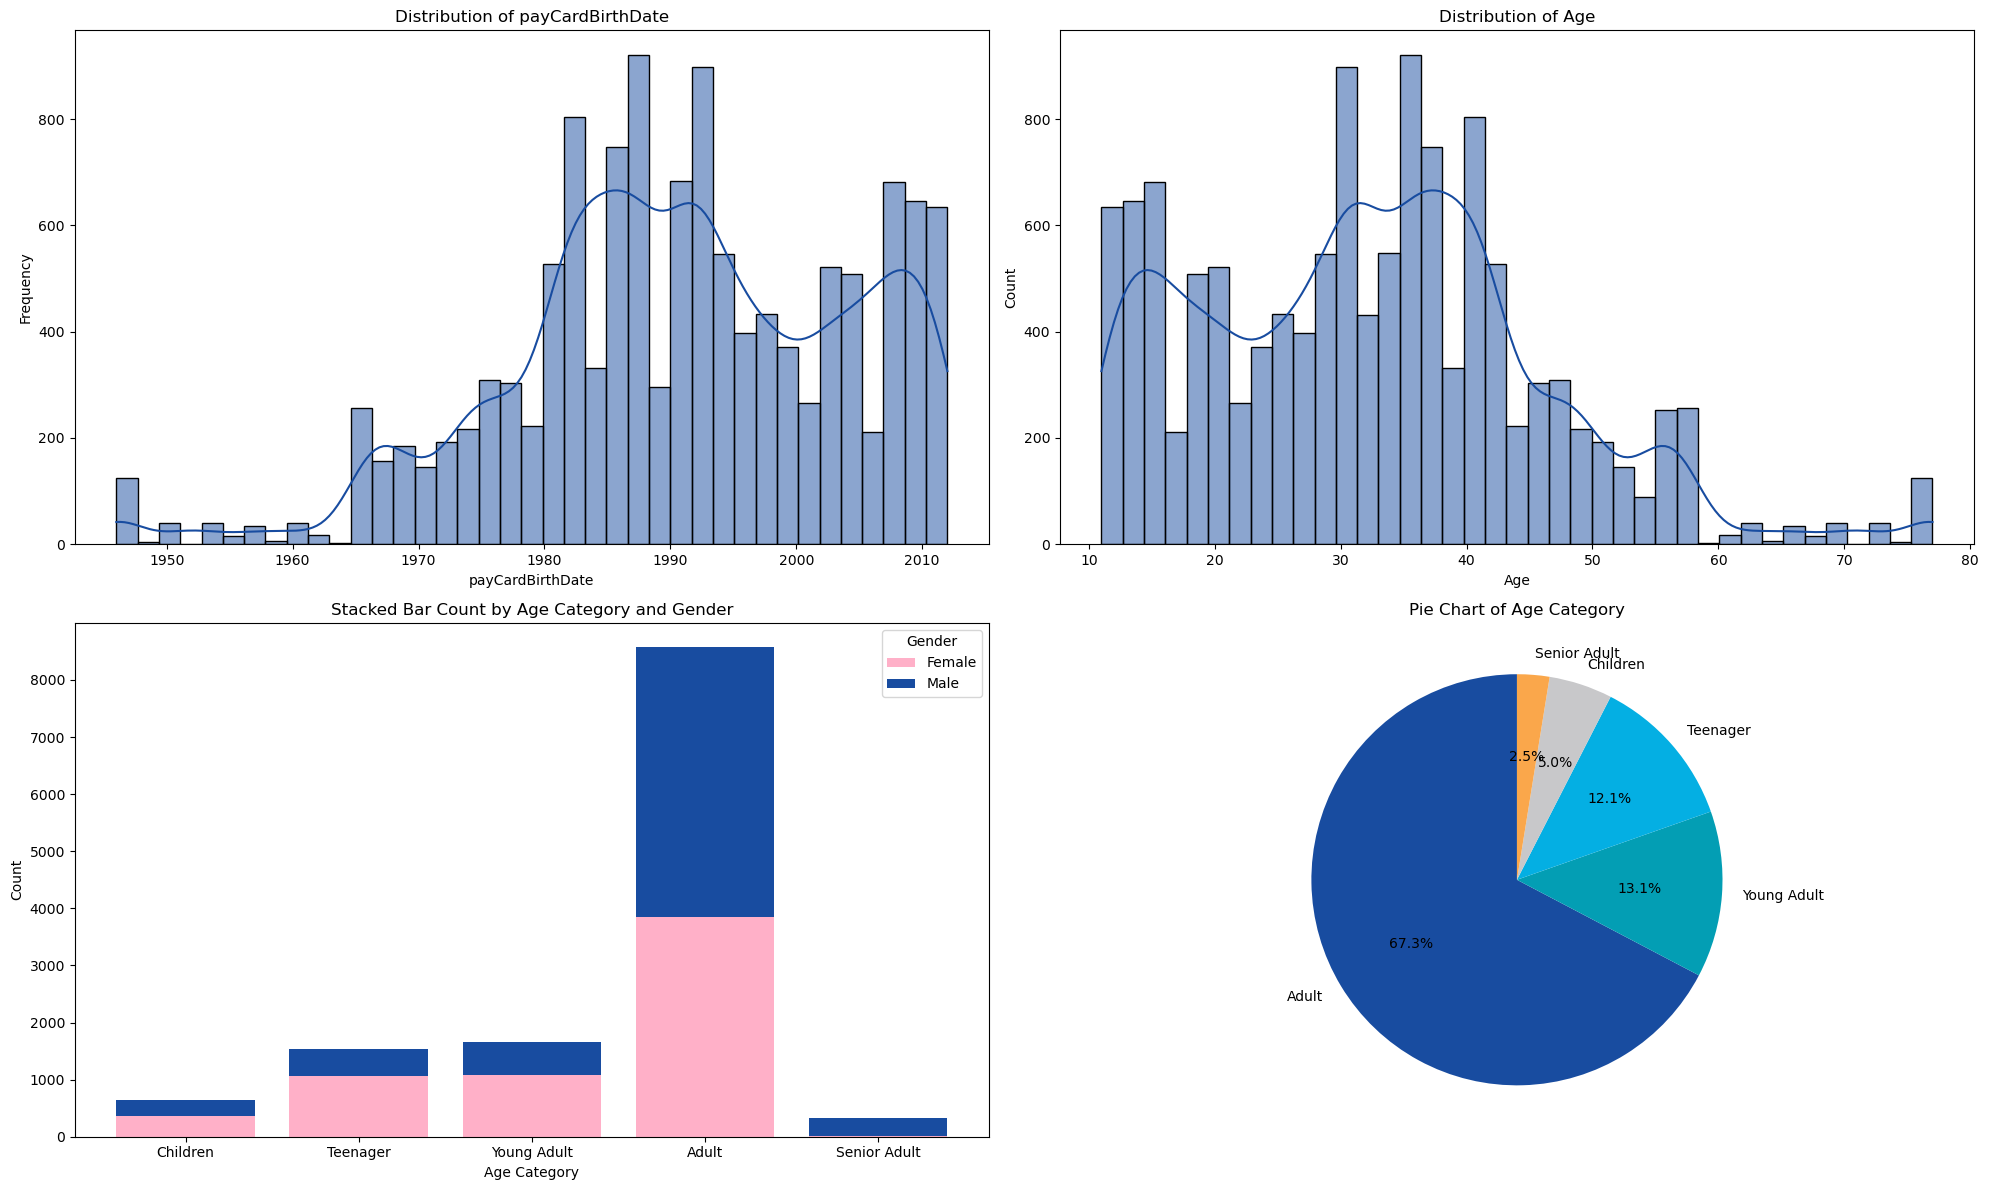

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # 2 rows, 2 columns

# Distribution of payCardBirthDate
sns.histplot(df['payCardBirthDate'], kde=True, color='#184ca0', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of payCardBirthDate')
axes[0, 0].set_xlabel('payCardBirthDate')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Age
sns.histplot(df['age'], kde=True, color='#184ca0', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# Distribution of Age Category (now in [1, 0])
ageCategory_order = ["Children", "Teenager", "Young Adult", "Adult", "Senior Adult"]
df_counts = df.groupby(['ageCategory', 'payCardSex']).size().unstack(fill_value=0)
df_counts = df_counts.reindex(index=ageCategory_order)
axes[1, 0].bar(df_counts.index, df_counts.iloc[:, 0], color='#ffb0c8', label=df_counts.columns[0]) 
axes[1, 0].bar(df_counts.index, df_counts.iloc[:, 1], bottom=df_counts.iloc[:, 0], color='#184ca0', label=df_counts.columns[1])  
axes[1, 0].set_title('Stacked Bar Count by Age Category and Gender')
axes[1, 0].set_xlabel('Age Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title="Gender")


# Pie chart of Age Category (now in [1, 1])
age_category_counts = df['ageCategory'].value_counts()
axes[1, 1].pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#184ca0', '#039eb4', '#04afe3', '#c8c8ca', '#faa74b', '#e7f0fa'])
axes[1, 1].set_title('Pie Chart of Age Category')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


The age variable shows a positive skew, meaning most users are younger, with fewer older users. This is evident from the average age of approximately 32 years, although there are some extreme values reaching up to 77 years. The positive skew indicates that the majority of users fall within a younger age group.

However, when segmented by ageCategory, the Adult category dominates, accounting for around 67% of all transactions. This suggests that the majority of customers using this service are within the adult age group, specifically those aged between 22 and 41 years.

#### **5.4.2 Trip Identifier**

In [173]:
display(df[['corridorID', 'corridorName', 'serviceType', 'direction', 'distance_km', 'seqDiff', 'tripDuration']].describe(include="number"))
display(df[['corridorID', 'corridorName', 'serviceType', 'direction', 'distance_km', 'seqDiff', 'tripDuration']].describe(exclude="number"))

distance_km       seqDiff  tripDuration
count  12735.000000  12735.000000  12735.000000
mean       3.383675      4.827326      1.198333
std        3.583694      4.771826      0.463973
min        0.000000      1.000000      0.252000
25%        0.910000      1.000000      0.852000
50%        2.190000      3.000000      1.197000
75%        4.400000      6.000000      1.584000
max       20.930000     30.000000      2.984000

corridorID   corridorName serviceType  direction
count       12735          12735       12735    12735.0
unique         73             73           1        2.0
top           S21  Ciputat - CSW         BRT        0.0
freq          376            376       12735     6369.0

> #### corridorID & corridorName

In [174]:
df[["corridorID", "corridorName"]].value_counts()

corridorID  corridorName                               
S21         Ciputat - CSW                                  376
JIS3        Harmoni - Jakarta International Stadium        333
2           Pulo Gadung - Monas                            333
11P         Rusun Pondok Bambu - Walikota Jakarta Timur    323
3           Kalideres - Bundaran HI via Veteran            323
                                                          ... 
9F          Rusun Tambora - Pluit                           83
M8          Lebak Bulus - Pasar Baru                        69
M6          Ragunan - MH Thamrin                            62
12F         Rusun Marunda - Rusun Waduk Pluit               54
11C         Rusun Pinus Elok - Rusun Pulo Gebang            54
Name: count, Length: 73, dtype: int64

The occurrence count for the corridorID and corridorName variables ranges widely, from 17 to 384. This frequency range is reasonable because it represents the distribution of different corridors within the transportation system under consideration.

These variables usually represent specific routes or paths in the transportation network. The difference in frequencies indicates that some corridors are more frequently used than others, most likely due to factors such as route popularity or accessibility. For example, a corridor with 384 occurrences could represent a popular route used by passengers, whereas a corridor with only 17 occurrences could be a less popular route or one used by a more specific segment of customers.

> #### distance_km

In [175]:
def outliers(data):
    global outlier_text

    Q1 = np.percentile(df[data], 25)
    Q3 = np.percentile(df[data], 75)
    IQR = Q3 - Q1

    lower_bound_mild = Q1 - 1.5 * IQR
    upper_bound_mild = Q3 + 1.5 * IQR

    lower_bound_extreme = Q1 - 3 * IQR
    upper_bound_extreme = Q3 + 3 * IQR

    mild_outliers = df[(df[data] < lower_bound_mild) | (df[data] > upper_bound_mild)]
    extreme_outliers = df[(df[data] < lower_bound_extreme) | (df[data] > upper_bound_extreme)]

    if not mild_outliers.empty:
        max_mild = mild_outliers[data].max()
    else:
        max_mild = "0"

    if not extreme_outliers.empty:
        max_extreme = extreme_outliers[data].max()
    else:
        max_extreme = "0"

    # Add text box for outlier information
    outlier_text = (
        f"Mild Outliers: {len(mild_outliers)}\n"
        f"Max Mild Outliers: {max_mild}\n"
        f"Extreme Outliers: {len(extreme_outliers)}\n"
        f"Max Extreme Outliers: {max_extreme}"
    )
    return outlier_text

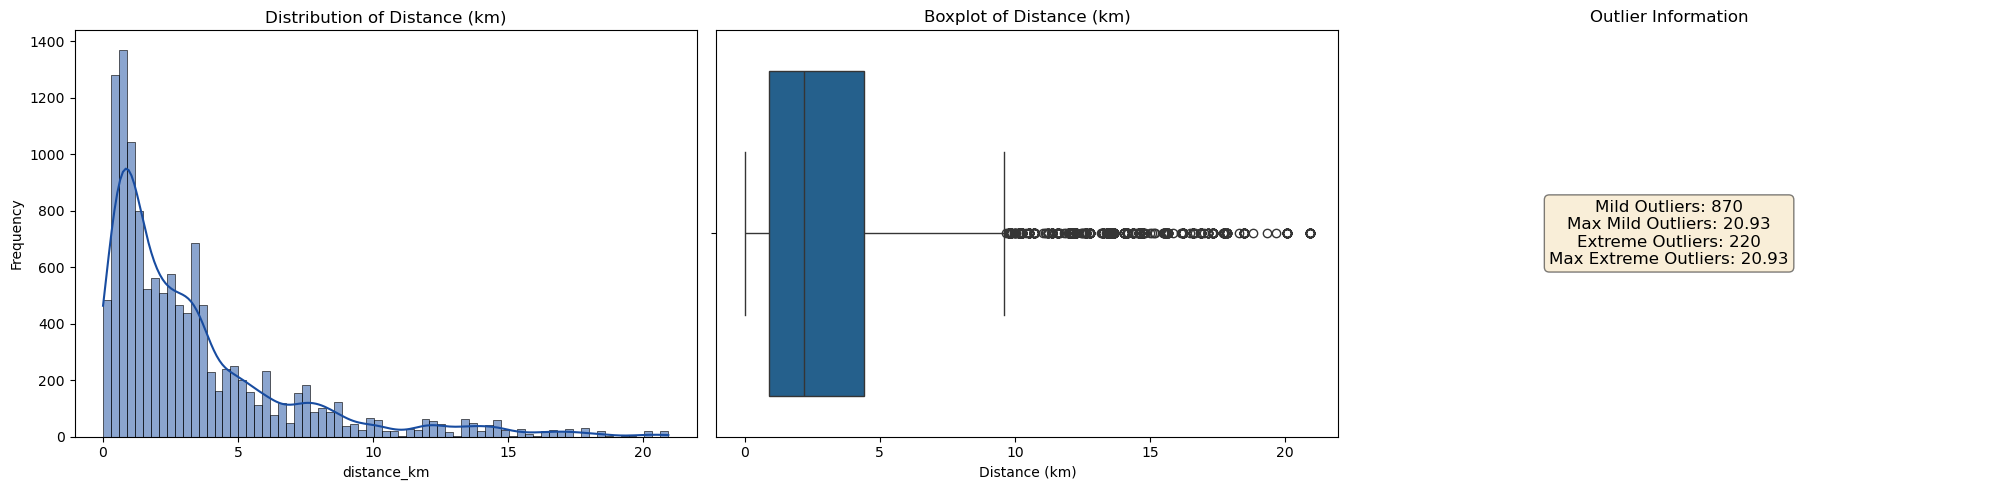

In [176]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df['distance_km'], kde=True, color='#184ca0', ax=axes[0])
axes[0].set_title('Distribution of Distance (km)')
axes[0].set_xlabel('distance_km')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['distance_km'], color='#14639d', ax=axes[1])
axes[1].set_title('Boxplot of Distance (km)')
axes[1].set_xlabel('Distance (km)')

outliers("distance_km")
axes[2].text(
    0.5, 0.5, outlier_text,
    fontsize=12, ha='center', va='center',
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5)
)
axes[2].axis('off')  
axes[2].set_title('Outlier Information')

plt.tight_layout()
plt.show()

The distribution of travel distance (distance_km) shows a significant number of outliers when analyzed overall. This can be explained by Transjakarta's service structure, where travel distances are predetermined based on available routes. However, customer preferences lean more towards shorter journeys, with fewer passengers opting for longer trips.

In other words, while longer travel distances are available, only a small subset of passengers chooses them. Therefore, despite the presence of many outliers, these values likely reflect customer preferences for shorter trips rather than data anomalies.

> #### tripDuration

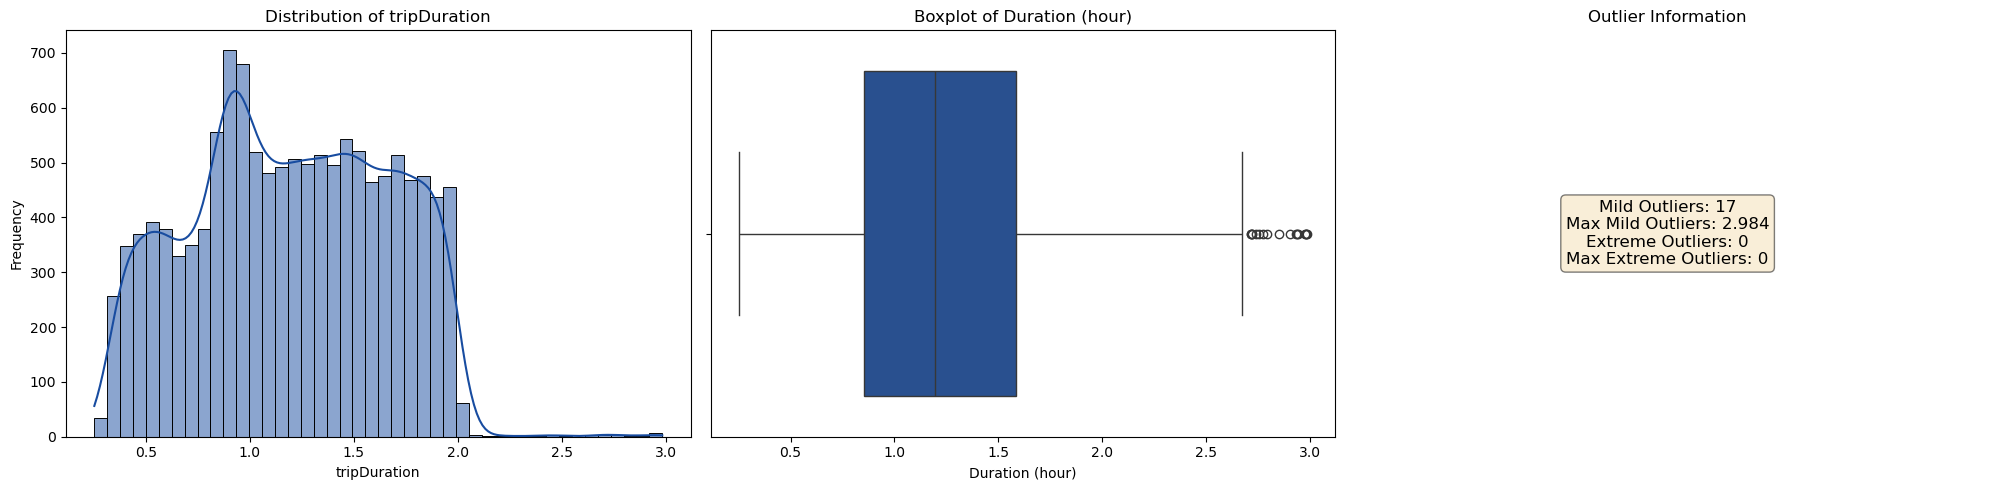

In [177]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot the histogram
sns.histplot(df['tripDuration'], kde=True, color='#184ca0', ax=axes[0])
axes[0].set_title('Distribution of tripDuration')
axes[0].set_xlabel('tripDuration')
axes[0].set_ylabel('Frequency')

# Plot the boxplot
sns.boxplot(x=df['tripDuration'], color='#184ca0', ax=axes[1])
axes[1].set_title('Boxplot of Duration (hour)')
axes[1].set_xlabel('Duration (hour)')

outliers("tripDuration")
axes[2].text(
    0.5, 0.5, outlier_text,
    fontsize=12, ha='center', va='center',
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5)
)
axes[2].axis('off')  
axes[2].set_title('Outlier Information')

plt.tight_layout()
plt.show()



The distribution of tripDuration, which represents the time from tap-in to tap-out, exhibits minor outliers of up to 2.9 hours. However, no extreme outliers were detected in the data.

A trip duration of nearly 3 hours is still reasonable, given factors such as long-distance travel, wait times at specific stops, and traffic conditions that may affect travel time. Furthermore, this variation reflects Transjakarta's flexibility in meeting a variety of travel needs, whether short or long distances.

It is important to note that tripDuration does not accurately reflect passengers' actual travel time. Instead, it represents the time recorded between the initial tap-in at the starting stop and the tap-out at the destination stop. As a result, waiting times at stops and other time gaps all contribute to the recorded duration.

> #### tripDuration x distance_km x seqDiff

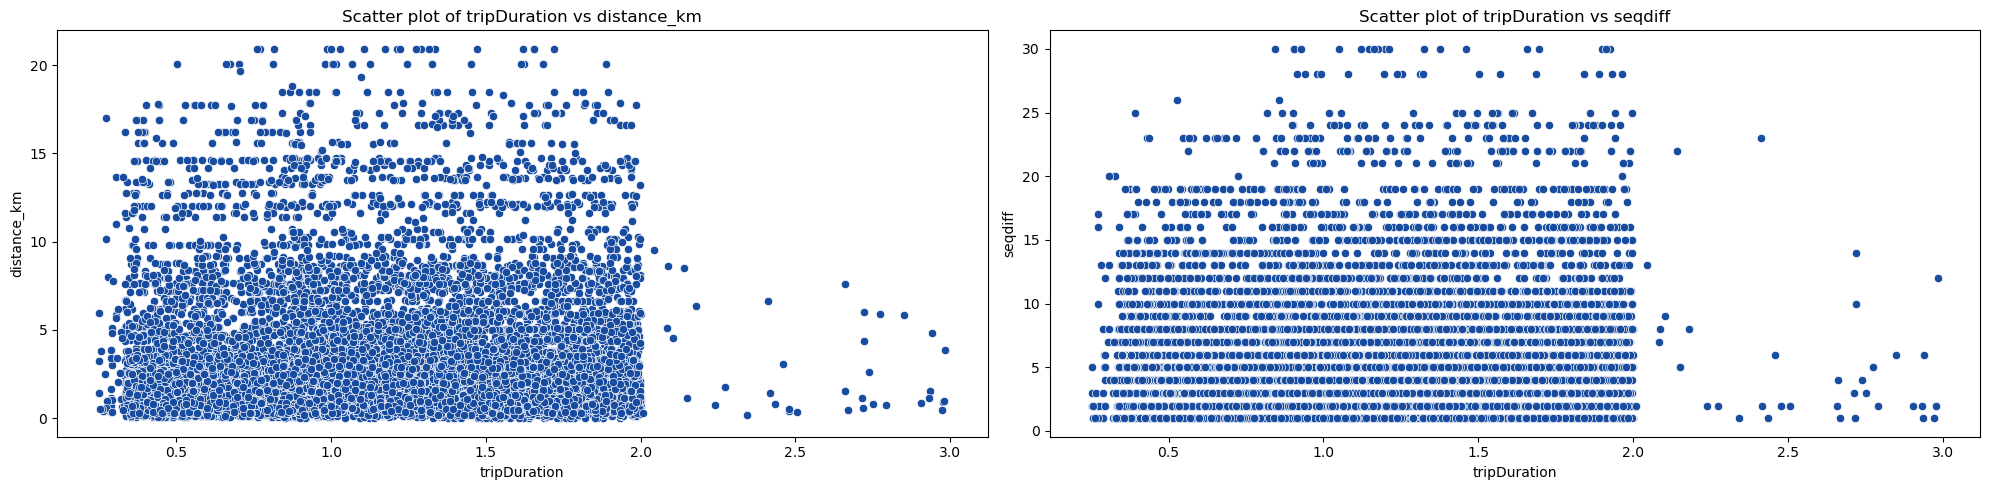

In [178]:
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Scatter plot of tripDuration vs distance_km
sns.scatterplot(data=df, x='tripDuration', y='distance_km', color='#184ca0', ax=axes[0])
axes[0].set_title('Scatter plot of tripDuration vs distance_km')
axes[0].set_xlabel('tripDuration')
axes[0].set_ylabel('distance_km')

# Scatter plot of tripDuration vs seqdiff
sns.scatterplot(data=df, x='tripDuration', y='seqDiff', color='#184ca0', ax=axes[1])
axes[1].set_title('Scatter plot of tripDuration vs seqdiff')
axes[1].set_xlabel('tripDuration')
axes[1].set_ylabel('seqdiff')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Normality Test (Shapiro-Wilk):
tripDuration does NOT appear to follow a normal distribution (p-value: 0.0).
distance_km does NOT appear to follow a normal distribution (p-value: 0.0).
seqDiff does NOT appear to follow a normal distribution (p-value: 0.0).



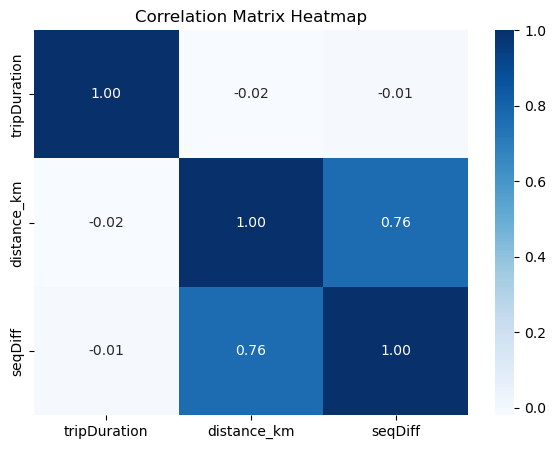

In [179]:
columns_to_test = ['tripDuration', 'distance_km', 'seqDiff']

print("Normality Test (Shapiro-Wilk):")
for column in columns_to_test:
    stat, p_value = normaltest(df[column])
    if p_value > 0.05:
        print(f"{column} appears to follow a normal distribution (p-value: {p_value}).")
    else:
        print(f"{column} does NOT appear to follow a normal distribution (p-value: {p_value}).")
print()

# correlation test
if all(normaltest(df[col])[1] > 0.05 for col in columns_to_test):
    correlation_matrix = df[columns_to_test].corr(method='pearson')
else:
    correlation_matrix = df[columns_to_test].corr(method='spearman')

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


A correlation of 0.77 between distance_km and seqdiff suggests a strong positive relationship between the two variables. In this context, distance_km represents the distance between tap-in and tap-out stops, while seqdiff measures the difference in stop sequences between the tap-in and tap-out points.

This correlation indicates that, generally, as the seqdiff (the difference in stop sequence) increases, the distance_km also tends to increase. This makes sense because longer distances typically involve more stops, leading to a greater sequence difference. Therefore, it aligns with the expectation that longer trips (in terms of distance) would have a higher seqdiff due to more stops being involved in the journey.

#### **5.4.3 Environmental Context**

> #### dayofWeek

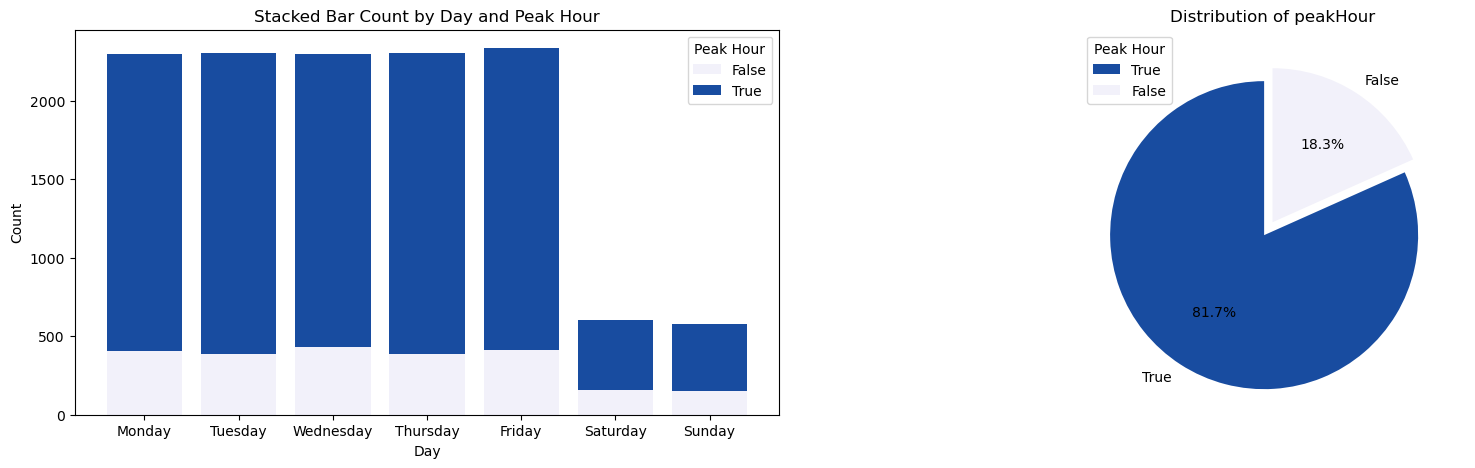

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = pd.CategoricalDtype(categories=day_order, ordered=True)
df['dayOfWeek'] = df['dayOfWeek'].astype(day_type)
cust_count_byDay = df.groupby(['dayOfWeek', 'peakHour']).size().unstack(fill_value=0)
colors=['#f2f1fa', "#184ca0"]

cust_count_byDay = cust_count_byDay.reindex(index=day_order)
axes[0].bar(cust_count_byDay.index, 
            cust_count_byDay.iloc[:, 0],  # First category
            color=colors[0], 
            label=cust_count_byDay.columns[0])

axes[0].bar(cust_count_byDay.index, 
            cust_count_byDay.iloc[:, 1],  # Second category
            bottom=cust_count_byDay.iloc[:, 0],  # Stack on top
            color=colors[1], 
            label=cust_count_byDay.columns[1])

axes[0].set_title('Stacked Bar Count by Day and Peak Hour')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].legend(title="Peak Hour")

# peak hour pie
peakHour_counts = df["peakHour"].value_counts()
plt.pie(peakHour_counts, labels=peakHour_counts.index, autopct='%1.1f%%', colors=['#184ca0', '#f2f1fa'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Distribution of peakHour')
axes[1].legend(title="Peak Hour")
plt.show()



The distribution of trips across the dayOfWeek variable shows a clear pattern of increased usage on weekdays (Monday through Friday), with an average of more than 6,000 trips per day. On the other hand, there is a noticeable decrease in activity over the weekend (Saturday and Sunday), with the average dropping to around 1,800 trips per day.

This pattern indicates that Transjakarta is primarily used for commuter purposes on weekdays, such as getting to work or school. The significant decrease in weekend trips can be attributed to a shift in travel preferences, in which people reduce their mobility or use other modes of transportation for recreational or personal activities. This insight also emphasises the importance of Transjakarta as a mode of transportation for daily routines, particularly during peak weekday hours. 


#### **5.4.4 Tap In Identifier**

In [181]:
display(df[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime']].describe(include=["number","datetime"]))
display(df[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime']].describe(exclude=['number', 'datetime']))

tapInStopsLat  tapInStopsLon  stopStartSeq  \
count   12735.000000   12735.000000  12735.000000   
mean       -6.206728     106.836745      8.241618   
min        -6.394973     106.614730      0.000000   
25%        -6.240213     106.798376      2.000000   
50%        -6.212322     106.831640      7.000000   
75%        -6.167510     106.876000     13.000000   
max        -6.093258     107.023950     38.000000   
std         0.053657       0.066776      6.946019   

                           tapInTime  
count                          12735  
mean   2023-04-16 07:51:41.047506944  
min              2023-04-01 07:32:50  
25%              2023-04-10 09:05:05  
50%              2023-04-16 17:50:19  
75%       2023-04-21 21:43:06.500000  
max              2023-04-30 21:55:41  
std                              NaN

tapInStopsName
count           12735
unique            597
top       Penjaringan
freq              228

> #### tapInStopsName

In [182]:
df[["tapInStopsName"]].value_counts().head(10)

tapInStopsName   
Penjaringan          228
Garuda Taman Mini    198
Pejaten              144
Rusun Kapuk Muara    125
BNN LRT              123
Tendean              120
Seskoal              120
Petojo               111
Rawa Selatan         108
Penggilingan         106
Name: count, dtype: int64

In [183]:
df[["tapInStopsName"]].value_counts().tail(10)

tapInStopsName               
PTC Pulo Gadung                  1
Pangeran Jayakarta               1
Pedati Prumpung                  1
Perumahan KFT 1                  1
Pesona Khayangan                 1
Pesona Square                    1
Pintu 2 Jembatan Semanan Raya    1
Pintu Exit Term. Pulo Gebang     1
Pintu Masuk PIK 2                1
Yos Sudarso Kodamar              1
Name: count, dtype: int64

The analysis of tapInStops and tapInStopsName revealed that some stops appear only once in the dataset. This can indicate two main options:

- Rare travel preferences - These stops may be used by a small number of users for specific trips, such as one-time or occasional excursions.
- Limited route coverage - These stops may be on less popular routes, indicating that passengers have not used them frequently.

In either case, these findings indicate that, while these stops exist in the system, they are not central to overall ridership patterns and may be more niche or underutilised parts of the transportation network.

> #### tapInStopsLon & tapInStopsLat

In [184]:
# Create a map centered around Jakarta
map_jabodetabek = folium.Map(location=[-6.2, 106.8], zoom_start=10)

jabodetabek_coordinates = [
    [-6.597184776219657, 106.79951838536633],  # Bogor area
    [-6.297234, 107.253075],  # East of Bekasi
    [-6.051200, 107.060203],  # North of Bekasi
    [-6.048056, 106.830803],  # North of Jakarta
    [-6.091001, 106.647282],  # North of Tangerang
    [-6.184664, 106.551806],  # West of Tangerang
    [-6.597184776219657, 106.79951838536633],  # Bogor area
]

# Add coordinates to highlight the Jabodetabek area
folium.Polygon(
    jabodetabek_coordinates,
    color="blue",
    weight=2,
    fill=True,
    fill_color="lightblue",
    fill_opacity=0.4
).add_to(map_jabodetabek)

# Add a Marker Cluster to handle thousands of points
marker_cluster = MarkerCluster().add_to(map_jabodetabek)

# Loop through the dataframe and add markers
unique_lat_lon = df[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates()

for idx, row in unique_lat_lon.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        popup=row['tapInStopsName']
        ).add_to(marker_cluster)

# Display the map
map_jabodetabek


In addition to frequency analysis, the recorded stops' longitude and latitude were checked for anomalies. The results show that all stops are in the Jabodetabek area, which is consistent with Transjakarta's operational coverage.

There were no indications of location anomalies, such as stops being located outside the service area. This suggests that the data for tap-in stop locations has been well-managed and is consistent with the main service area.

> #### stopStartSeq

In [185]:
df[["corridorID", "stopStartSeq"]].sort_values(ascending=False, by="stopStartSeq").head(5)

corridorID  stopStartSeq
10202        R1A            38
9602         R1A            38
7802         R1A            38
8402         R1A            38
10802        R1A            38

<img src="https://pbs.twimg.com/media/FnNL5eHaAAAO_nr?format=jpg&name=4096x4096" alt="Rute JAK33" width="400" height="1000">

The maximum value found during the stopStartSeq analysis was 38. After further investigation, this figure is still consistent with Route R1A, which has a large number of stops.

This demonstrates that the number in question is not an anomaly, but rather a characteristic of the route with a larger number of pemberhentians than other routes. As a result, the data in stopStartSeq can be considered valid and consistent.

#### **5.4.5 Tap Out Identifier**

In [186]:
display(df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].describe(include=["number","datetime"]))
display(df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].describe(exclude=['number', 'datetime']))

tapOutStopsLat  tapOutStopsLon    stopEndSeq  \
count    12735.000000    12735.000000  12735.000000   
mean        -6.205731      106.836330     13.068944   
min         -6.394973      106.618070      1.000000   
25%         -6.240213      106.796940      7.000000   
50%         -6.209189      106.831020     13.000000   
75%         -6.166548      106.876370     18.000000   
max         -6.097099      107.023660     40.000000   
std          0.055914        0.065562      7.608136   

                          tapOutTime  
count                          12735  
mean   2023-04-16 09:03:35.040361216  
min              2023-04-01 08:16:02  
25%       2023-04-10 10:14:11.500000  
50%              2023-04-16 19:13:25  
75%              2023-04-21 23:14:55  
max              2023-04-30 23:23:18  
std                              NaN

tapOutStopsName
count            12735
unique             515
top        Penjaringan
freq               264

> #### tapOutStopsName

In [187]:
df[["tapOutStopsName"]].value_counts().head(10)

tapOutStopsName  
Penjaringan          264
BKN                  219
Ragunan              144
Pinang Ranti         142
Monas                139
Pluit                128
Tendean              126
Pecenongan           121
Rusun Kapuk Muara    112
Jelambar             110
Name: count, dtype: int64

In [188]:
df[["tapOutStopsName"]].value_counts().tail(10)

tapOutStopsName                 
Jln. Wr Supratman                   1
Jln. Teluk Mandar 2                 1
Jln. Sukamulya III Harapan Mulya    1
Jln. Sandratex 1                    1
Jln. Pesanggrahan                   1
Jln. Pendidikan Jatinegara Kaum     1
Jln. Muara 1                        1
Jln. Melati Senen                   1
SDN Cengkareng Timur 05             1
ACC Simatupang                      1
Name: count, dtype: int64

During the tapOutStopsName analysis, several stops appeared only once in the dataset. This could point to two main possibilities:

- Rare travel preferences - These stops may be used by a small number of users on specific trips, such as one-time or infrequent journeys.
- Limited route coverage - These stops may be located along a less popular or rarely used route by passengers.
These findings suggest that there may be some underutilised routes or stops, potentially indicating areas that could benefit from increased service or promotion to attract more passengers

> #### tapOutStopsLat & tapOutStopsLon

In [189]:
map_jabodetabek = folium.Map(location=[-6.2, 106.8], zoom_start=10)

jabodetabek_coordinates = [
    [-6.597184776219657, 106.79951838536633],  # Bogor area
    [-6.297234, 107.253075],  # East of Bekasi
    [-6.051200, 107.060203],  # North of Bekasi
    [-6.048056, 106.830803],  # North of Jakarta
    [-6.091001, 106.647282],  # North of Tangerang
    [-6.184664, 106.551806],  # West of Tangerang
    [-6.597184776219657, 106.79951838536633],  # Bogor area
]

folium.Polygon(
    jabodetabek_coordinates,
    color="blue",
    weight=2,
    fill=True,
    fill_color="lightblue",
    fill_opacity=0.4
).add_to(map_jabodetabek)

marker_cluster = MarkerCluster().add_to(map_jabodetabek)

unique_lat_lon = df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].drop_duplicates()

for idx, row in unique_lat_lon.iterrows():
    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        popup=row['tapOutStopsName']
        ).add_to(marker_cluster)

map_jabodetabek


Anomalies in longitude and latitude are also detected from previously recorded stops. The results show that all stops are in the Jabodetabek area, in accordance with Transjakarta's operational plan.

There are no indications of anomalous location, such as stops outside the service area. This indicates that data on tap-in stop locations has been collected in a reliable and consistent manner with the primary service area.

> #### stopEndSeq

In [190]:
df[["corridorID", "stopEndSeq"]].sort_values(ascending=False, by="stopEndSeq").head(5)

corridorID  stopEndSeq
34471        R1A          40
7202         R1A          39
8402         R1A          39
1202         R1A          39
9602         R1A          39

<img src="https://pbs.twimg.com/media/FnNL5eHaAAAO_nr?format=jpg&name=4096x4096" alt="Rute JAK33" width="400" height="1000">

Similar to stopStartSeq, it was discovered that the maximum value of stopEndSeq reaches 40 on the R1A corridor, which has a large number of stops.

This suggests that the value is not an outlier, but rather reflects the characteristics of a route with more stops than other routes. Thus, the data in stopEndSeq can still be considered valid and consistent.

#### **5.4.6 Normality Test**

Next is normality test

In [191]:
numeric_data = df.select_dtypes(include= 'number')

for col in numeric_data.columns:
    stat, p_value = normaltest(df[col])
    print(f"Kolom '{col}':")
    print("p-value =", p_value)
    
    # Interpretasi hasil tes
    alpha = 0.05
    if p_value > alpha:
         print("Data terdistribusi normal (tidak dapat menolak H0)")
    else:
         print("Data tidak terdistribusi normal (menolak H0)")
    print()

Kolom 'payCardBirthDate':
p-value = 2.050528735760718e-117
Data tidak terdistribusi normal (menolak H0)

Kolom 'age':
p-value = 2.0505287357427004e-117
Data tidak terdistribusi normal (menolak H0)

Kolom 'distance_km':
p-value = 0.0
Data tidak terdistribusi normal (menolak H0)

Kolom 'seqDiff':
p-value = 0.0
Data tidak terdistribusi normal (menolak H0)

Kolom 'tripDuration':
p-value = 0.0
Data tidak terdistribusi normal (menolak H0)

Kolom 'tapInStopsLat':
p-value = 2.3532414983192274e-49
Data tidak terdistribusi normal (menolak H0)

Kolom 'tapInStopsLon':
p-value = 2.61528164976008e-77
Data tidak terdistribusi normal (menolak H0)

Kolom 'stopStartSeq':
p-value = 0.0
Data tidak terdistribusi normal (menolak H0)

Kolom 'tapOutStopsLat':
p-value = 3.4343469439590904e-43
Data tidak terdistribusi normal (menolak H0)

Kolom 'tapOutStopsLon':
p-value = 8.234348327762488e-28
Data tidak terdistribusi normal (menolak H0)

Kolom 'stopEndSeq':
p-value = 5.707658833285219e-154
Data tidak terdistri

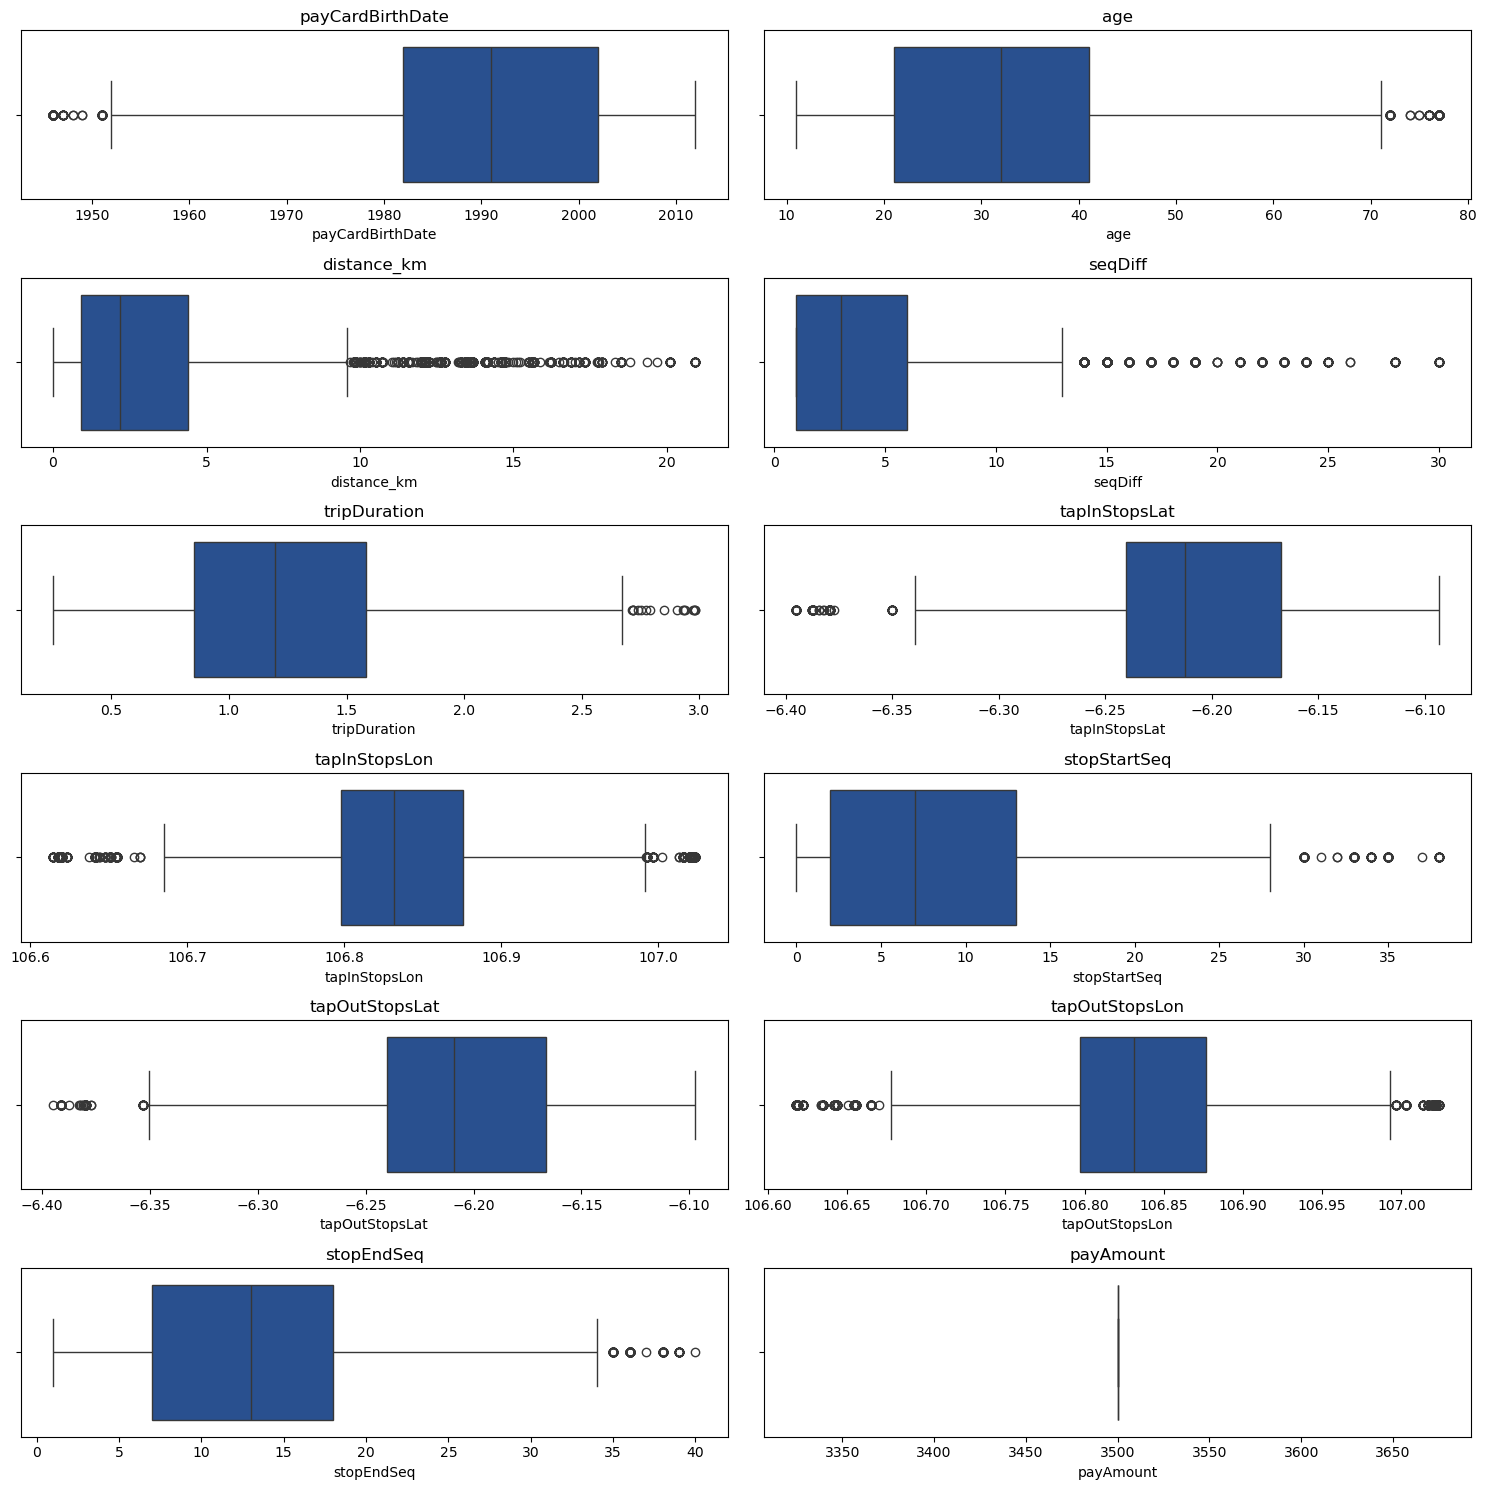

In [192]:
fig = plt.figure(figsize=(15, 15))  

count = 0
for kolom in numeric_data.columns:
    count += 1
    plt.subplot(6, 2, count)  
    sns.boxplot(x=numeric_data[kolom], color='#184ca0')  
    plt.title(f'{kolom}')

fig.tight_layout()  
plt.show()


Most columns, including payCardBirthDate, age, distance_km, seqDiff, tripDuration, and various stop-related columns, do not follow a normal distribution, as evidenced by extremely small p-values (approaching zero). For these columns, we reject the null hypothesis (H0), indicating that the data is not normally distributed. However, the column payAmount returned a nan value, indicating that the test could not be carried out or interpreted correctly for this variable.

Finally, the majority of the variables in the dataset do not follow a normal distribution, which has implications for selecting appropriate statistical methods for future analysis.

---

## **06. Analysis**

To address the problem statement of optimising the operational efficiency of Transjakarta Corridor 1, the first step focusses on the stops along Corridor 1. The goal is to understand how this route can provide the best accessibility for users while also considering operational efficiency and financial sustainability.

One of the major issues in this analysis is determining which stops overlap with MRT routes. **Overlap is defined as a distance of no more than 0.5 km between Transjakarta stops and MRT stations**.

##### Preparing MRT Data
The first step in this analysis is to map the stops using the tapInStopsName and tapOutStopsName, as well as the longitude and latitude coordinates for each stop in Corridor 1. This mapping aims to identify relevant locations along the Corridor 1 route and allow for further analysis of the distances between stops and MRT stations.


In [193]:
filtered_df = df[df['corridorID'] == "1"]
mapped_df = filtered_df[["tapInStopsName", "tapInStopsLat", "tapInStopsLon"]].drop_duplicates().dropna()
mapping_tapinstops_df = dict(zip(mapped_df["tapInStopsName"], zip(mapped_df["tapInStopsLat"], mapped_df["tapInStopsLon"])))

filtered_df = df[df['corridorID'] == "1"]
mapped_df = filtered_df[["tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon"]].drop_duplicates().dropna()
mapping_tapoutstops_df = dict(zip(mapped_df["tapOutStopsName"], zip(mapped_df["tapOutStopsLat"], mapped_df["tapOutStopsLon"])))

cor1Stops_mapping = {**mapping_tapinstops_df, **mapping_tapoutstops_df}
cor1Stops_mapping = pd.DataFrame(cor1Stops_mapping).transpose().reset_index()
cor1Stops_mapping.columns = ["stopsName", "stopsLat", "stopsLon"]

cor1Stops_mapping

stopsName  stopsLat    stopsLon
0            Polda Metro Jaya -6.221094  106.810280
1              Karet Sudirman -6.212457  106.820030
2             Bendungan Hilir -6.217137  106.815280
3                  MH Thamrin -6.188149  106.822990
4                Masjid Agung -6.236483  106.798450
5                  Dukuh Atas -6.205702  106.822230
6      Sawah Besar Arah Utara -6.157418  106.818460
7                      Tosari -6.196892  106.823090
8                       Olimo -6.149300  106.816690
9                      Blok M -6.243312  106.801750
10                      Monas -6.176248  106.822860
11    Mangga Besar Arah Utara -6.153250  106.817536
12            Kejaksaan Agung -6.240500  106.798440
13          Gelora Bung Karno -6.224217  106.805800
14  Mangga Besar Arah Selatan -6.153943  106.817952
15         Harmoni Arah Utara -6.162678  106.819663
16                     Glodok -6.144500  106.815450
17                Bundaran HI -6.193021  106.823000
18           Bundaran Senayan -6.227869  106.800940
19           Kali Besar Barat -6.135355  106.811430
20  Bank Indonesia Arah Utara -6.182776  106.822800

Next, using domain knowledge, a list of MRT stations with latitude and longitude coordinates is generated. This list will be used to assess the proximity of Transjakarta stops in Corridor 1 to the MRT stations. By comparing the coordinates, we can see where stops and MRT stations overlap and calculate distances to see if they meet the 0.5 km threshold.

In [194]:
mrt = {
    'stasiunMrt': [
        'Bundaran HI Bank DKI', 'Dukuh Atas BNI', 'Setiabudi Astra', 'Bendungan Hilir', 
        'Senayan', 'ASEAN', 'Blok M', 'Haji Nawi', 'Cipete Raya', 'Fatmawati', 'Lebak Bulus'
    ],
    'stasiunMrtLat': [
        -6.191656935181984, -6.200499369108775, -6.20868312418868, -6.21487393149615, 
        -6.226605852311207, -6.238556063014214, -6.244318701143795, -6.266435400257736, 
        -6.278183394987343, -6.292185934267968, -6.289334017900038
    ],
    'stasiunMrtLon': [
        106.82298122347308, 106.82274757669944, 106.82153210480408, 106.81802003595958, 
        106.80246245802407, 106.79833289578372, 106.79809253014825, 106.79739682300458, 
        106.79735373609631, 106.79256876171422, 106.77416194742442
    ]
}

df_mrt = pd.DataFrame(mrt)
df_mrt


stasiunMrt  stasiunMrtLat  stasiunMrtLon
0   Bundaran HI Bank DKI      -6.191657     106.822981
1         Dukuh Atas BNI      -6.200499     106.822748
2        Setiabudi Astra      -6.208683     106.821532
3        Bendungan Hilir      -6.214874     106.818020
4                Senayan      -6.226606     106.802462
5                  ASEAN      -6.238556     106.798333
6                 Blok M      -6.244319     106.798093
7              Haji Nawi      -6.266435     106.797397
8            Cipete Raya      -6.278183     106.797354
9              Fatmawati      -6.292186     106.792569
10           Lebak Bulus      -6.289334     106.774162

After listing and coordinating the MRT station, the next step is to calculate the distance (in kilometres) between each stop on Koridor 1 and the MRT station.

In [195]:
def calculate_distance(station_lat, station_lon, stop_lat, stop_lon):
    return geodesic((station_lat, station_lon), (stop_lat, stop_lon)).kilometers

distance_data = []

for _, mrt_row in df_mrt.iterrows():
    mrt_station_name = mrt_row['stasiunMrt']
    mrt_station_lat = mrt_row['stasiunMrtLat']
    mrt_station_lon = mrt_row['stasiunMrtLon']
    
    for _, stop_row in cor1Stops_mapping.iterrows():
        stop_name = stop_row['stopsName']
        stop_lat = stop_row['stopsLat']
        stop_lon = stop_row['stopsLon']
        
        distance_km = calculate_distance(mrt_station_lat, mrt_station_lon, stop_lat, stop_lon)
        distance_km = round(distance_km, 2)

        distance_data.append({
            'MRT_Station': mrt_station_name,
            'transjakarta_Stop': stop_name,
            'distance_km': distance_km
        })

distance_df = pd.DataFrame(distance_data)
print(distance_df)


              MRT_Station          transjakarta_Stop  distance_km
0    Bundaran HI Bank DKI           Polda Metro Jaya         3.55
1    Bundaran HI Bank DKI             Karet Sudirman         2.32
2    Bundaran HI Bank DKI            Bendungan Hilir         2.94
3    Bundaran HI Bank DKI                 MH Thamrin         0.39
4    Bundaran HI Bank DKI               Masjid Agung         5.65
..                    ...                        ...          ...
226           Lebak Bulus                     Glodok        16.66
227           Lebak Bulus                Bundaran HI        11.94
228           Lebak Bulus           Bundaran Senayan         7.42
229           Lebak Bulus           Kali Besar Barat        17.52
230           Lebak Bulus  Bank Indonesia Arah Utara        12.96

[231 rows x 3 columns]


After calculating the distance (distance_km) between Corridor 1 stops and MRT stations, the distances are categorised. If the distance between a stop and an MRT station is less than or equal to 0.5 km, the stop is labelled "close to MRT" and has the value True.

In [196]:
distance_df["overlap"] = np.where(distance_df["distance_km"] <= 0.5, True, False)
near_mrt = (distance_df[distance_df["overlap"]==True]["transjakarta_Stop"].unique()).astype(list)

After categorising the distance between Corridor 1 stops and MRT stations, the DataFrame df1 was updated to reflect this. This DataFrame is now used to identify stops in tapInStopsName and tapOutStopsName that are near MRT stations.

By incorporating this new data into df1, you can easily filter and analyse which stops are closest to MRT stations, allowing for further operational optimisation.

In [197]:
df["tapInStop_near_mrt"] = np.where(df["tapInStopsName"].isin(near_mrt), True, False)
df["tapOutStop_near_mrt"] = np.where(df["tapOutStopsName"].isin(near_mrt), True, False)
df[["tapInStopsName", "tapInStop_near_mrt", "tapOutStopsName", "tapOutStop_near_mrt"]].head()

tapInStopsName  tapInStop_near_mrt        tapOutStopsName  \
0                       Pal Putih               False                Tegalan   
2                    Gg. Kunir II               False  Simpang Kunir Kemukus   
4          Sunter Boulevard Barat               False       Kali Besar Barat   
11                        Tendean               False       Mampang Prapatan   
12  Slipi Petamburan Arah Selatan               False               Semanggi   

    tapOutStop_near_mrt  
0                 False  
2                 False  
4                 False  
11                False  
12                False

In [198]:
tapIn_near_mrt = pd.DataFrame(df.groupby('corridorID')['tapInStop_near_mrt'].value_counts()).reset_index()
tapIn_near_mrt_true = tapIn_near_mrt[tapIn_near_mrt["tapInStop_near_mrt"] == True]
tapIn_near_mrt_false = tapIn_near_mrt[tapIn_near_mrt["tapInStop_near_mrt"] == False]

In [199]:
# buat data frame yang berisi corridorID = 1 saja

df1 = df[df["corridorID"] == "1"]
df1.head()

transID        payCardID payCardBank                payCardName  \
29   LFYJ535S2I30DP    4682220924642      online  Drs. Nadia Ramadan, S.Sos   
63   MQCN972F9X71NY  180057903365395      emoney            Daryani Prabowo   
142  UMNC719B6F52LL   30100687125098         bni        Galak Budiman, S.Pt   
329  HCUL755D8E37PW    4682220924642      online  Drs. Nadia Ramadan, S.Sos   
363  WHIW427O9T27ZC  180057903365395      emoney            Daryani Prabowo   

    payCardSex  payCardBirthDate  age   ageCategory corridorID   corridorName  \
29        Male              1960   63  Senior Adult          1  Blok M - Kota   
63        Male              1989   34         Adult          1  Blok M - Kota   
142     Female              2008   15      Teenager          1  Blok M - Kota   
329       Male              1960   63  Senior Adult          1  Blok M - Kota   
363       Male              1989   34         Adult          1  Blok M - Kota   

     ... stopStartSeq           tapInTime   tapOutStopsName  tapOutStopsLat  \
29   ...            5 2023-04-03 06:15:29    Karet Sudirman       -6.212457   
63   ...           14 2023-04-03 06:20:11      Masjid Agung       -6.236483   
142  ...            6 2023-04-03 05:05:42             Monas       -6.176248   
329  ...           10 2023-04-03 16:21:59            Tosari       -6.196892   
363  ...            2 2023-04-03 16:25:06  Polda Metro Jaya       -6.221094   

     tapOutStopsLon stopEndSeq          tapOutTime payAmount  \
29        106.82003          7 2023-04-03 06:50:32    3500.0   
63        106.79845         19 2023-04-03 07:10:56    3500.0   
142       106.82286         13 2023-04-03 06:05:17    3500.0   
329       106.82309         12 2023-04-03 18:17:42    3500.0   
363       106.81028          5 2023-04-03 17:44:09    3500.0   

     tapInStop_near_mrt  tapOutStop_near_mrt  
29                False                 True  
63                 True                 True  
142                True                False  
329                True                 True  
363                True                False  

[5 rows x 30 columns]

In [200]:
len(df)

12735

**Route Overview: Corridor 1 and MRT Integration**

The map below shows the routes of Transjakarta Corridor 1 (blue) and the MRT (red). By mapping the locations of both Transjakarta stops and MRT stations, this visualisation highlights the overlap between the two modes of transportation. According to the analysis, 11 stops along Corridor 1 are within 0.5 km of an MRT station, indicating significant service overlap. This proximity enables the potential optimisation of transport services, taking into account the availability of both modes in close proximity.


In [201]:
# Create a map object
corridor1_route = folium.Map(location=[-6.200000, 106.820000], zoom_start=13)

# Add markers for Corridor 1 stops
for _, row in cor1Stops_mapping.iterrows():
    folium.Marker(
        location=[row['stopsLat'], row['stopsLon']],
        popup=row['stopsName'],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(corridor1_route)

# Add markers for MRT stops with a different color
for _, row in df_mrt.iterrows():
    folium.Marker(
        location=[row['stasiunMrtLat'], row['stasiunMrtLon']],
        popup=row['stasiunMrt'],
        icon=folium.Icon(color="red", icon="info-sign")  # Use green for MRT
    ).add_to(corridor1_route)

# Display the map
corridor1_route


### **6.1 - Corridor 1 Customer Behavior Pattern**

To address the problem statement, the next step is to analyse the existing customer behaviour on Transjakarta Corridor 1. This analysis seeks to uncover trends in route usage, travel frequency, and customer characteristics, thereby providing insights into current operational efficiency and opportunities for route optimisation. Understanding how customers interact with the corridor, such as peak travel times, popular stops, and user demographics, will aid in the identification of potential service improvements. These insights are critical for optimising Corridor 1's operational flow and ensuring that the system meets its users' evolving needs.


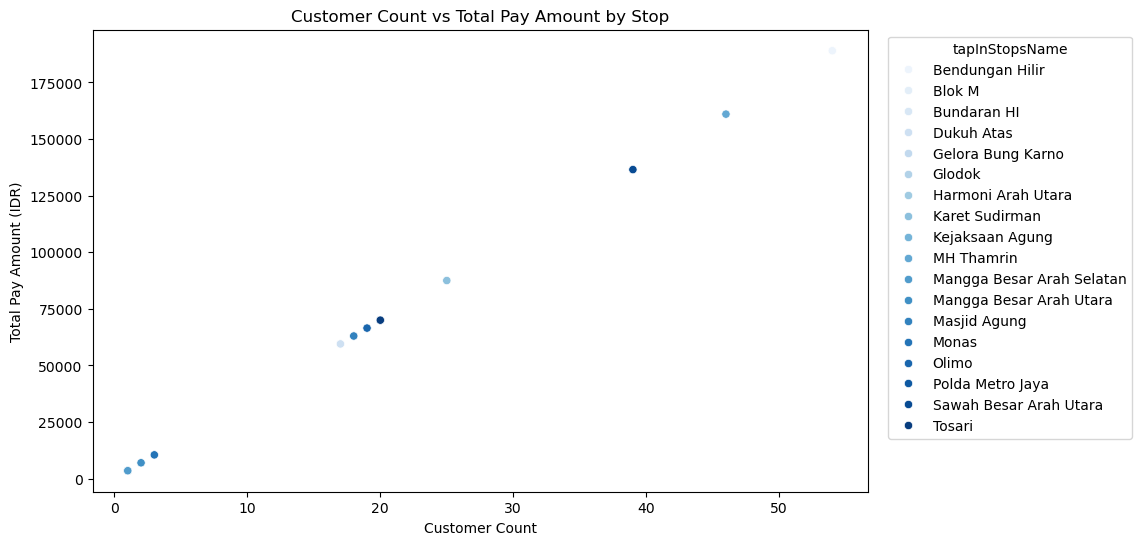

In [202]:
df1_grouped = df1.groupby('tapInStopsName').agg(
    customer_count=('payCardID', 'count'),  # Customer count (or any column that counts customers)
    total_pay_amount=('payAmount', 'sum')  # Sum of payAmount
).reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_grouped, x='customer_count', y='total_pay_amount',  hue='tapInStopsName', palette='Blues')

# Set titles and labels
plt.title('Customer Count vs Total Pay Amount by Stop')
plt.xlabel('Customer Count')
plt.ylabel('Total Pay Amount (IDR)')
plt.legend(title='tapInStopsName', bbox_to_anchor=(1.35, 1), loc='upper right')

# Show the plot
plt.show()


The plot generated shows a clear relationship between the percentage of payAmount and the number of passengers. Both variables follow a very similar pattern, indicating that as the number of passengers increases, so does the recorded pay amount. This implies that payAmount is directly proportional to the number of passengers, with no other factors influencing the pricing or fare charged for each service.

The plot effectively illustrates the distribution of payAmount by emphasising the similarity between the percentage of payAmount and the passenger count. Because both variables follow the same pattern, we can conclude that the payAmount distribution is nearly identical to the passenger count distribution. As a result, no additional plots are required to visualise the spread of payAmount, as it is already clear that its distribution will coincide with the distribution of passenger count.


#### **Demography**

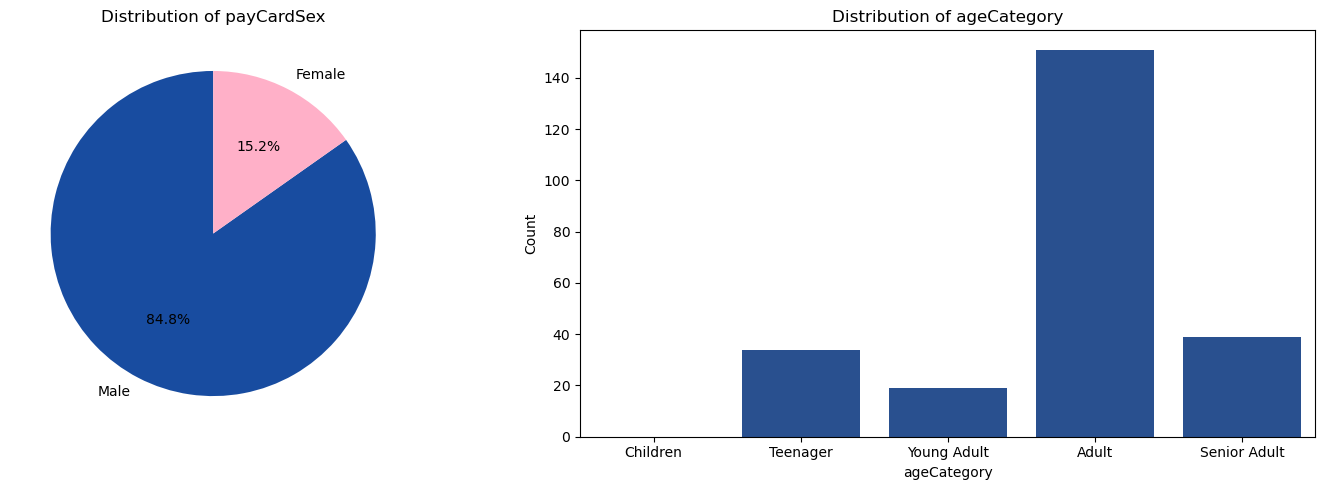

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

tapAll_mrt = df1[(df1["tapInStop_near_mrt"] == True) | (df1["tapOutStop_near_mrt"] == True)]

sex_counts = tapAll_mrt['payCardSex'].value_counts()
colors = ['#184ca0', '#ffb0c8']
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Distribution of payCardSex')

ageCategory_order = ["Children", "Teenager", "Young Adult", "Adult", "Senior Adult"]
age_category_counts = tapAll_mrt['ageCategory'].value_counts()
sns.countplot(ax=axes[1], x=tapAll_mrt['ageCategory'], color='#184ca0', order=ageCategory_order)
axes[1].set_title('Distribution of ageCategory')
axes[1].set_xlabel('ageCategory')
axes[1].set_ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


According to the data visualisation, the majority of Corridor 1 users are male, with 84.8% identifying as such, as shown in the gender distribution plot. Furthermore, the age category distribution plot shows that the majority of users are in the "Adult" category, indicating that Corridor 1 is primarily used by the productive age group. This suggests that the route is primarily used by working-age people, emphasising the corridor's role in meeting daily commuting needs.

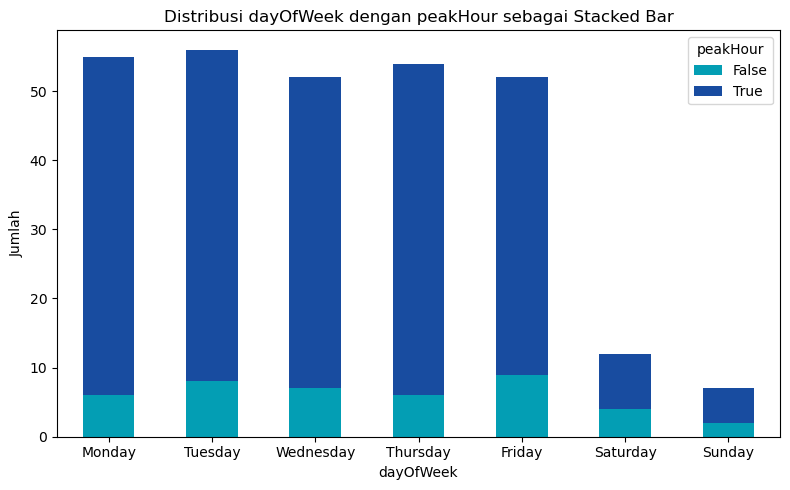

In [204]:
count_data = df1.groupby(['dayOfWeek', 'peakHour']).size().unstack(fill_value=0)

ax= count_data.plot(kind='bar', stacked=True, color=['#039eb4', '#184ca0'] , figsize=(8, 5))

plt.title('Distribusi dayOfWeek dengan peakHour sebagai Stacked Bar')
plt.xlabel('dayOfWeek')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='peakHour', bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()

plt.show()


According to the data visualisation, the majority of Corridor 1 users travel on weekdays, with a high concentration of journeys occurring during peak hours. This trend indicates that the majority of users prefer to travel during peak hours, most likely for work or school commutes. The high usage during peak hours emphasises the importance of optimising the route to meet increased demand during these critical times. 


#### **Stops Density**

In [205]:
cor1_tapIn_counts = df1['tapInStopsName'].value_counts().reset_index()
cor1_tapIn_counts.columns = ['stopsName', 'tapInCount']

tap_out_counts = df1['tapOutStopsName'].value_counts().reset_index()
tap_out_counts.columns = ['stopsName', 'tapOutCount']

cor1_stopsDensity = pd.merge(cor1_tapIn_counts, tap_out_counts, on='stopsName', how='outer')
cor1_stopsDensity.fillna(0, inplace=True)
cor1_stopsDensity['totalCount'] = cor1_stopsDensity['tapInCount'] + cor1_stopsDensity['tapOutCount']
cor1_stopsDensity["stopsDensity"] = round((cor1_stopsDensity["totalCount"])/(cor1_stopsDensity["totalCount"].sum()),2)

cor1_stopsDensity

stopsName  tapInCount  tapOutCount  totalCount  \
0   Bank Indonesia Arah Utara         0.0         18.0        18.0   
1             Bendungan Hilir        54.0          1.0        55.0   
2                      Blok M        19.0         22.0        41.0   
3                 Bundaran HI         1.0          0.0         1.0   
4            Bundaran Senayan         0.0         19.0        19.0   
5                  Dukuh Atas        17.0          7.0        24.0   
6           Gelora Bung Karno         1.0         20.0        21.0   
7                      Glodok         1.0          0.0         1.0   
8          Harmoni Arah Utara         1.0          0.0         1.0   
9            Kali Besar Barat         0.0         22.0        22.0   
10             Karet Sudirman        25.0         19.0        44.0   
11            Kejaksaan Agung         1.0         21.0        22.0   
12                 MH Thamrin        46.0          0.0        46.0   
13  Mangga Besar Arah Selatan         1.0          0.0         1.0   
14    Mangga Besar Arah Utara         2.0          8.0        10.0   
15               Masjid Agung        18.0         37.0        55.0   
16                      Monas         3.0         16.0        19.0   
17                      Olimo        19.0         42.0        61.0   
18           Polda Metro Jaya        20.0         18.0        38.0   
19     Sawah Besar Arah Utara        39.0          0.0        39.0   
20                     Tosari        20.0         18.0        38.0   

    stopsDensity  
0           0.03  
1           0.10  
2           0.07  
3           0.00  
4           0.03  
5           0.04  
6           0.04  
7           0.00  
8           0.00  
9           0.04  
10          0.08  
11          0.04  
12          0.08  
13          0.00  
14          0.02  
15          0.10  
16          0.03  
17          0.11  
18          0.07  
19          0.07  
20          0.07

In [206]:
def categorize_density(stopsDensity):
    if stopsDensity < 0.03:
        return 'Very Low'
    elif stopsDensity < 0.05:
        return 'Low'
    elif stopsDensity < 0.07:
        return 'Medium'
    elif stopsDensity < 0.10:
        return 'High'
    else:
        return 'Very High'

cor1_stopsDensity['densityCategory'] = cor1_stopsDensity['stopsDensity'].apply(categorize_density)
cor1_stopsDensity['near_mrt'] = cor1_stopsDensity['stopsName'].isin(near_mrt)
cor1_stopsDensity = cor1_stopsDensity.sort_values("stopsDensity", ascending=False)
cor1_stopsDensity

stopsName  tapInCount  tapOutCount  totalCount  \
17                      Olimo        19.0         42.0        61.0   
1             Bendungan Hilir        54.0          1.0        55.0   
15               Masjid Agung        18.0         37.0        55.0   
10             Karet Sudirman        25.0         19.0        44.0   
12                 MH Thamrin        46.0          0.0        46.0   
19     Sawah Besar Arah Utara        39.0          0.0        39.0   
18           Polda Metro Jaya        20.0         18.0        38.0   
20                     Tosari        20.0         18.0        38.0   
2                      Blok M        19.0         22.0        41.0   
9            Kali Besar Barat         0.0         22.0        22.0   
11            Kejaksaan Agung         1.0         21.0        22.0   
6           Gelora Bung Karno         1.0         20.0        21.0   
5                  Dukuh Atas        17.0          7.0        24.0   
16                      Monas         3.0         16.0        19.0   
4            Bundaran Senayan         0.0         19.0        19.0   
0   Bank Indonesia Arah Utara         0.0         18.0        18.0   
14    Mangga Besar Arah Utara         2.0          8.0        10.0   
8          Harmoni Arah Utara         1.0          0.0         1.0   
7                      Glodok         1.0          0.0         1.0   
13  Mangga Besar Arah Selatan         1.0          0.0         1.0   
3                 Bundaran HI         1.0          0.0         1.0   

    stopsDensity densityCategory  near_mrt  
17          0.11       Very High     False  
1           0.10       Very High      True  
15          0.10       Very High      True  
10          0.08            High      True  
12          0.08            High      True  
19          0.07            High     False  
18          0.07            High     False  
20          0.07            High      True  
2           0.07            High      True  
9           0.04             Low     False  
11          0.04             Low      True  
6           0.04             Low      True  
5           0.04             Low      True  
16          0.03             Low     False  
4           0.03             Low      True  
0           0.03             Low     False  
14          0.02        Very Low     False  
8           0.00        Very Low     False  
7           0.00        Very Low     False  
13          0.00        Very Low     False  
3           0.00        Very Low      True


The number of tap-ins and tap-outs was used to calculate the user density at each Corridor 1 stop. The data was then normalised and classified into five levels of density: Very Low, Low, Medium, High, and Very High.

The analysis shows the following distribution:
- 3 stops are in the "Very High" category, indicating a high concentration of users at these locations.
- 6 stops are categorised as "High," indicating a moderate but significant number of users.
- 7 stops fall into the "Low" category, indicating that user traffic is light.
- 5 stops are classified as "Very Low," indicating that they are rarely used.

These findings shed light on the varying levels of demand at Corridor 1's stops, allowing for better prioritisation of operational adjustments and resource allocation.

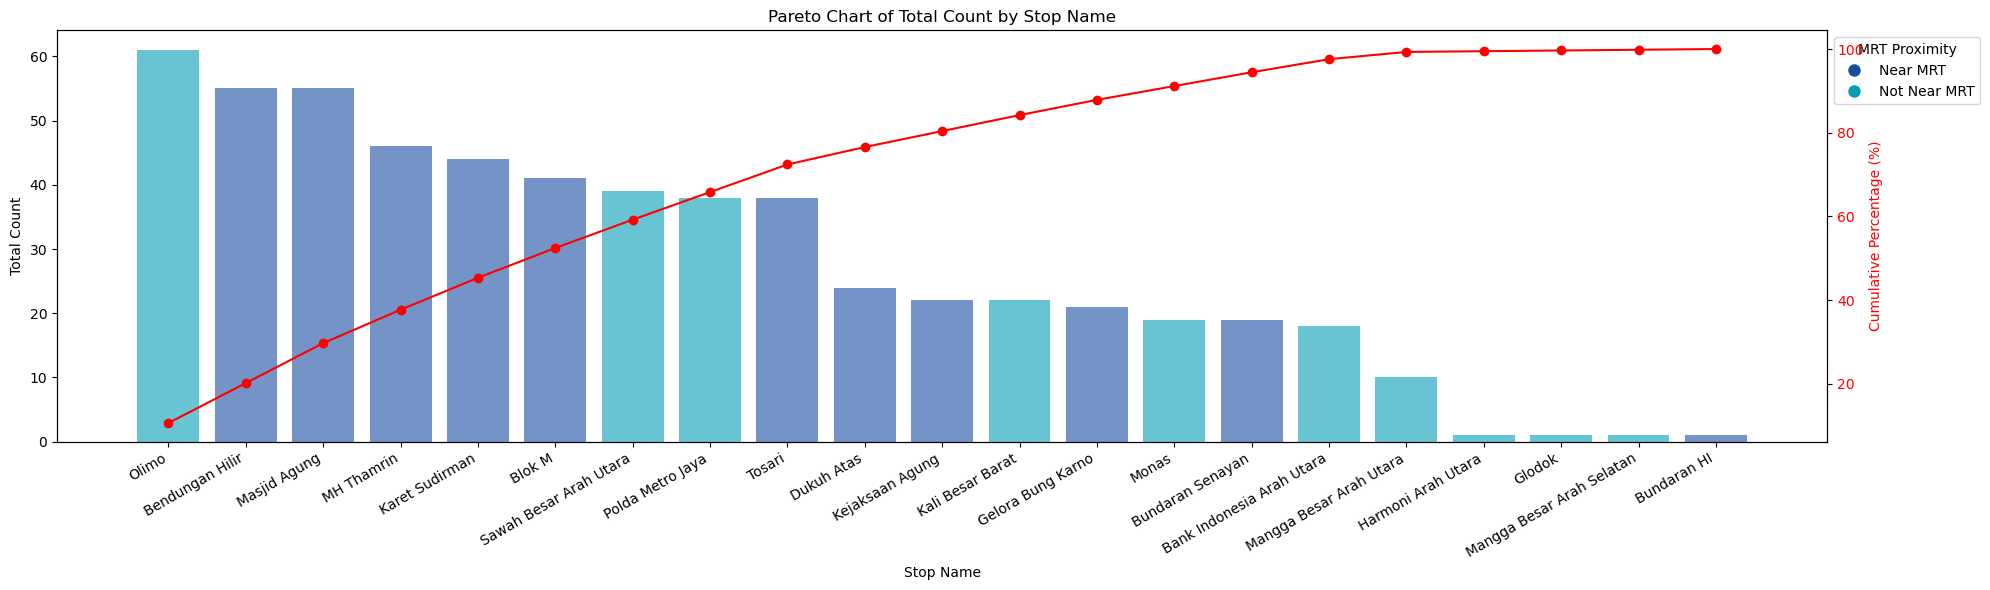

In [207]:
# Sort data by totalCount in descending order
cor1_stopsDensity = cor1_stopsDensity.sort_values(by='totalCount', ascending=False)

# Add cumulative sum and cumulative percentage columns
cor1_stopsDensity['cumulative_sum'] = cor1_stopsDensity['totalCount'].cumsum()
cor1_stopsDensity['cumulative_percentage'] = (
    100 * cor1_stopsDensity['cumulative_sum'] / cor1_stopsDensity['totalCount'].sum()
)

# Create the plot
fig, ax1 = plt.subplots(figsize=(20, 6))

# Bar chart for totalCount
colors = cor1_stopsDensity['near_mrt'].apply(lambda x: '#184ca0' if x else '#039eb4') 
bars = ax1.bar(cor1_stopsDensity['stopsName'], cor1_stopsDensity['totalCount'], color=colors, alpha=0.6, label='Total Count')

# Add legend for MRT proximity
legend_labels = ['Near MRT', 'Not Near MRT']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#184ca0', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#039eb4', markersize=10)]
ax1.legend(handles=handles, labels=legend_labels, title="MRT Proximity", loc='upper left', bbox_to_anchor=(1, 1))

# Set labels for bar chart
ax1.set_xlabel('Stop Name')
ax1.set_ylabel('Total Count')
ax1.tick_params(axis='y')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(cor1_stopsDensity['stopsName'], cor1_stopsDensity['cumulative_percentage'], color='r', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a vertical line for the 80% cumulative threshold
threshold_index = cor1_stopsDensity[cor1_stopsDensity['cumulative_percentage'] >= 80].index[0]

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(30)
    label.set_ha('right')

# Add title
plt.title('Pareto Chart of Total Count by Stop Name')

# Show plot
plt.tight_layout()
plt.show()


A Pareto analysis was used to determine the contribution of each stop in Corridor 1, using the total number of tap-ins and tap-outs. The analysis also included the identification of stops near MRT stations, which were classified as True (near) or False (not near).

The Pareto analysis reveals that 12 stops account for 80% of the total number of users. Among the 12 stops:

- 4 stops are classified as False, which means they are not near MRT stations.
- 8 stops are categorised as True, indicating that they are close to MRT stations.

This demonstrates the importance of MRT-adjacent stops in overall Corridor 1 usage, and can help inform decisions about operations optimisation, resource allocation, and accessibility improvements.

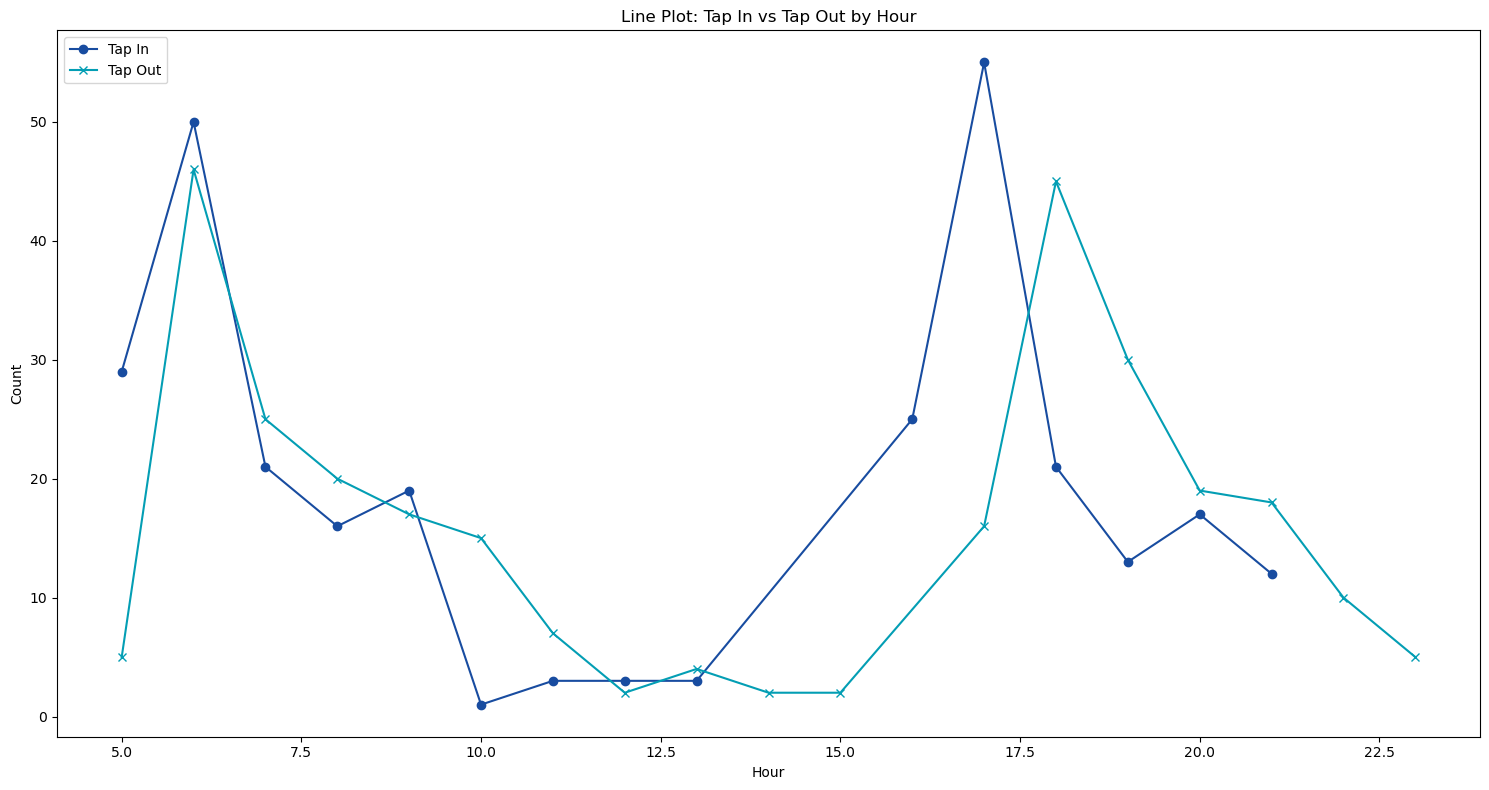

In [208]:
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour
heatmap_data = df1.pivot_table(index='tapInHour', columns='tapOutHour', aggfunc='size', fill_value=0)

tapIn_sum = heatmap_data.sum(axis=1)  
tapOut_sum = heatmap_data.sum(axis=0)  

plt.figure(figsize=(15, 8))

plt.plot(tapIn_sum.index, tapIn_sum, label='Tap In', color='#184ca0', marker='o')
plt.plot(tapOut_sum.index, tapOut_sum, label='Tap Out', color='#039eb4', marker='x')

plt.title('Line Plot: Tap In vs Tap Out by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


The hourly tap-in and tap-out distributions reveal interesting patterns in Corridor 1 usage. The sixth hour (from 06:00 to 06:59) has the highest number of tap-ins and tap-outs, indicating that user activity is at its peak during the early morning rush. On the other hand, the lowest number of tap-ins are observed during the tenth hour (from 10:00 to 10:59), indicating a drop in usage during mid-morning.

Tap-outs occur infrequently during the 12th, 14th, and 15th hours (from 12:00 to 12:59, 14:00 to 14:59, and 15:00 to 15:59), indicating a lull in user activity during those times.

To gain a better understanding of travel patterns, a heatmap will be used to visualise the distribution of tap-ins and tap-outs across different hours of the day and days of the week. This will allow for a more precise identification of peak hours and will help to optimise operational strategies based on user behaviour.


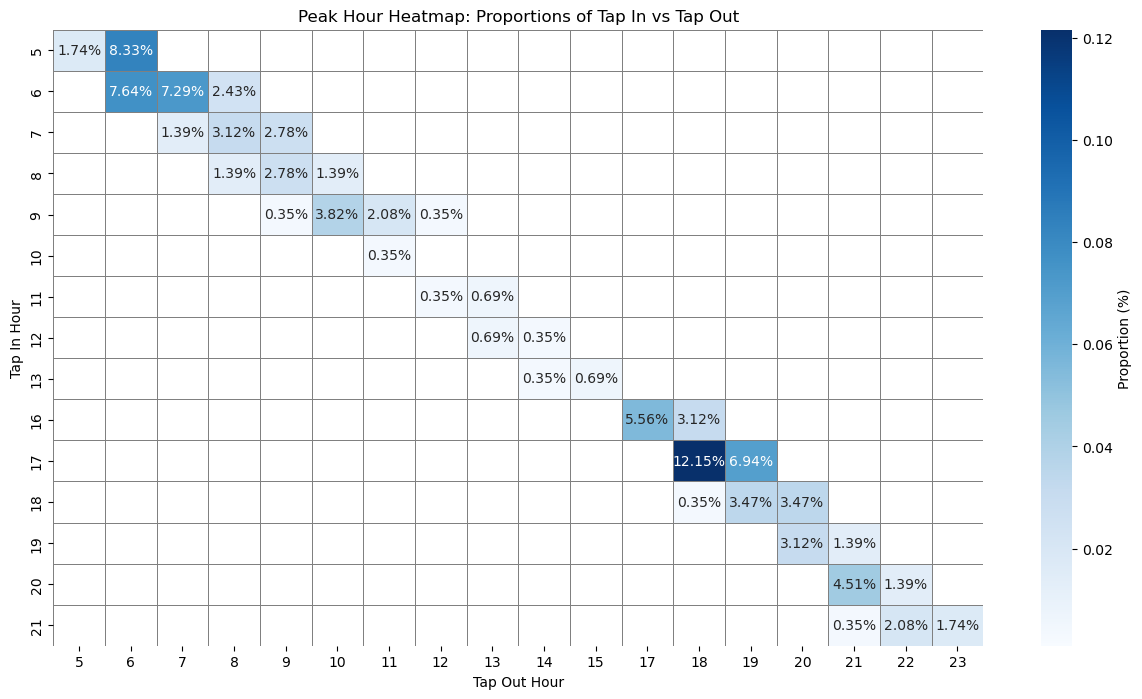

In [209]:
df1['tapInHour'] = pd.to_numeric(df1['tapInHour'], errors='coerce')
df1['tapOutHour'] = pd.to_numeric(df1['tapOutHour'], errors='coerce')
df1 = df1.sort_values(by=['tapInHour', 'tapOutHour'])

heatmap_data = df1.pivot_table(index='tapInHour', columns='tapOutHour', aggfunc='size', fill_value=0)
heatmap_data_normalized = heatmap_data / heatmap_data.sum().sum()  # Normalize to proportions
heatmap_data_normalized = heatmap_data_normalized.sort_index(axis=0)

cmap = sns.color_palette("Blues", as_cmap=True)
cmap.set_under('white')  

annotations = heatmap_data_normalized.applymap(lambda x: f"{x:.2%}" if x > 0 else '')

plt.figure(figsize=(15, 8))
sns.heatmap(
    heatmap_data_normalized,
    annot=annotations,  
    fmt='',  
    cmap=cmap,
    cbar_kws={'label': 'Proportion (%)'},
    linewidths=0.5,  
    linecolor='gray',  
    vmin=0.001  
)
plt.title('Peak Hour Heatmap: Proportions of Tap In vs Tap Out')
plt.xlabel('Tap Out Hour')
plt.ylabel('Tap In Hour')
plt.show()


The analysis of tap-in and tap-out patterns identifies Corridor 1's peak hours, with high user activity during the morning and evening rush hours. Peak activity is clearly visible during the sixth hour (06:00 - 06:59) and the seventeenth hour (17:00 - 17:59), which are the busiest times of the day for Transjakarta users.

This pattern shows two distinct travel periods.

- Morning (05:00 - 10:00): Tap-in activity peaks at the sixth hour (06:00 - 06:59), then gradually declines towards the tenth hour. This is similar to the morning commute for work or school, where users typically travel early in the day to reach their destinations.
- Evening (16:00 - 21:00): Tap-out activity resumes in the 16th hour (16:00 - 16:59) and peaks in the 17th hour (17:00 - 17:59), maintaining a relatively high intensity until the 21st hour (21:00 - 21:59). This time period is typical of people returning home from work or participating in evening activities.

#### **Summary**

- **Total Users**: Corridor 1 had 288 users over the course of one month.
- **Demographics**: The vast majority of users are male, with the majority falling into the adult age group, demonstrating the productive age group's dominance in using this corridor.
- **Stop Density**: Olimo is the busiest stop in terms of passenger density, but it is not located near an MRT station. However, four of the top five busiest stops are located near MRT stations, indicating a significant overlap between Transjakarta and MRT routes.
- **Peak Tap In Time**: The highest number of tap-ins occurred between 5:00 and 6:00 a.m., indicating morning commuters heading to work or school.
- **Peak Tap-out Time**: The highest number of tap-outs occurred between 5:00 and 6:00 p.m., when evening commuters returned home.
- **Heatmap Insights**: The busiest times are between 5:00 AM and 9:00 AM in the morning and 5:00 PM to 9:00 PM in the evening, indicating clear peak hours for both morning and evening commutes.
- **Revenue**: Corridor 1 generated a total revenue of Rp1,008,000.


### **6.2 - Scenario 1: What Will Happen if we GET RID of Corridor 1?**

If Corridor 1 is completely removed, we may experience losses in terms of both user numbers and revenue. Based on the available data, here are the potential effects:

**Customer Loss:** 
- Corridor 1 will be removed, leaving 288 users without access to this route. This has a direct impact on the number of users who previously used this route for mobility. 

**Revenee Lost:** 
- The potential revenue loss is estimated at IDR 1,008,000. This figure represents Corridor 1's total revenue in one month, taking into account the number of users and fares charged.

In the following section, the analysis will focus on the potential impact of these losses in terms of users and revenue, as well as mitigation strategies that could be implemented to retain a significant portion of the users and revenue lost as a result of Corridor 1 removal.

#### **6.2.1 Pessimistic Assumption: Customer don't use other Corridor**

In [210]:
df_simulDelete_cor1 = df[df["corridorID"] == "1"]
df_simulDelete_nonCor1 = df[df["corridorID"] != "1"]

# Cor 1
cor1_cust = len(df_simulDelete_cor1)
cust_loss_del1 = len(df_simulDelete_cor1)
lost_revenue_del1 = df_simulDelete_cor1["payAmount"].sum()

# BRT
nonCor1_brtTotalCust_del1 = len(df_simulDelete_nonCor1)
nonCor1_brtTotalRevenue_del1 = (df_simulDelete_nonCor1["payAmount"].sum())


##### **How does corridor 1 contribute to BRT service type?**

Text(0.5, 1.0, 'Proportion of Corridor 1 vs Other Corridor revenue\n(BRT Service Only)')

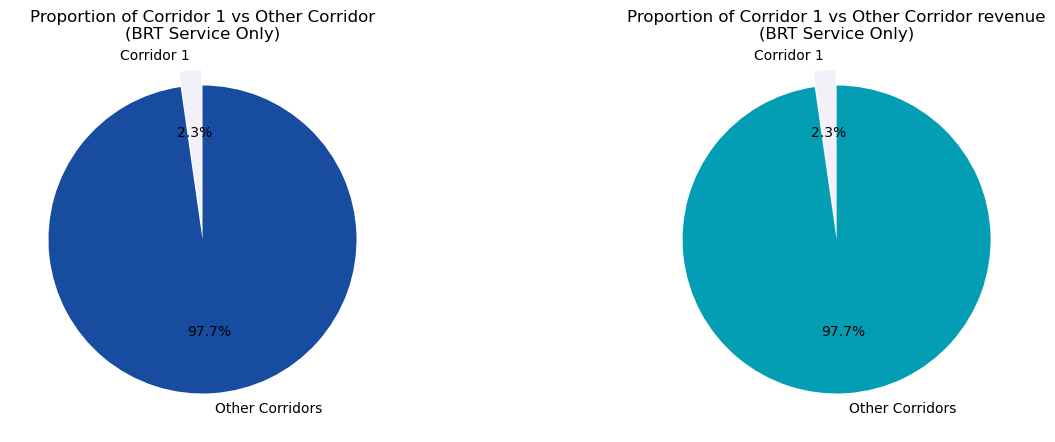

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

# passenger count
count_data = [cust_loss_del1 , nonCor1_brtTotalCust_del1 ]
labels = ["Corridor 1", "Other Corridors"]

axes[0].pie(count_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#184ca0'], startangle=90, explode=(0.1, 0))
axes[0].set_title('Proportion of Corridor 1 vs Other Corridor\n(BRT Service Only)')

# pay Amount
pay_data = [lost_revenue_del1, nonCor1_brtTotalRevenue_del1]
labels = ["Corridor 1", "Other Corridors"]

axes[1].pie(pay_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#039eb4'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Proportion of Corridor 1 vs Other Corridor revenue\n(BRT Service Only)')


Corridor 1's removal could have a significant impact on the number of users and revenue generated by the BRT service. Specifically, according to the current data:

- Corridor 1 accounts for **2.3% of the total BRT users in Transjakarta**. If this corridor is closed, approximately 2.3% of total BRT users will be lost. This may have a significant impact on passenger volume, particularly during peak hours when demand is highest.

- The BRT service could **lose around 2.3% of its revenue**. This demonstrates Corridor 1's significant financial contribution to the overall revenue of the BRT operations.

In [212]:
brt_count = pd.DataFrame(df["corridorID"].value_counts())
brt_count = brt_count.reset_index()
brt_count.columns = ['corridorID', 'count']

payAmount_sum = df[df["serviceType"] == "BRT"].groupby("corridorID")["payAmount"].sum().reset_index()
payAmount_sum.columns = ['corridorID', 'payAmount_sum']

brt_count = brt_count.merge(payAmount_sum, on="corridorID", how="left")

brt_count["percentage"] = round(brt_count["count"] / brt_count["count"].sum(), 2)

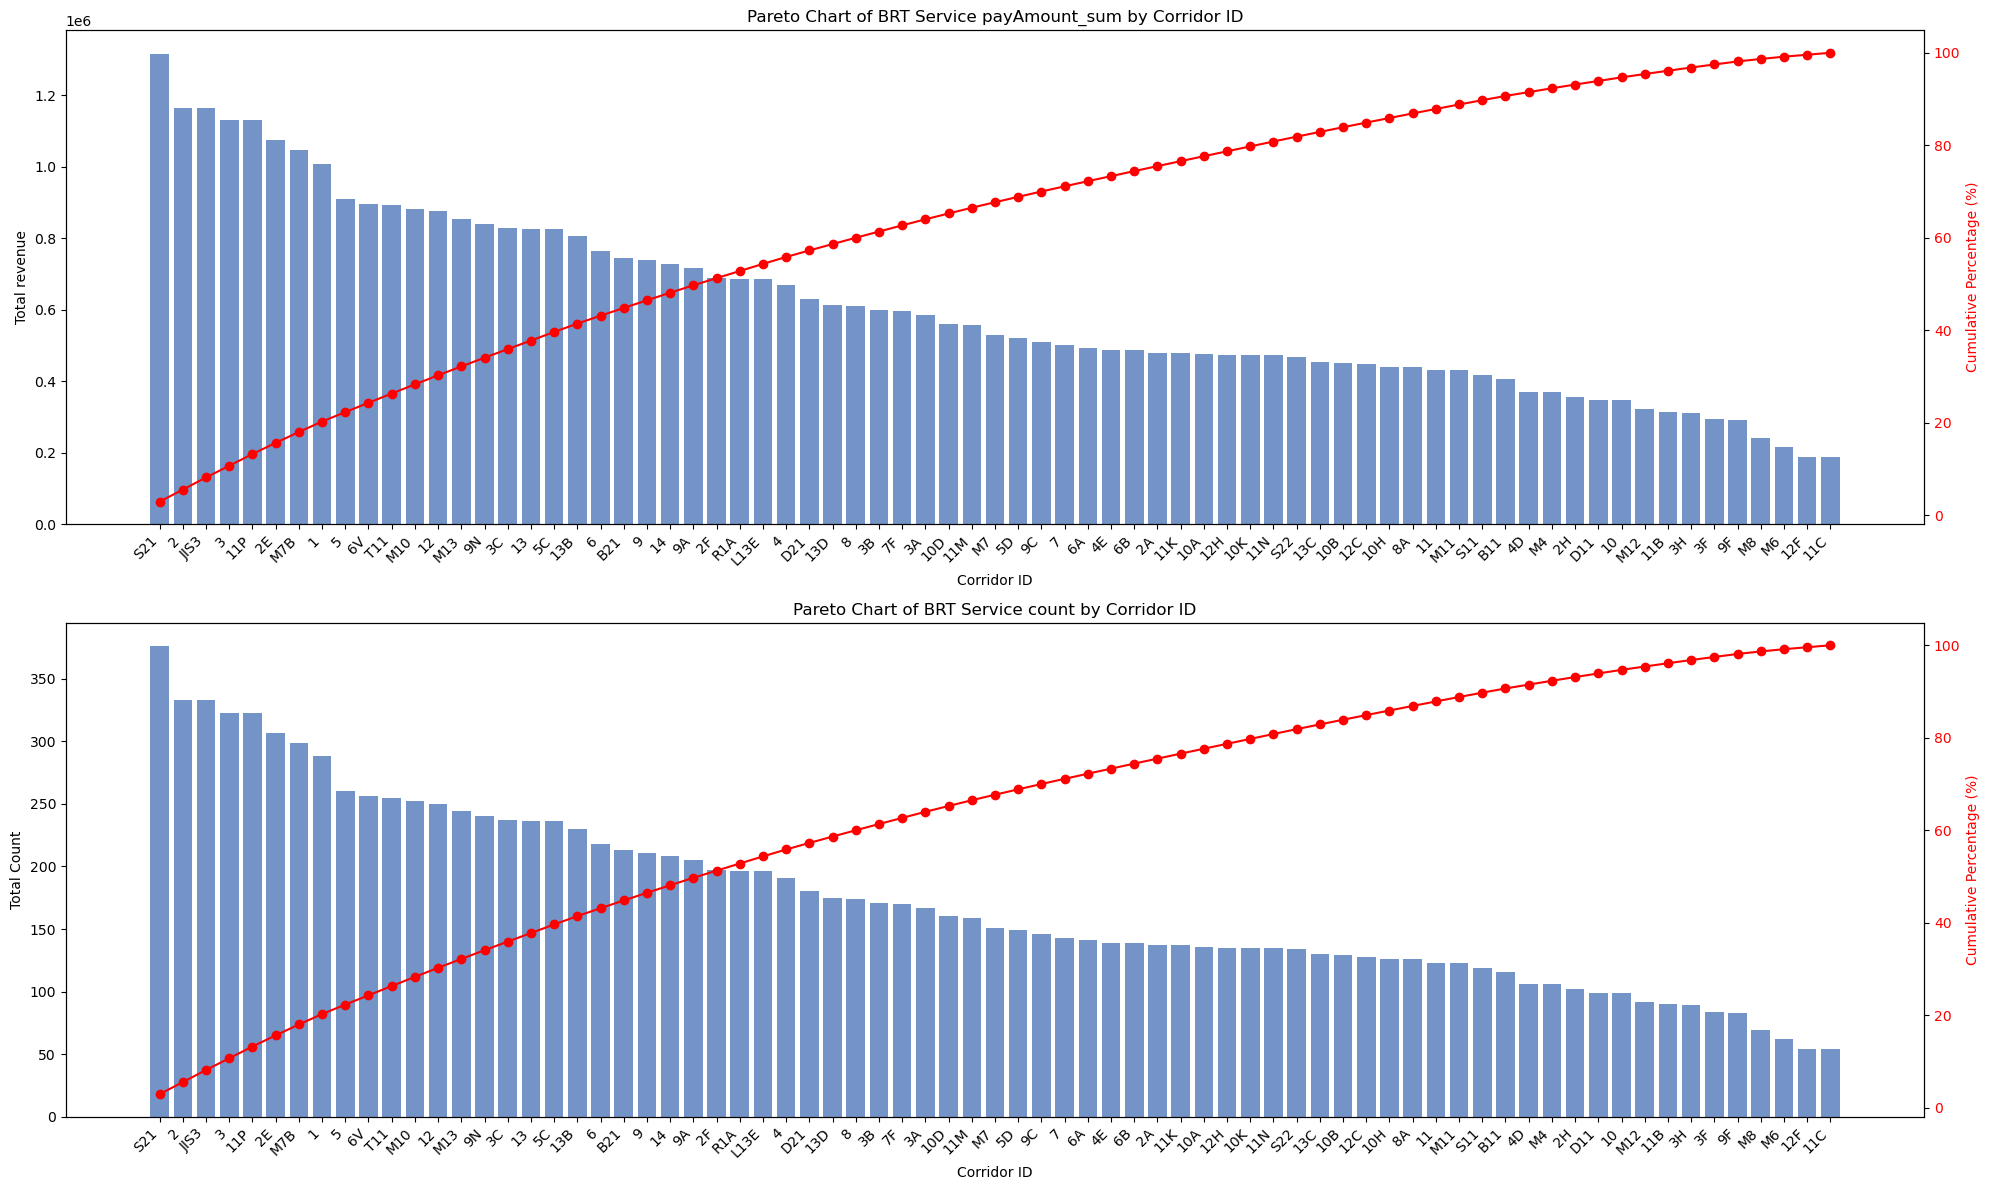

In [213]:
data_list = [('payAmount_sum', 'Total revenue', 'revenue by Corridor ID'), ('count', 'Total Count', 'Count by Corridor ID')]

fig, axes = plt.subplots(2, 1, figsize=(20, 12))

for i, (col_name, label, title) in enumerate(data_list):
    brt_count['cumulative_sum'] = brt_count[col_name].cumsum()
    brt_count['cumulative_percentage'] = 100 * brt_count['cumulative_sum'] / brt_count[col_name].sum()

    ax1 = axes[i]
    ax1.bar(brt_count['corridorID'], brt_count[col_name], color='#184ca0', alpha=0.6, label=label)
    ax1.set_xlabel('Corridor ID')
    ax1.set_ylabel(label)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(brt_count['corridorID'], brt_count['cumulative_percentage'], color='r', marker='o', label='Cumulative Percentage')
    ax2.set_ylabel('Cumulative Percentage (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    ax1.set_title(f'Pareto Chart of BRT Service {col_name} by Corridor ID')

plt.tight_layout()
plt.show()


Although Corridor 1's contribution to both the number of users and revenue appears to be small, at around 2.3%, it is important to note that Corridor 1 supports 80% of the BRT service's total users and revenue. This shows that, despite its small share, Corridor 1 has a significant impact on the overall performance of the system.

Corridor 1 is critical to the BRT service's ability to retain a significant portion of its user base and revenue. In other words, the removal of Corridor 1, despite its contribution of only 2.3%, could result in an 80% loss of total BRT users and revenue. This highlights the critical role Corridor 1 plays in ensuring the smooth operation and long-term viability of the BRT service's revenue generation.

In [214]:
df_cor1Stops_nonCor1 = df_simulDelete_nonCor1[df_simulDelete_nonCor1["tapInStopsName"].isin(cor1Stops_mapping['stopsName']) | df_simulDelete_nonCor1["tapOutStopsName"].isin(cor1Stops_mapping['stopsName'])]
df_cor1Stops_nonCor1

cor1Stops_nonCor1_tapIn_counts = df_cor1Stops_nonCor1[df_cor1Stops_nonCor1['tapInStopsName'].isin(cor1Stops_mapping['stopsName'])]['tapInStopsName'].value_counts().reset_index()
cor1Stops_nonCor1_tapIn_counts.columns = ['stopName', 'tapInCount']

cor1Stops_nonCor1_tapOut_counts = df_cor1Stops_nonCor1[df_cor1Stops_nonCor1['tapOutStopsName'].isin(cor1Stops_mapping['stopsName'])]['tapOutStopsName'].value_counts().reset_index()
cor1Stops_nonCor1_tapOut_counts.columns = ['stopName', 'tapOutCount']


cor1Stops_nonCor1_stopsCounts = pd.merge(cor1Stops_nonCor1_tapIn_counts, cor1Stops_nonCor1_tapOut_counts, on='stopName', how='outer')
cor1Stops_nonCor1_stopsCounts.fillna(0, inplace=True)

cor1Stops_nonCor1_stopsCounts['totalCount'] = cor1Stops_nonCor1_stopsCounts['tapInCount'] + cor1Stops_nonCor1_stopsCounts['tapOutCount']
cor1Stops_nonCor1_stopsCounts = cor1Stops_nonCor1_stopsCounts.sort_values(by="totalCount")

cor1Stops_nonCor1_stopsCounts = cor1Stops_nonCor1_stopsCounts[cor1Stops_nonCor1_stopsCounts["totalCount"] == 0]
print(f"If Corridor 1 is removed, {len(cor1Stops_nonCor1_stopsCounts)} of the stops will become idle. ")

If Corridor 1 is removed, 0 of the stops will become idle. 


##### **Summary**
If Corridor 1 is completely removed, and users do not switch to other corridors, the consequences will be:

- Corridor 1 accounts for 2.3% of BRT's users and revenue, implying that the network could lose 2.3% of its users and revenue.
- Despite its small contribution, Corridor 1 accounts for 80% of total BRT users and revenue, making it critical to the smooth operation and revenue of the BRT service.
- There will be no idle stops.

#### **6.2.2 Optimistic Assumption: Customer uses other Corridor**

Next is if Corridor 1 is removed, we assume that some of the users will shift to other corridors, if the stops they previously used are served by other corridors.

##### **Identify Other Corridor Stops**

In [215]:
df_simulDelete_cor1 = df[df["corridorID"] == "1"]
df_simulDelete_nonCor1 = df[df["corridorID"] != "1"]

In [216]:
corridors = {corridor: df[df["corridorID"] == corridor] for corridor in df["corridorID"].unique()}
cor1 = corridors.pop("1")  # Ambil khusus Corridor 1 dan keluarkan dari dictionary

corridor_stops = {corridor: set(data[["tapInStopsName", "tapOutStopsName"]].values.flatten()) for corridor, data in corridors.items()}
switchable_customers = {}

for _, customer_row in cor1.iterrows():
    trans_id = customer_row["transID"]
    tap_in = customer_row["tapInStopsName"]
    tap_out = customer_row["tapOutStopsName"]
    
    # Cari koridor yang memiliki stasiun tap-in dan tap-out pelanggan
    switchable_to = [
        corridor for corridor, stops in corridor_stops.items()
        if tap_in in stops and tap_out in stops
    ]

    # Jika pelanggan bisa switch, tambahkan ke hasil
    if switchable_to:
        switchable_customers[trans_id] = {
            "tap_in": tap_in,
            "tap_out": tap_out,
            "switchable_corridors": switchable_to,
        }

switchable_customers_df = pd.DataFrame([
    {"CustomerID": trans_id, "TapIn": details["tap_in"], "TapOut": details["tap_out"], "Corridors": details["switchable_corridors"]}
    for trans_id, details in switchable_customers.items()
])

display(switchable_customers_df)

CustomerID            TapIn      TapOut Corridors
0    UMNC719B6F52LL  Bendungan Hilir       Monas      [M7]
1    HCUL755D8E37PW       MH Thamrin      Tosari  [M7, 6B]
2    TWAL429E4Y84TH  Bendungan Hilir       Monas      [M7]
3    CPJC130J2Y55QD       MH Thamrin      Tosari  [M7, 6B]
4    OCAB838X5O57DA  Bendungan Hilir       Monas      [M7]
..              ...              ...         ...       ...
100  GQPC770Y8I60YR       MH Thamrin  Dukuh Atas  [M7, 6B]
101  VXYW985L5E02XN       MH Thamrin  Dukuh Atas  [M7, 6B]
102  SODZ633N0P05RU       MH Thamrin  Dukuh Atas  [M7, 6B]
103  QOIM881F5F27ZG       MH Thamrin  Dukuh Atas  [M7, 6B]
104  BAVS735H1H56XL       MH Thamrin  Dukuh Atas  [M7, 6B]

[105 rows x 4 columns]

In [217]:
switchable_customers_df.columns = ["transID", "tapInStopsName", "tapOutStopsName", "corridorID"]

In [218]:
switchable_customers_df = df[df["transID"].isin(switchable_customers_df["transID"])]

##### **BRT revenue & Customer Loss**

In [219]:
switch_cust = len(switchable_customers_df)
revenue_switch = switch_cust*3500

print(f"If Corridor 1 is entirely removed, and assuming that 100% of its users will migrate to other corridors that pass through their respective stops, \n{switch_cust} customers from Corridor 1 would be able to continue their journeys on other available corridors.")

# Cor 1
cust_loss_del2 = cor1_cust-switch_cust
lost_revenue_del2 = cust_loss_del2*3500

# BRT
nonCor1_brtTotalCust_del2 = nonCor1_brtTotalCust_del1+switch_cust
nonCor1_brtTotalrevenue_del2 = nonCor1_brtTotalRevenue_del1+revenue_switch

If Corridor 1 is entirely removed, and assuming that 100% of its users will migrate to other corridors that pass through their respective stops, 
105 customers from Corridor 1 would be able to continue their journeys on other available corridors.


In [220]:
switch_cust_details = df1[df1["transID"].isin(switchable_customers_df["transID"])]


Text(0.5, 1.0, 'Shifting revenue from Cor 1 vs Non Shifting revenue\n(Out of All BRT Service)\n')

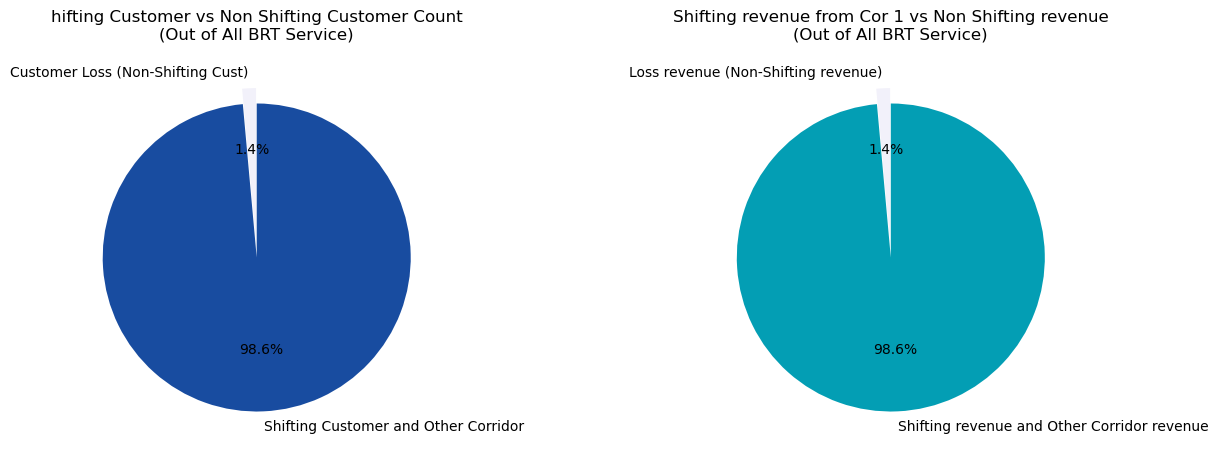

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

# passenger count
count_data = [cust_loss_del2, nonCor1_brtTotalCust_del2]
labels = ["Customer Loss (Non-Shifting Cust)", "Shifting Customer and Other Corridor"]

axes[0].pie(count_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#184ca0'], startangle=90, explode=(0.1, 0))
axes[0].set_title('hifting Customer vs Non Shifting Customer Count\n(Out of All BRT Service)\n')

# pay Amount
pay_data = [lost_revenue_del2, nonCor1_brtTotalrevenue_del2]
labels = ["Loss revenue (Non-Shifting revenue)", "Shifting revenue and Other Corridor revenue"]

axes[1].pie(pay_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#039eb4'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Shifting revenue from Cor 1 vs Non Shifting revenue\n(Out of All BRT Service)\n')


##### **6.3 Summary**

If Corridor 1 is completely removed, assuming that 100% of the users will switch to other corridors that pass through their stops, the potential impact would be:

- **Loss of 1.4% Users**
- **Loss of 1.4% Revenue**

This assumption suggests that even with the removal of Corridor 1, users will still be accommodated by other Transjakarta corridors, which helps mitigate the loss in both ridership and revenue. 

### **6.3 - What Will Happen if we REROUTE Corridor 1?**

In light of the planned expansion of the MRT system connecting Lebak Bulus to Kota by 2029, **the rerouting strategy for Corridor 1 focuses on removing stops that overlap with the MRT route**. This approach is designed to optimize the functionality of both transportation systems, ensuring they serve complementary rather than duplicative roles. By eliminating redundancies, the network aims to streamline passenger travel and enhance overall efficiency, allowing both Transjakarta and the MRT to better meet the needs of urban commuters.

**Overview of Corridor 1 Route Before Rerouting**

The map below illustrates the route of Corridor 1 prior to the rerouting process.

In [222]:
corridor1_route = folium.Map(location=[-6.200000, 106.820000], zoom_start=13)

# Add markers for each stop
for _, row in cor1Stops_mapping.iterrows():
    folium.Marker(
        location=[row['stopsLat'], row['stopsLon']],
        popup=row['stopsName'],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(corridor1_route)


# Display the map
corridor1_route

#### **6.3.1 Assumption 1: Overlapping Stops are Removed**

**Overview of Corridor 1 Route After Removing Overlapping Stops with MRT**

The map below illustrates the updated route for Corridor 1, where stops overlapping with the MRT line have been removed.

In [223]:
cor1Stops_nonMrt_mapping = cor1Stops_mapping[~cor1Stops_mapping['stopsName'].isin(near_mrt)] # exclude stops near mrt

corridor1_route = folium.Map(location=[-6.200000, 106.820000], zoom_start=13)

# Add markers for each stop
for _, row in cor1Stops_nonMrt_mapping.iterrows():
    folium.Marker(
        location=[row['stopsLat'], row['stopsLon']],
        popup=row['stopsName'],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(corridor1_route)


# Display the map
corridor1_route

In [224]:
df_simulReroute = df[~((df["corridorID"] == "1") & (df["tapInStopsName"].isin(near_mrt) | df["tapOutStopsName"].isin(near_mrt)))]
df_simulReroute_cor1 = df_simulReroute[df_simulReroute["corridorID"] == "1"]
df_simulReroute_nonCor1 = df_simulReroute[df_simulReroute["corridorID"] != "1"]

##### **Corridor 1 Potential Loss**

In [225]:
tapIn_mrt = df1[(df1["tapInStop_near_mrt"] == True) & (df1["tapOutStop_near_mrt"] == False)]
tapOut_mrt = df1[(df1["tapInStop_near_mrt"] == False) & (df1["tapOutStop_near_mrt"] == True)]
tapBoth_mrt = df1[(df1["tapInStop_near_mrt"] == True) & (df1["tapOutStop_near_mrt"] == True)]
tapAll_not_mrt = len(df_simulReroute_cor1)

tapMrt = tapAll_mrt.index
df2 = df.drop(index=tapMrt)
pay_df2 = df2["payAmount"].sum()
pay_allMrt = tapAll_mrt["payAmount"].sum()

# Cor 1
cor1Cust_reroute1 = len(df_simulReroute_cor1)
cust_loss_reroute1 = cor1_cust - cor1Cust_reroute1
cor1revenue_reroute1 = cor1Cust_reroute1*3500
lost_revenue_reroute1 = cust_loss_reroute1*3500

# BRT
nonCor1_brtTotalCust_reroute1 = len(df_simulReroute_nonCor1)
nonCor1_brtTotalrevenue_reroute1= df_simulReroute_nonCor1["payAmount"].sum()

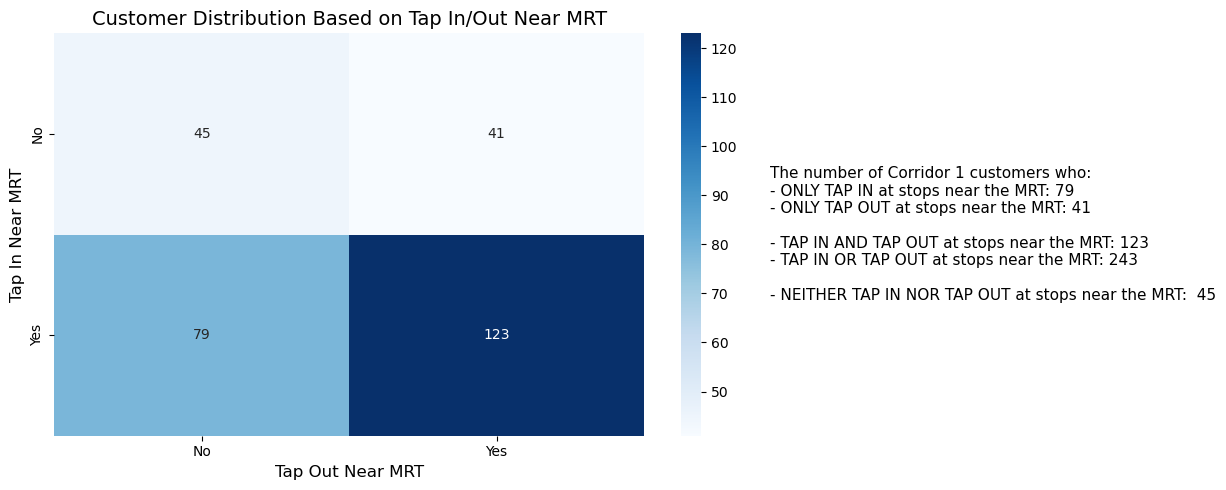

In [226]:
heatmap_data = pd.DataFrame({
    "Tap In Near MRT": ["Yes", "No", "Yes", "No"],
    "Tap Out Near MRT": ["No", "Yes", "Yes", "No"],
    "Customer Count": [
        len(tapIn_mrt),
        len(tapOut_mrt),
        len(tapBoth_mrt),
        cor1Cust_reroute1,
    ]
})

heatmap_pivot = heatmap_data.pivot(index="Tap In Near MRT", columns="Tap Out Near MRT", values="Customer Count")

fig, ax = plt.subplots(1, 2, figsize=(13,5), gridspec_kw={'width_ratios': [2, 1]})

sns.heatmap(heatmap_pivot, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax[0])
ax[0].set_title("Customer Distribution Based on Tap In/Out Near MRT", fontsize=14)
ax[0].set_xlabel("Tap Out Near MRT", fontsize=12)
ax[0].set_ylabel("Tap In Near MRT", fontsize=12)

summary_text = f"""
The number of Corridor 1 customers who:
- ONLY TAP IN at stops near the MRT: {len(tapIn_mrt)}
- ONLY TAP OUT at stops near the MRT: {len(tapOut_mrt)}

- TAP IN AND TAP OUT at stops near the MRT: {len(tapBoth_mrt)}
- TAP IN OR TAP OUT at stops near the MRT: {len(tapAll_mrt)}

- NEITHER TAP IN NOR TAP OUT at stops near the MRT:  {cor1Cust_reroute1}
"""

ax[1].axis("off")  
ax[1].text(0, 0.5, summary_text, fontsize=11, verticalalignment="center", horizontalalignment="left")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'revenue Contribution of Stops nearby MRT Station\nCorridor 1 Only')

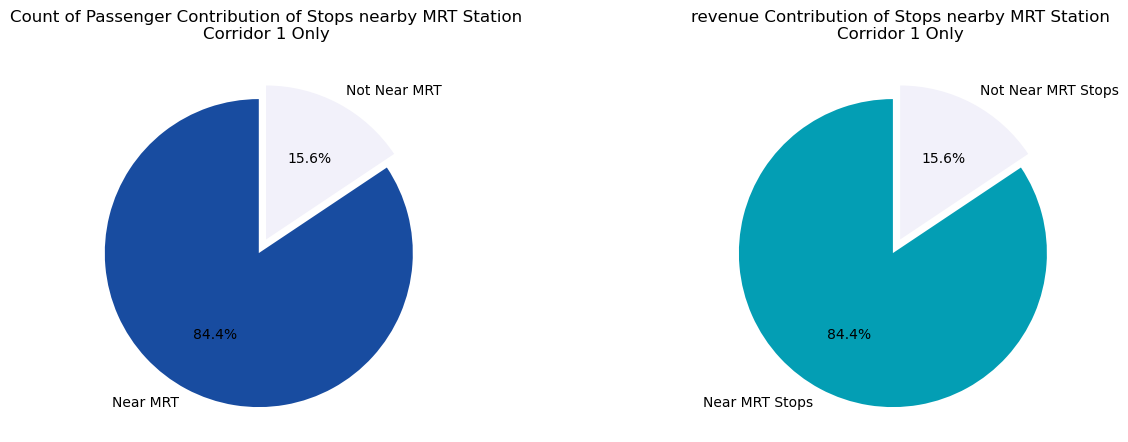

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# passenger count
sizes = [cust_loss_reroute1, cor1Cust_reroute1]
labels = ['Near MRT', 'Not Near MRT']

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#184ca0', '#f2f1fa'], startangle=90, explode=(0.1, 0))
axes[0].set_title('Count of Passenger Contribution of Stops nearby MRT Station\nCorridor 1 Only')

# pay Amount
pay_sizes = [lost_revenue_reroute1, cor1revenue_reroute1]
pay_labels = ['Near MRT Stops', 'Not Near MRT Stops']

axes[1].pie(pay_sizes, labels=pay_labels, autopct='%1.1f%%', colors=['#039eb4', '#f2f1fa'], startangle=90, explode=(0.1, 0))
axes[1].set_title('revenue Contribution of Stops nearby MRT Station\nCorridor 1 Only')


In [228]:
print(f"Revenue stops near mrt: Rp{lost_revenue_reroute1},0")
print(f"Revenue stops not near mrt: Rp{cor1revenue_reroute1},0")
print(f"Revenue total: Rp{lost_revenue_reroute1+cor1revenue_reroute1},0")

Revenue stops near mrt: Rp850500,0
Revenue stops not near mrt: Rp157500,0
Revenue total: Rp1008000,0


**Summary**

Assuming that stops near the MRT line are removed or bypassed, and that users of these MRT-adjacent stops do not switch to other stops, the potential loss of users and revenue is significant, as detailed below:

- **84.4% of Corridor 1 users** (243 in total) tap in or out at MRT stops.
- Corridor 1 generates **84.4% of its revenue from users at MRT-adjacent stops**.
- **Only 45 users (15.6%) are unaffected** by the removal of MRT-adjacent stops, implying that a small proportion of customers will continue to be served without those stops.


##### **How will corridor 1 contribute to BRT service type?**

Text(0.5, 1.0, 'Stops Near MRT revenue Contribution (BRT Only)')

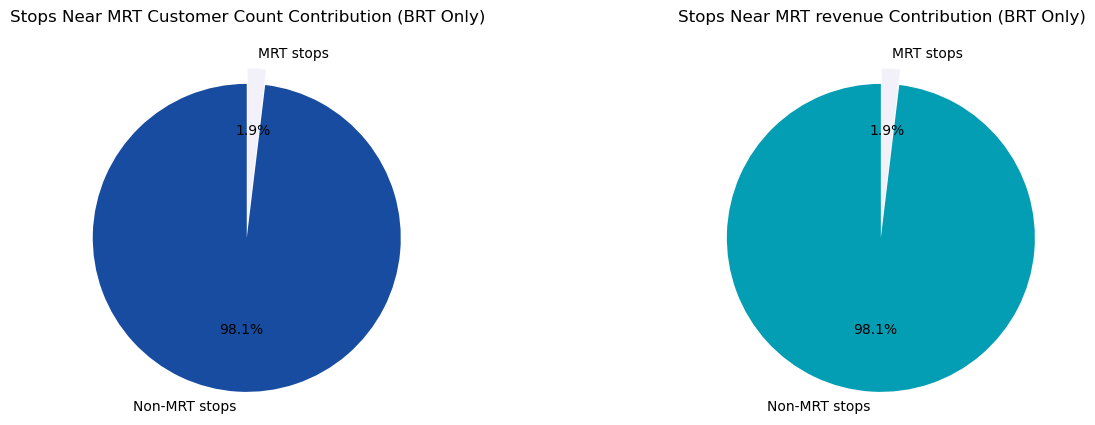

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# passenger count after
sizes = [nonCor1_brtTotalCust_reroute1+cor1Cust_reroute1, cust_loss_reroute1]
labels = ['Non-MRT stops', 'MRT stops']

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#184ca0', '#f2f1fa'], startangle=90, explode=(0.1, 0))
axes[0].set_title('Stops Near MRT Customer Count Contribution (BRT Only)')

# pay Amount
pay_sizes = [nonCor1_brtTotalrevenue_reroute1+cor1revenue_reroute1, lost_revenue_reroute1]
pay_labels = ['Non-MRT stops', 'MRT stops']

axes[1].pie(pay_sizes, labels=pay_labels, autopct='%1.1f%%', colors=['#039eb4', '#f2f1fa'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Stops Near MRT revenue Contribution (BRT Only)')


If the stops near the MRT on Corridor 1 are removed or bypassed, and users who tap in or tap out at these stops do not switch to other stops, the potential impact is:

- Transjakarta's BRT service saw a 1.9% decrease in total users.
- A 1.9% loss in total BRT revenue from the service's overall earnings.

In [230]:
brt_nonMrt_count = df_simulReroute["corridorID"].value_counts()

brt_nonMrt_count = brt_nonMrt_count.reset_index()
brt_nonMrt_count.columns = ['corridorID', 'count']
brt_nonMrt_count

payAmount_sum = df_simulReroute.groupby('corridorID')['payAmount'].sum().reset_index()
payAmount_sum.columns = ['corridorID', 'payAmount_sum']

brt_nonMrt_count = brt_nonMrt_count.merge(payAmount_sum, on="corridorID", how="left")
brt_nonMrt_count["percentage"] = round(brt_nonMrt_count["count"] / brt_nonMrt_count["count"].sum(), 2)

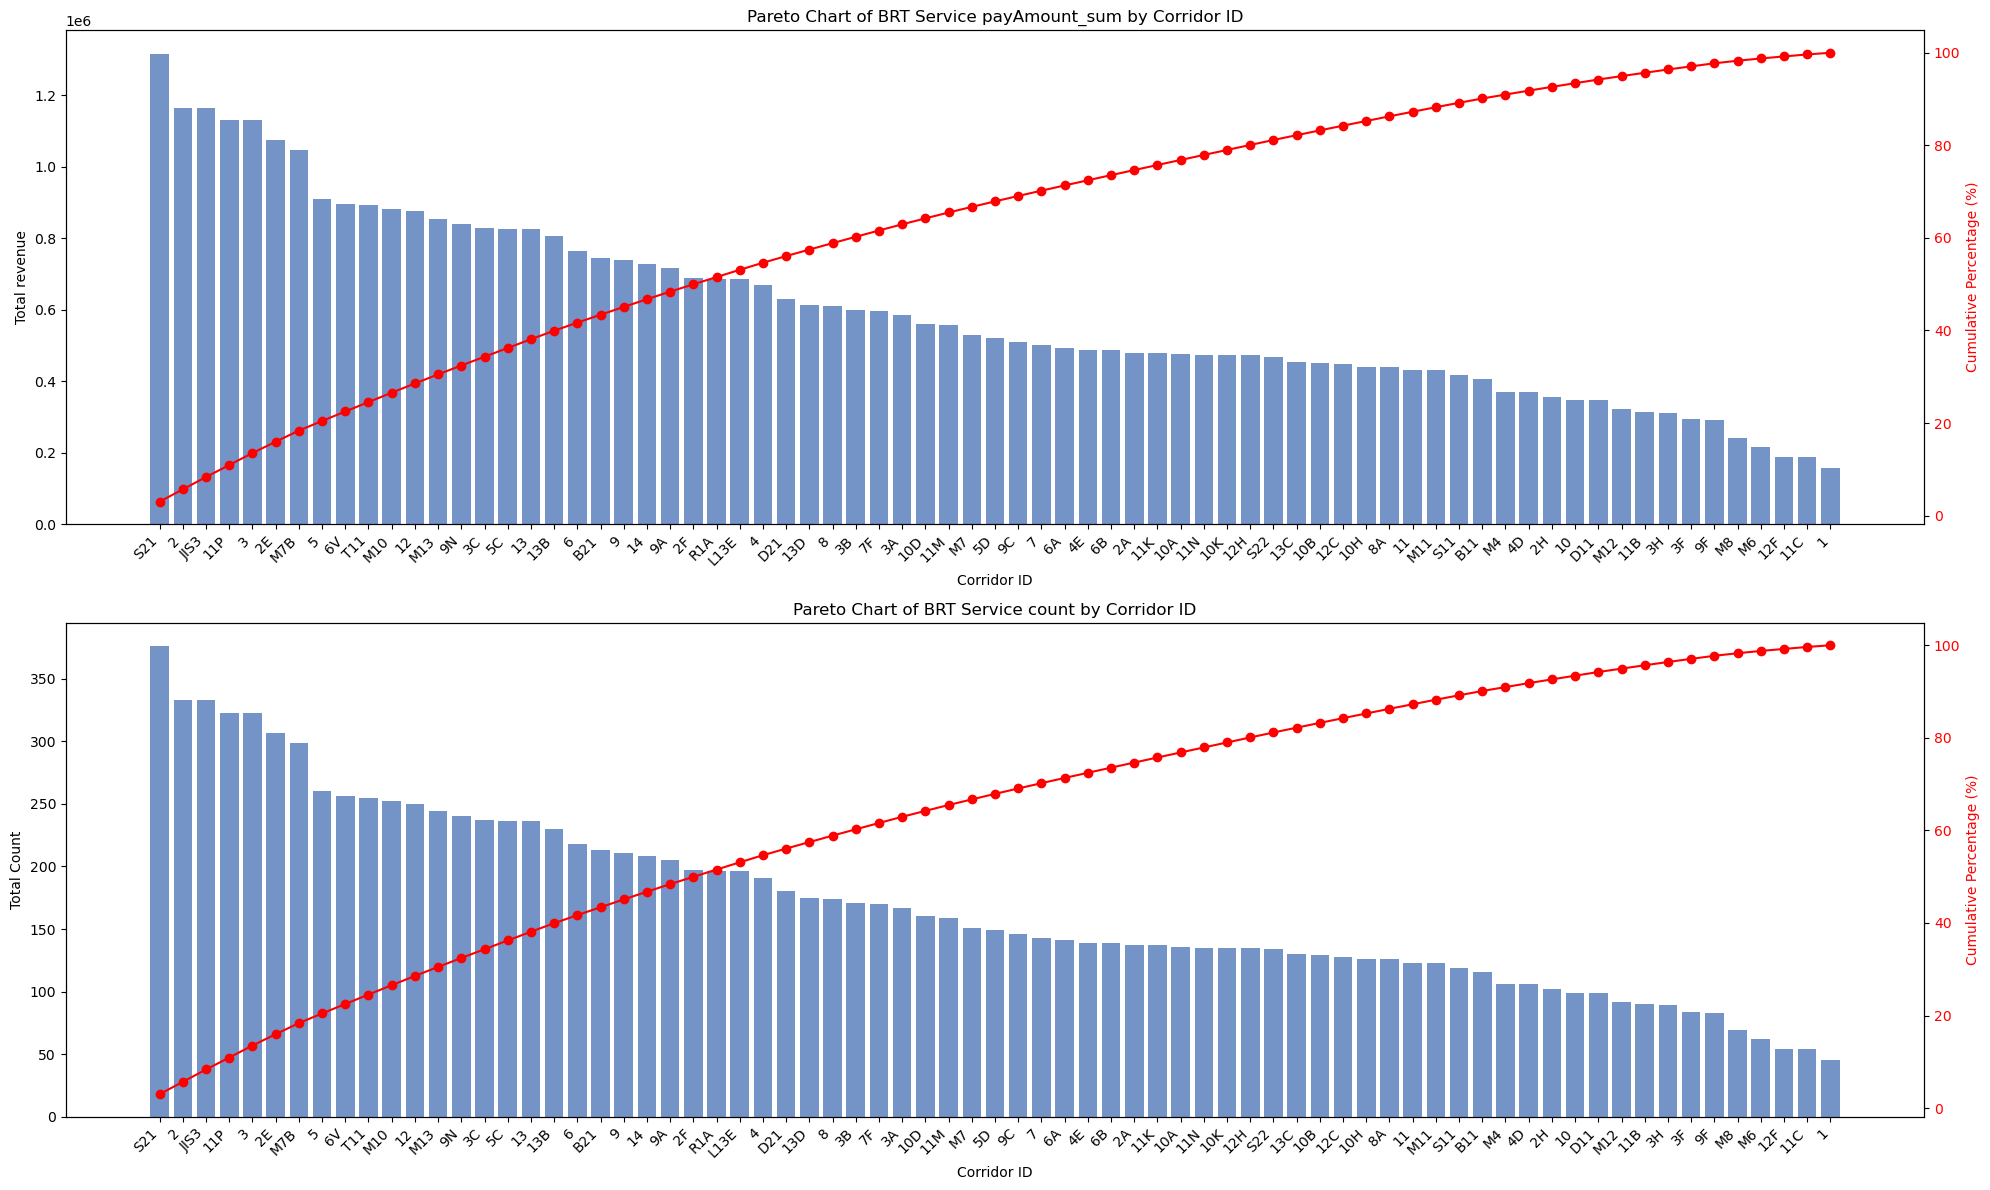

In [231]:
data_list = [('payAmount_sum', 'Total revenue', 'revenue by Corridor ID'), ('count', 'Total Count', 'Count by Corridor ID')]

fig, axes = plt.subplots(2, 1, figsize=(20, 12))

for i, (col_name, label, title) in enumerate(data_list):
    brt_nonMrt_count['cumulative_sum'] = brt_nonMrt_count[col_name].cumsum()
    brt_nonMrt_count['cumulative_percentage'] = 100 * brt_nonMrt_count['cumulative_sum'] / brt_nonMrt_count[col_name].sum()

    ax1 = axes[i]
    ax1.bar(brt_nonMrt_count['corridorID'], brt_nonMrt_count[col_name], color='#184ca0', alpha=0.6, label=label)
    ax1.set_xlabel('Corridor ID')
    ax1.set_ylabel(label)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.plot(brt_nonMrt_count['corridorID'], brt_nonMrt_count['cumulative_percentage'], color='r', marker='o', label='Cumulative Percentage')
    ax2.set_ylabel('Cumulative Percentage (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    ax1.set_title(f'Pareto Chart of BRT Service {col_name} by Corridor ID')

plt.tight_layout()
plt.show()


If the stops near the MRT are removed, Corridor 1's position in the Pareto analysis will shift dramatically. Currently, Corridor 1 accounts for 80% of BRT users and revenue. However, once these stops are removed, Corridor 1 will most likely fall to the bottom of the Pareto chart, indicating a significant decrease in its contribution to total number of users and revenue.

The 80% distribution of BRT, which is currently concentrated across approximately 49 corridors, will change, most likely expanding to include around 50 corridors. This shift demonstrates that, while Corridor 1 continues to contribute to user volume and revenue, the removal of stops near the MRT will shift the focus, affecting service allocation and overall income.

##### **Summary**

If the stops near the MRT on Corridor 1 are removed and users do not transfer to other stops, the potential consequences are as follows:

- **BRT will lose 1.9% of its total users and revenue**.
- **Corridor 1's position in the Pareto analysis will change**, from a significant contributor to the 80% distribution of BRT users and revenue to the bottom, with a smaller contribution to overall user numbers and income.
- **The 80% distribution of BRT users and revenue**, which was previously concentrated across approximately 49 corridors, **will be expanded to include around 50 corridors**, affecting overall allocation and distribution, with implications for service operations and revenue.

#### **6.3.2 Assumption 2: Filling/relocating Overlapping MRT Stops to the Nearest Stop**

##### List of stops near Corridor 1

Before analysing the assumption of relocating Corridor 1 stops that overlap with the MRT to the nearest stops on other corridors, the first step is to compile a list of alternate stops. This list includes stops on other corridors that are less than one kilometre from the stops to be removed. Identifying these alternatives is critical to ensuring the most efficient relocation options while maintaining maximum accessibility for users.

In [232]:
brtTapInStops_nonCor1 = df_simulReroute_nonCor1[["tapInStopsName", "tapInStopsLat", "tapInStopsLon"]].drop_duplicates().dropna()
brtTapInStops_nonCor1 = dict(zip(brtTapInStops_nonCor1["tapInStopsName"], zip(brtTapInStops_nonCor1["tapInStopsLat"], brtTapInStops_nonCor1["tapInStopsLon"])))

brtTapOutStops_nonCor1 = df_simulReroute_nonCor1[["tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon"]].drop_duplicates().dropna()
brtTapOutStops_nonCor1 = dict(zip(brtTapOutStops_nonCor1["tapOutStopsName"], zip(brtTapOutStops_nonCor1["tapOutStopsLat"], brtTapOutStops_nonCor1["tapOutStopsLon"])))

brtStops_nonCor1 = {**brtTapInStops_nonCor1, **brtTapOutStops_nonCor1}

brtStops_nonCor1 = pd.DataFrame(brtStops_nonCor1).transpose().reset_index()
brtStops_nonCor1.columns = ["stopsName", "stopsLat", "stopsLon"]

In [233]:
def calculate_distance(station_lat, station_lon, stop_lat, stop_lon):
    return geodesic((station_lat, station_lon), (stop_lat, stop_lon)).kilometers

# Ensure brtStops_nonCor1 is a DataFrame
if isinstance(brtStops_nonCor1, dict):
    brtStops_nonCor1 = pd.DataFrame(brtStops_nonCor1)

distance_data = []

# Loop through brtStops_nonCor1
for _, stops_row in brtStops_nonCor1.iterrows():
    stops_name = stops_row['stopsName']
    stops_lat = stops_row['stopsLat']
    stops_lon = stops_row['stopsLon']
    
    # Loop through combined_mapping
    for _, combined_row in cor1Stops_mapping.iterrows():
        combined_name = combined_row['stopsName']
        combined_lat = combined_row['stopsLat']
        combined_lon = combined_row['stopsLon']
        
        # Calculate distance
        distance_km = calculate_distance(stops_lat, stops_lon, combined_lat, combined_lon)
        distance_km = round(distance_km, 2)

        distance_data.append({
            'stopsName': stops_name,
            'cor1_stops': combined_name,
            'distance_km': distance_km
        })

brtDistance_toCor1_df = pd.DataFrame(distance_data)

brtDistance_toCor1_df["closeby"] = np.where(brtDistance_toCor1_df["distance_km"] < 2, True, False)

brtDistance_toCor1_df

stopsName                 cor1_stops  \
0                            Pal Putih           Polda Metro Jaya   
1                            Pal Putih             Karet Sudirman   
2                            Pal Putih            Bendungan Hilir   
3                            Pal Putih                 MH Thamrin   
4                            Pal Putih               Masjid Agung   
...                                ...                        ...   
15724  Stasiun Jatinegara Arah Selatan                     Glodok   
15725  Stasiun Jatinegara Arah Selatan                Bundaran HI   
15726  Stasiun Jatinegara Arah Selatan           Bundaran Senayan   
15727  Stasiun Jatinegara Arah Selatan           Kali Besar Barat   
15728  Stasiun Jatinegara Arah Selatan  Bank Indonesia Arah Utara   

       distance_km  closeby  
0             5.50    False  
1             4.06    False  
2             4.80    False  
3             2.36    False  
4             7.64    False  
...            ...      ...  
15724        10.21    False  
15725         6.21    False  
15726         8.24    False  
15727        11.28    False  
15728         6.76    False  

[15729 rows x 4 columns]

##### Corridor 1 after Reroute

Next, data will be collected for stops on other corridors that are within 2 kilometres of the Corridor 1 stops near the MRT and are scheduled to be removed. Alternative nearby stops will also be taken into account when planning the new route.

This process aims to identify alternative stops that can replace the functions of the stops that will be removed, while also allowing Corridor 1 to pass through previously underserved routes.

Two stops will remain in use: **Blok M and Dukuh Atas**. Blok M will remain as the starting point for Corridor 1 and the primary connection hub between Transjakarta and other modes of transportation. Similarly, Dukuh Atas will remain due to its connection to the LRT and MRT. This decision is based on the principle of Transjakarta accessibility, which prioritises multimodal integration.

In [234]:
# add nearby mrt information
brtDistance_toCor1_df["near_mrt"] = np.where(brtDistance_toCor1_df["cor1_stops"].isin(near_mrt), True, False)
brtDistance_toCor1_df = brtDistance_toCor1_df[(~brtDistance_toCor1_df["cor1_stops"].isin(["Dukuh Atas", "Blok M"]))]

# filter only stops closeby corridor 1 stops
brtDistance_toCor1_df2 = brtDistance_toCor1_df[brtDistance_toCor1_df["closeby"] == True]
brtDistance_toCor1_df2 = brtDistance_toCor1_df2[brtDistance_toCor1_df["near_mrt"] == True]

# exclude distance > 0 -> if distance_km = 0, huge probability its the same stops
brtDistance_toCor1_df2 = brtDistance_toCor1_df2[brtDistance_toCor1_df2["distance_km"] != 0]

# filter stopsName is not the same as cor1_stops -> cor1_stops will no longer be available for corridor 1 and we want to reroute them
reroute_stops = brtDistance_toCor1_df2[~brtDistance_toCor1_df2["stopsName"].isin(brtDistance_toCor1_df2["cor1_stops"])]
reroute_options = reroute_stops[reroute_stops["stopsName"] != "CSW 1"]
reroute_options

stopsName         cor1_stops  distance_km  closeby  near_mrt
214         Tirtayasa       Masjid Agung         1.07     True      True
222         Tirtayasa    Kejaksaan Agung         1.04     True      True
223         Tirtayasa  Gelora Bung Karno         1.67     True      True
228         Tirtayasa   Bundaran Senayan         1.46     True      True
1009   Kuningan Madya     Karet Sudirman         1.16     True      True
...               ...                ...          ...      ...       ...
14214   Hotel Melawai   Bundaran Senayan         1.99     True      True
14725    Taman Ayodya       Masjid Agung         1.10     True      True
14733    Taman Ayodya    Kejaksaan Agung         0.71     True      True
15397       LPP RRI 1       Masjid Agung         1.90     True      True
15405       LPP RRI 1    Kejaksaan Agung         1.51     True      True

[129 rows x 5 columns]

In [235]:
# identify lat and lon for new stops
reroute_latLon = (df[df["tapOutStopsName"].isin(reroute_options["stopsName"])][["tapOutStopsName", "tapOutStopsLat","tapOutStopsLon"]])
reroute_latLon.columns = ["stopsName","stopsLat","stopsLon"]

# map corridor 1 to new stops
reroute_options2 = pd.merge(reroute_options, reroute_latLon, on="stopsName", how="inner")
reroute_options2 = reroute_options2.drop_duplicates(subset=['stopsName', 'cor1_stops'], keep='first')
reroute_options2 = reroute_options2[["stopsName", "cor1_stops","stopsLat", "stopsLon"]]
reroute_options2 = reroute_options2.drop_duplicates(subset="stopsName", )

In [236]:
# new corridor 1 route

reroute_latLon = pd.concat([cor1Stops_nonMrt_mapping, reroute_options2], ignore_index=True)
reroute_latLon = reroute_latLon.drop(columns=['cor1_stops'])
reroute_latLon = reroute_latLon.drop_duplicates()
reroute_latLon

stopsName  stopsLat    stopsLon
0                     Polda Metro Jaya -6.221094  106.810280
1               Sawah Besar Arah Utara -6.157418  106.818460
2                                Olimo -6.149300  106.816690
3                                Monas -6.176248  106.822860
4              Mangga Besar Arah Utara -6.153250  106.817536
5            Mangga Besar Arah Selatan -6.153943  106.817952
6                   Harmoni Arah Utara -6.162678  106.819663
7                               Glodok -6.144500  106.815450
8                     Kali Besar Barat -6.135355  106.811430
9            Bank Indonesia Arah Utara -6.182776  106.822800
10                           Tirtayasa -6.239207  106.807770
11                      Kuningan Madya -6.213410  106.830500
12                            Mayestik -6.241921  106.790770
14                          Balai Kota -6.180488  106.826460
15                          Rawa Barat -6.238947  106.816240
16                          Dukuh Atas -6.205702  106.822230
18                     Setiabudi Utara -6.209189  106.830237
19                               ASEAN -6.239889  106.798970
20              Senayan JCC Arah Timur -6.214145  106.809000
21  Gatot Subroto Jamsostek Arah Barat -6.233551  106.822080
22                      Karet Kuningan -6.216670  106.830737
23                              Velbak -6.239433  106.785520
24                        Dukuh Atas 2 -6.203276  106.823770
25              Senayan JCC Arah Barat -6.213906  106.808410
26                        GOR Sumantri -6.221618  106.832245
27                             Kwitang -6.181051  106.838660
28                         Latuharhary -6.202761  106.827710
29                           LPP RRI 2 -6.252092  106.791410
30                              Blok M -6.243312  106.801750
31                             Halimun -6.205137  106.833380
32                            Semanggi -6.221110  106.813540
33         Bank Indonesia Arah Selatan -6.184784  106.823260
34                           Antena II -6.250330  106.791630
35                        Senayan City -6.227767  106.798089
36                      Blok M Jalur 2 -6.243369  106.801880
37       Gatot Subroto LIPI Arah Barat -6.227392  106.817630
38                            Istiqlal -6.172252  106.830930
39                       Hotel Melawai -6.245857  106.799790
40                        Taman Ayodya -6.245687  106.794670
41                           LPP RRI 1 -6.252131  106.791300

In [237]:
new_corridor1_route = folium.Map(location=[-6.200000, 106.820000], zoom_start=13)

# Add markers with different colors based on the condition
for _, row in reroute_latLon.iterrows():
    color = "orange" if row['stopsName'] in reroute_options2['stopsName'].values else "blue"
    folium.Marker(
        location=[row['stopsLat'], row['stopsLon']],
        popup=row['stopsName'],
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(new_corridor1_route)

# Display the map
new_corridor1_route


Based on the location of the nearest stops, two reroute options are generated while keeping route efficiency in mind. The route options are optimised to avoid excessively detoured paths while maintaining trip quality.

##### **6.3.2.1 Reroute 1: Blok M - Kali Besar Barat (via Semanggi)**

In [238]:
stops_final = ["Blok M", "Rawa Barat", "Gatot Subroto Jamsostek Arah Barat", "Gatot Subroto LIPI Arah Barat", "Semanggi", "Senayan JCC Arah Barat", "Polda Metro Jaya", "Dukuh Atas",
               'Sawah Besar Arah Utara', 'Olimo', 'Monas', 'Mangga Besar Arah Utara', 'Mangga Besar Arah Selatan', 'Harmoni Arah Utara', 'Glodok', 'Kali Besar Barat', 'Bank Indonesia Arah Utara']
reroute_final = reroute_latLon[reroute_latLon["stopsName"].isin(stops_final)]
reroute_final = reroute_final.reset_index()
reroute_final = reroute_final.drop(columns="index")
reroute_final

stopsName  stopsLat    stopsLon
0                     Polda Metro Jaya -6.221094  106.810280
1               Sawah Besar Arah Utara -6.157418  106.818460
2                                Olimo -6.149300  106.816690
3                                Monas -6.176248  106.822860
4              Mangga Besar Arah Utara -6.153250  106.817536
5            Mangga Besar Arah Selatan -6.153943  106.817952
6                   Harmoni Arah Utara -6.162678  106.819663
7                               Glodok -6.144500  106.815450
8                     Kali Besar Barat -6.135355  106.811430
9            Bank Indonesia Arah Utara -6.182776  106.822800
10                          Rawa Barat -6.238947  106.816240
11                          Dukuh Atas -6.205702  106.822230
12  Gatot Subroto Jamsostek Arah Barat -6.233551  106.822080
13              Senayan JCC Arah Barat -6.213906  106.808410
14                              Blok M -6.243312  106.801750
15                            Semanggi -6.221110  106.813540
16       Gatot Subroto LIPI Arah Barat -6.227392  106.817630

**Overview of Corridor 1 First Reroute Options**

The map below depicts Route 1 after re-routing, with orange representing new information and blue representing old information.

In [239]:
new_corridor1_route = folium.Map(location=[-6.200000, 106.820000], zoom_start=13)

# Add markers with different colors based on the condition
for _, row in reroute_final.iterrows():
    color = "blue" if row['stopsName'] in cor1Stops_mapping['stopsName'].values else "orange"
    folium.Marker(
        location=[row['stopsLat'], row['stopsLon']],
        popup=row['stopsName'],
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(new_corridor1_route)

# Display the map
new_corridor1_route


In [240]:
switch_stops = reroute_options[reroute_options["stopsName"].isin(reroute_final["stopsName"])]
switch_stops_min_dist = switch_stops.loc[switch_stops.groupby("cor1_stops")["distance_km"].idxmin()]
switch_stops_min_dist = switch_stops_min_dist[switch_stops_min_dist["distance_km"] < 1]
switch_stops_min_dist

stopsName         cor1_stops  distance_km  closeby  \
10019                   Semanggi    Bendungan Hilir         0.48     True   
10030                   Semanggi  Gelora Bung Karno         0.92     True   
2290                  Dukuh Atas     Karet Sudirman         0.79     True   
9063                      Blok M    Kejaksaan Agung         0.48     True   
1578   Bank Indonesia Arah Utara         MH Thamrin         0.59     True   
9055                      Blok M       Masjid Agung         0.84     True   
2296                  Dukuh Atas             Tosari         0.98     True   

       near_mrt  
10019      True  
10030      True  
2290       True  
9063       True  
1578       True  
9055       True  
2296       True

In [241]:
near_mrt = set(near_mrt)
stops_changed = set(switch_stops_min_dist["cor1_stops"])
unchangedStops1 = near_mrt - stops_changed
unchangedStops1 = list(unchangedStops1)
staying_stops = ["Dukuh Atas", "Blok M", "Bundaran HI"]
unchangedStops1 = [stop for stop in unchangedStops1 if stop not in staying_stops]

print(f"The following stops are not rerouted to another stop: {unchangedStops1}")

The following stops are not rerouted to another stop: ['Bundaran Senayan']


**Potential Customer and revenue Gain and Loss**

**Potential Customer and revenue Gain**

Next, calculations will be performed to determine the potential increase or loss of passengers and revenue. This calculation is intended to assess the impact of route changes on the number of passengers served and revenue generated. The assumption is that passengers who have previously used the MRT stops will transfer to the nearest new stop within a 1-kilometer radius.

The analysis will be conducted using simulated data, with the original Corridor 1 stops that were previously connected to the MRT no longer in use. Furthermore, any removed stops will not be included in this simulation because they are no longer part of the route. Based on these assumptions, the analysis will provide insights into how route changes may affect passenger distribution and service revenue.

**Simulation Data**

In [242]:
stops_map = switch_stops_min_dist.set_index("cor1_stops")["stopsName"].to_dict()

df_simulReroute2 = df
df_simulReroute2.loc[df_simulReroute2["corridorID"] == "1", "tapInStopsName"] = df_simulReroute2.loc[df_simulReroute2["corridorID"] == "1", "tapInStopsName"].map(stops_map).fillna(df_simulReroute2["tapInStopsName"])
df_simulReroute2.loc[df_simulReroute2["corridorID"] == "1", "tapOutStopsName"] = df_simulReroute2.loc[df_simulReroute2["corridorID"] == "1", "tapOutStopsName"].map(stops_map).fillna(df_simulReroute2["tapOutStopsName"])

display(df_simulReroute2)


transID            payCardID payCardBank            payCardName  \
0      EIIW227B8L34VB      180062659848800      emoney         Bajragin Usada   
2      DJWR385V2U57TO     4996225095064169         dki          Emong Wastuti   
4      VMLO535V7F95NJ         570928206772       flazz        Embuh Mardhiyah   
11     IIEK980X1O23NZ      347204308990092      emoney  R.M. Labuh Laksmiwati   
12     OPLW560U3S06UG     3536759468239783         dki        Shakila Maryadi   
...               ...                  ...         ...                    ...   
37885  KUXY021D6I25YN       30169751274025         bni        Prasetya Wasita   
37887  UELP204M1S64QX     4068989702474318         dki         Ajimat Pradana   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi        Kamila Mahendra   
37896  YHHK837P6Y95GN     6502902290603767         dki           Titi Siregar   
37899  FMZZ963S4B68ZP         501862539795       flazz      drg. Leo Najmudin   

      payCardSex  payCardBirthDate  age  ageCategory corridorID  \
0           Male              2008   15     Teenager          5   
2         Female              1992   31        Adult        R1A   
4           Male              1982   41        Adult         12   
11        Female              1984   39        Adult        M7B   
12        Female              1988   35        Adult         9A   
...          ...               ...  ...          ...        ...   
37885       Male              1986   37        Adult         3B   
37887     Female              1980   43        Adult         4D   
37895     Female              2004   19  Young Adult         6B   
37896       Male              1974   49        Adult         9N   
37899     Female              1985   38        Adult         13   

                            corridorName  ... stopStartSeq  \
0                  Matraman Baru - Ancol  ...            7   
2                     Pantai Maju - Kota  ...           38   
4                  Tanjung Priok - Pluit  ...            5   
11                          BKN - Blok M  ...           12   
12                      PGC 2 - Grogol 2  ...            4   
...                                  ...  ...          ...   
37885       Rusun Flamboyan - Cengkareng  ...            2   
37887           Pulo Gadung 2 - Kuningan  ...            5   
37895  Ragunan - MH Thamrin via Semanggi  ...            2   
37896             Pinang Ranti - Pramuka  ...            1   
37899                  Ciledug - Tendean  ...            2   

                tapInTime        tapOutStopsName  tapOutStopsLat  \
0     2023-04-03 05:21:44                Tegalan       -6.203101   
2     2023-04-03 05:59:06  Simpang Kunir Kemukus       -6.133731   
4     2023-04-03 06:17:35       Kali Besar Barat       -6.135355   
11    2023-04-03 06:22:10       Mampang Prapatan       -6.242699   
12    2023-04-03 06:15:04               Semanggi       -6.221110   
...                   ...                    ...             ...   
37885 2023-04-08 10:46:06         BSI Cengkareng       -6.147973   
37887 2023-04-04 14:52:31            Pramuka LIA       -6.192238   
37895 2023-04-21 18:18:37                 SMK 57       -6.290967   
37896 2023-04-18 21:52:31           Pinang Ranti       -6.291075   
37899 2023-04-12 21:08:12         Kebayoran Lama       -6.238340   

       tapOutStopsLon stopEndSeq          tapOutTime payAmount  \
0           106.85715         12 2023-04-03 06:00:53    3500.0   
2           106.81475         39 2023-04-03 06:50:55    3500.0   
4           106.81143         15 2023-04-03 06:57:03    3500.0   
11          106.82572         14 2023-04-03 06:50:21    3500.0   
12          106.81354          6 2023-04-03 07:08:31    3500.0   
...               ...        ...                 ...       ...   
37885       106.72781          3 2023-04-08 13:06:42    3500.0   
37887       106.86858          9 2023-04-04 15:38:58    3500.0   
37895       106.82365         13 2023-04-21 19:55:49    3500.0   
37896       10

In [243]:
df_simulReroute2_loss = df_simulReroute2[(df_simulReroute2["corridorID"] == "1") & 
                                      ((df_simulReroute2["tapInStopsName"].isin(unchangedStops1)) | 
                                       (df_simulReroute2["tapOutStopsName"].isin(unchangedStops1)))]

df_simulReroute2 = df_simulReroute2[~((df_simulReroute2["corridorID"] == "1") & 
                                      ((df_simulReroute2["tapInStopsName"].isin(unchangedStops1)) | 
                                       (df_simulReroute2["tapOutStopsName"].isin(unchangedStops1))))]

In [244]:
df_simulReroute2_cor1 = df_simulReroute2[df_simulReroute2["corridorID"] == "1"]
df_simulReroute2_nonCor1 = df_simulReroute2[df_simulReroute2["corridorID"] != "1"]

In [245]:
df1 = df[df["corridorID"] == "1"]
df3 = df[df["corridorID"] != "1"]
df3 = df3[df3["serviceType"] == "BRT"]

newRoute_density = reroute_final[["stopsName"]]

filtered_df1 = df1[df1["tapInStopsName"].isin(newRoute_density["stopsName"])]
filtered_df3 = df3[df3["tapInStopsName"].isin(newRoute_density["stopsName"])]
newRoute_count = {}

data = {
    "before_count": [df1, df3], 
    "after_count": [df_simulReroute2_cor1, df_simulReroute2_nonCor1]
}

for i, j in data.items():
    cor1_TapInCount = j[0][j[0]["tapInStopsName"].isin(newRoute_density["stopsName"])]["tapInStopsName"].value_counts().reset_index()
    cor1_TapInCount.columns = ['stopsName', 'cor1_tapInCount']
    nonCor1TapInCount = j[1][j[1]["tapInStopsName"].isin(newRoute_density["stopsName"])]["tapInStopsName"].value_counts().reset_index()
    nonCor1TapInCount.columns = ['stopsName', 'nonCor1_tapInCount']

    cor1TapOutCount = j[0][j[0]["tapOutStopsName"].isin(newRoute_density["stopsName"])]["tapOutStopsName"].value_counts().reset_index()
    cor1TapOutCount.columns = ['stopsName', 'cor1_tapOutCount']
    nonCor1TapOutCount = j[1][j[1]["tapOutStopsName"].isin(newRoute_density["stopsName"])]["tapOutStopsName"].value_counts().reset_index()
    nonCor1TapOutCount.columns = ['stopsName', 'nonCor1_tapOutCount']
    
    newRoute_counts = pd.merge(cor1_TapInCount, nonCor1TapInCount, on='stopsName', how='outer')
    newRoute_counts = pd.merge(newRoute_counts, cor1TapOutCount, on='stopsName', how='outer')
    newRoute_counts = pd.merge(newRoute_counts, nonCor1TapOutCount, on='stopsName', how='outer')

    # display(newRoute_counts)

    newRoute_counts.fillna(0, inplace=True)

    newRoute_counts["totalCust"] = (newRoute_counts["cor1_tapInCount"] + 
                                    newRoute_counts["nonCor1_tapInCount"] + 
                                    newRoute_counts["cor1_tapOutCount"] + 
                                    newRoute_counts["nonCor1_tapOutCount"])
    newRoute_counts["totalPayAmount"] = newRoute_counts["totalCust"] * 3500

    newRoute_counts = newRoute_counts.sort_values(by="totalPayAmount", ascending=False).reset_index(drop=True)

    newRoute_count[i] = newRoute_counts
    newRoute_count[i] = pd.DataFrame(newRoute_count[i])



In [246]:
newRoute_custGain = pd.merge(newRoute_count["before_count"][["stopsName", "totalCust"]], newRoute_count["after_count"][["stopsName", "totalCust"]], on="stopsName", how="outer")
newRoute_custGain.columns = ["stopsName", "totalCust_before", "totalCust_after"]
newRoute_custGain["customerIncreaseRate"] = round(((newRoute_custGain["totalCust_after"] / newRoute_custGain["totalCust_before"]) - 1) * 100, 2)
newRoute_custGain = newRoute_custGain.sort_values(by="customerIncreaseRate", ascending=False)

newRoute_custGain.fillna(0, inplace=True)
newRoute_custGain = newRoute_custGain.reset_index(drop=True)

display(newRoute_custGain)

newRoute_revenueGain = pd.merge(newRoute_count["before_count"][["stopsName", "totalPayAmount"]], newRoute_count["after_count"][["stopsName", "totalPayAmount"]], on="stopsName", how="outer")
newRoute_revenueGain.columns = ["stopsName", "totalPayAmount_before", "totalPayAmount_after"]
newRoute_revenueGain["revenueIncreaseRate"] = round(((newRoute_revenueGain["totalPayAmount_after"] / newRoute_revenueGain["totalPayAmount_before"]) - 1) * 100, 2)
newRoute_revenueGain = newRoute_revenueGain.sort_values(by="revenueIncreaseRate", ascending=False)

newRoute_revenueGain.fillna(0, inplace=True)
newRoute_revenueGain = newRoute_revenueGain.reset_index(drop=True)

display(newRoute_revenueGain)


stopsName  totalCust_before  totalCust_after  \
0            Bank Indonesia Arah Utara             109.0            109.0   
1              Mangga Besar Arah Utara              12.0             12.0   
2                             Semanggi             148.0            148.0   
3               Sawah Besar Arah Utara              40.0             40.0   
4                           Rawa Barat             201.0            201.0   
5                     Polda Metro Jaya              38.0             38.0   
6                                Olimo              62.0             62.0   
7                                Monas             190.0            190.0   
8            Mangga Besar Arah Selatan               3.0              3.0   
9                               Blok M             119.0            119.0   
10                    Kali Besar Barat             104.0            104.0   
11                  Harmoni Arah Utara              51.0             51.0   
12                              Glodok               3.0              3.0   
13       Gatot Subroto LIPI Arah Barat              19.0             19.0   
14  Gatot Subroto Jamsostek Arah Barat              51.0             51.0   
15              Senayan JCC Arah Barat              39.0             39.0   
16                          Dukuh Atas             151.0            132.0   

    customerIncreaseRate  
0                   0.00  
1                   0.00  
2                   0.00  
3                   0.00  
4                   0.00  
5                   0.00  
6                   0.00  
7                   0.00  
8                   0.00  
9                   0.00  
10                  0.00  
11                  0.00  
12                  0.00  
13                  0.00  
14                  0.00  
15                  0.00  
16                -12.58

stopsName  totalPayAmount_before  \
0            Bank Indonesia Arah Utara               381500.0   
1              Mangga Besar Arah Utara                42000.0   
2                             Semanggi               518000.0   
3               Sawah Besar Arah Utara               140000.0   
4                           Rawa Barat               703500.0   
5                     Polda Metro Jaya               133000.0   
6                                Olimo               217000.0   
7                                Monas               665000.0   
8            Mangga Besar Arah Selatan                10500.0   
9                               Blok M               416500.0   
10                    Kali Besar Barat               364000.0   
11                  Harmoni Arah Utara               178500.0   
12                              Glodok                10500.0   
13       Gatot Subroto LIPI Arah Barat                66500.0   
14  Gatot Subroto Jamsostek Arah Barat               178500.0   
15              Senayan JCC Arah Barat               136500.0   
16                          Dukuh Atas               528500.0   

    totalPayAmount_after  revenueIncreaseRate  
0               381500.0                 0.00  
1                42000.0                 0.00  
2               518000.0                 0.00  
3               140000.0                 0.00  
4               703500.0                 0.00  
5               133000.0                 0.00  
6               217000.0                 0.00  
7               665000.0                 0.00  
8                10500.0                 0.00  
9               416500.0                 0.00  
10              364000.0                 0.00  
11              178500.0                 0.00  
12               10500.0                 0.00  
13               66500.0                 0.00  
14              178500.0                 0.00  
15              136500.0                 0.00  
16              462000.0               -12.58

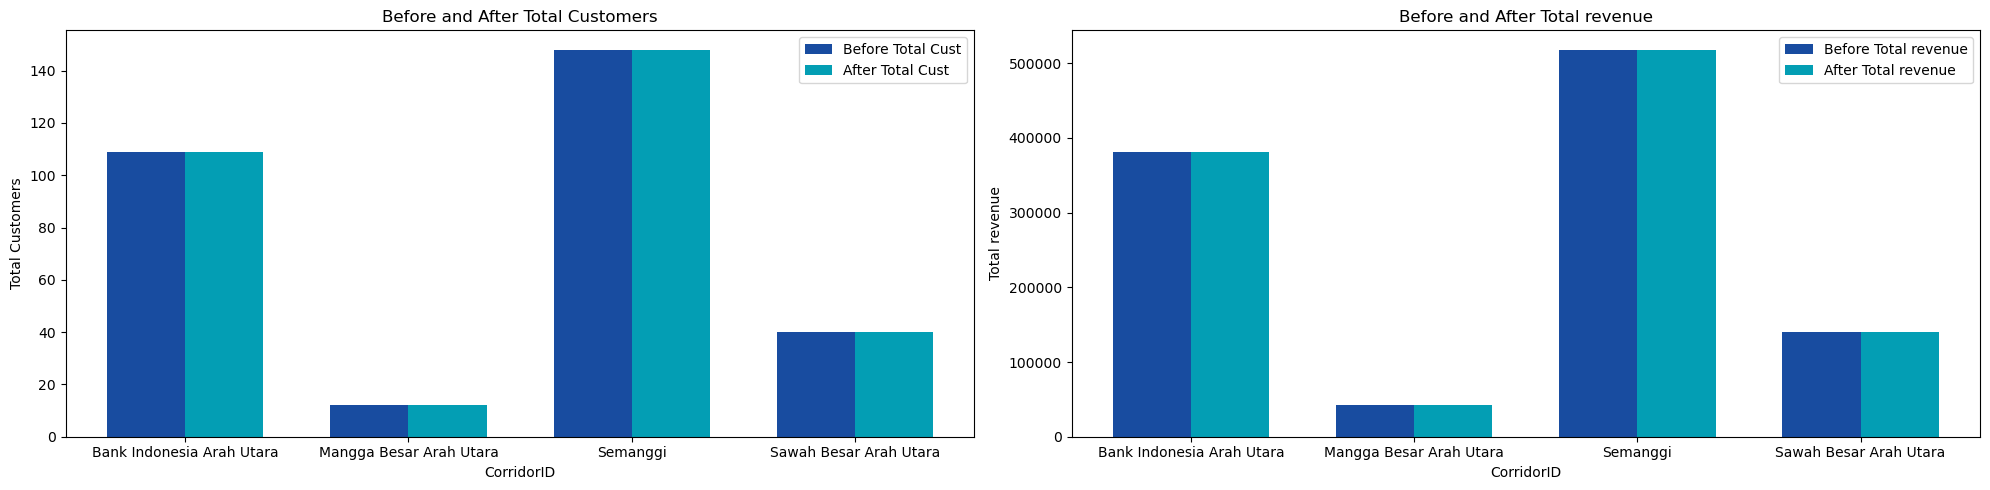

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# customer gain
top4_custGain = newRoute_custGain.head(4)
index = np.arange(len(top4_custGain))
bar_width = 0.35

axes[0].bar(index, top4_custGain["totalCust_before"], bar_width, label='Before Total Cust', color='#184ca0')
axes[0].bar([i + bar_width for i in index], top4_custGain["totalCust_after"], bar_width, label='After Total Cust', color='#039eb4')

axes[0].set_xlabel('CorridorID')
axes[0].set_ylabel('Total Customers')
axes[0].set_title('Before and After Total Customers')
axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(top4_custGain["stopsName"], rotation=0)
axes[0].legend()

# revenue gain
top4_revenueGain = newRoute_revenueGain.head(4)
index = np.arange(len(top4_revenueGain))
bar_width = 0.35

axes[1].bar(index, top4_revenueGain["totalPayAmount_before"], bar_width, label='Before Total revenue', color='#184ca0')
axes[1].bar([i + bar_width for i in index], top4_revenueGain["totalPayAmount_after"], bar_width, label='After Total revenue', color='#039eb4')

axes[1].set_xlabel('CorridorID')
axes[1].set_ylabel('Total revenue')
axes[1].set_title('Before and After Total revenue')
axes[1].set_xticks([i + bar_width / 2 for i in index])
axes[1].set_xticklabels(top4_revenueGain["stopsName"], rotation=0)
axes[1].legend()


# Display the plot
plt.tight_layout()
plt.show()


In [248]:
print("Based on the results of the simulation, the following are the three pemberhentians that experienced the greatest increase in the number of users and revenue after changing routes::\n")
penurunan_rate = []

for i in range(len(newRoute_custGain.head(4))):
    print(f'''- {newRoute_custGain["stopsName"][i]}: The number of users increased by {newRoute_custGain["customerIncreaseRate"][i]}% from {newRoute_custGain["totalCust_before"][i]} to {newRoute_custGain["totalCust_after"][i]}, with revenue increasing by {newRoute_revenueGain["revenueIncreaseRate"][i]}% from Rp{newRoute_revenueGain["totalPayAmount_before"][i]} to Rp{newRoute_revenueGain["totalPayAmount_after"][i]}''')

for i in range(len(newRoute_custGain)):
    if newRoute_custGain["customerIncreaseRate"][i] < 0:
        penurunan_rate.append(newRoute_custGain["stopsName"][i])

Based on the results of the simulation, the following are the three pemberhentians that experienced the greatest increase in the number of users and revenue after changing routes::

- Bank Indonesia Arah Utara: The number of users increased by 0.0% from 109.0 to 109.0, with revenue increasing by 0.0% from Rp381500.0 to Rp381500.0
- Mangga Besar Arah Utara: The number of users increased by 0.0% from 12.0 to 12.0, with revenue increasing by 0.0% from Rp42000.0 to Rp42000.0
- Semanggi: The number of users increased by 0.0% from 148.0 to 148.0, with revenue increasing by 0.0% from Rp518000.0 to Rp518000.0
- Sawah Besar Arah Utara: The number of users increased by 0.0% from 40.0 to 40.0, with revenue increasing by 0.0% from Rp140000.0 to Rp140000.0


**How will corridor 1 contribute to BRT service type?**

Text(0.5, 1.0, 'Proportion of Corridor 1 vs Other Corridor revenue\n(BRT Services Only)')

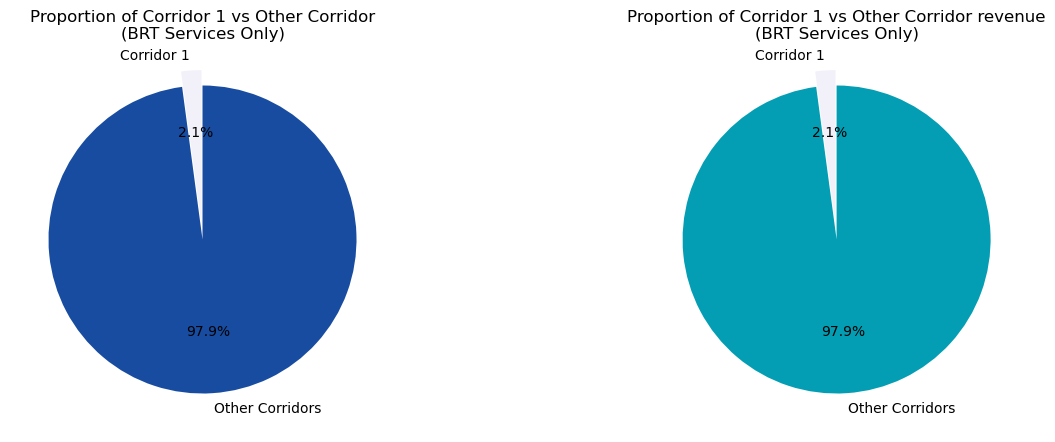

In [249]:
# Cor 1
loss_cust_reroute2 = len(df_simulReroute2_loss)
lost_revenue_reroute2 = loss_cust_reroute2*3500
cor1_cust_reroute2 = len(df_simulReroute2_cor1)
cor1_revenue_reroute2 = cor1_cust_reroute2*3500

# BRT
nonCor1Cust_brtReroute2 = len(df_simulReroute2_nonCor1)
nonCor1Income_brtReroute2 = df_simulReroute2_nonCor1["payAmount"].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

# passenger count
count_data = [cor1_cust_reroute2, nonCor1Cust_brtReroute2]
labels = ["Corridor 1", "Other Corridors"]

axes[0].pie(count_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#184ca0'], startangle=90, explode=(0.1, 0))
axes[0].set_title('Proportion of Corridor 1 vs Other Corridor\n(BRT Services Only)')

# pay Amount
pay_data = [cor1_revenue_reroute2, nonCor1Income_brtReroute2]
labels = ["Corridor 1", "Other Corridors"]

axes[1].pie(pay_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#039eb4'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Proportion of Corridor 1 vs Other Corridor revenue\n(BRT Services Only)')



In [250]:
brt_count = pd.DataFrame(df_simulReroute2["corridorID"].value_counts())
brt_count = brt_count.reset_index()
brt_count.columns = ['corridorID', 'count']

payAmount_sum = df[df["serviceType"] == "BRT"].groupby("corridorID")["payAmount"].sum().reset_index()
payAmount_sum.columns = ['corridorID', 'payAmount_sum']

brt_count = brt_count.merge(payAmount_sum, on="corridorID", how="left")

brt_count["percentage"] = round(brt_count["count"] / brt_count["count"].sum(), 2)

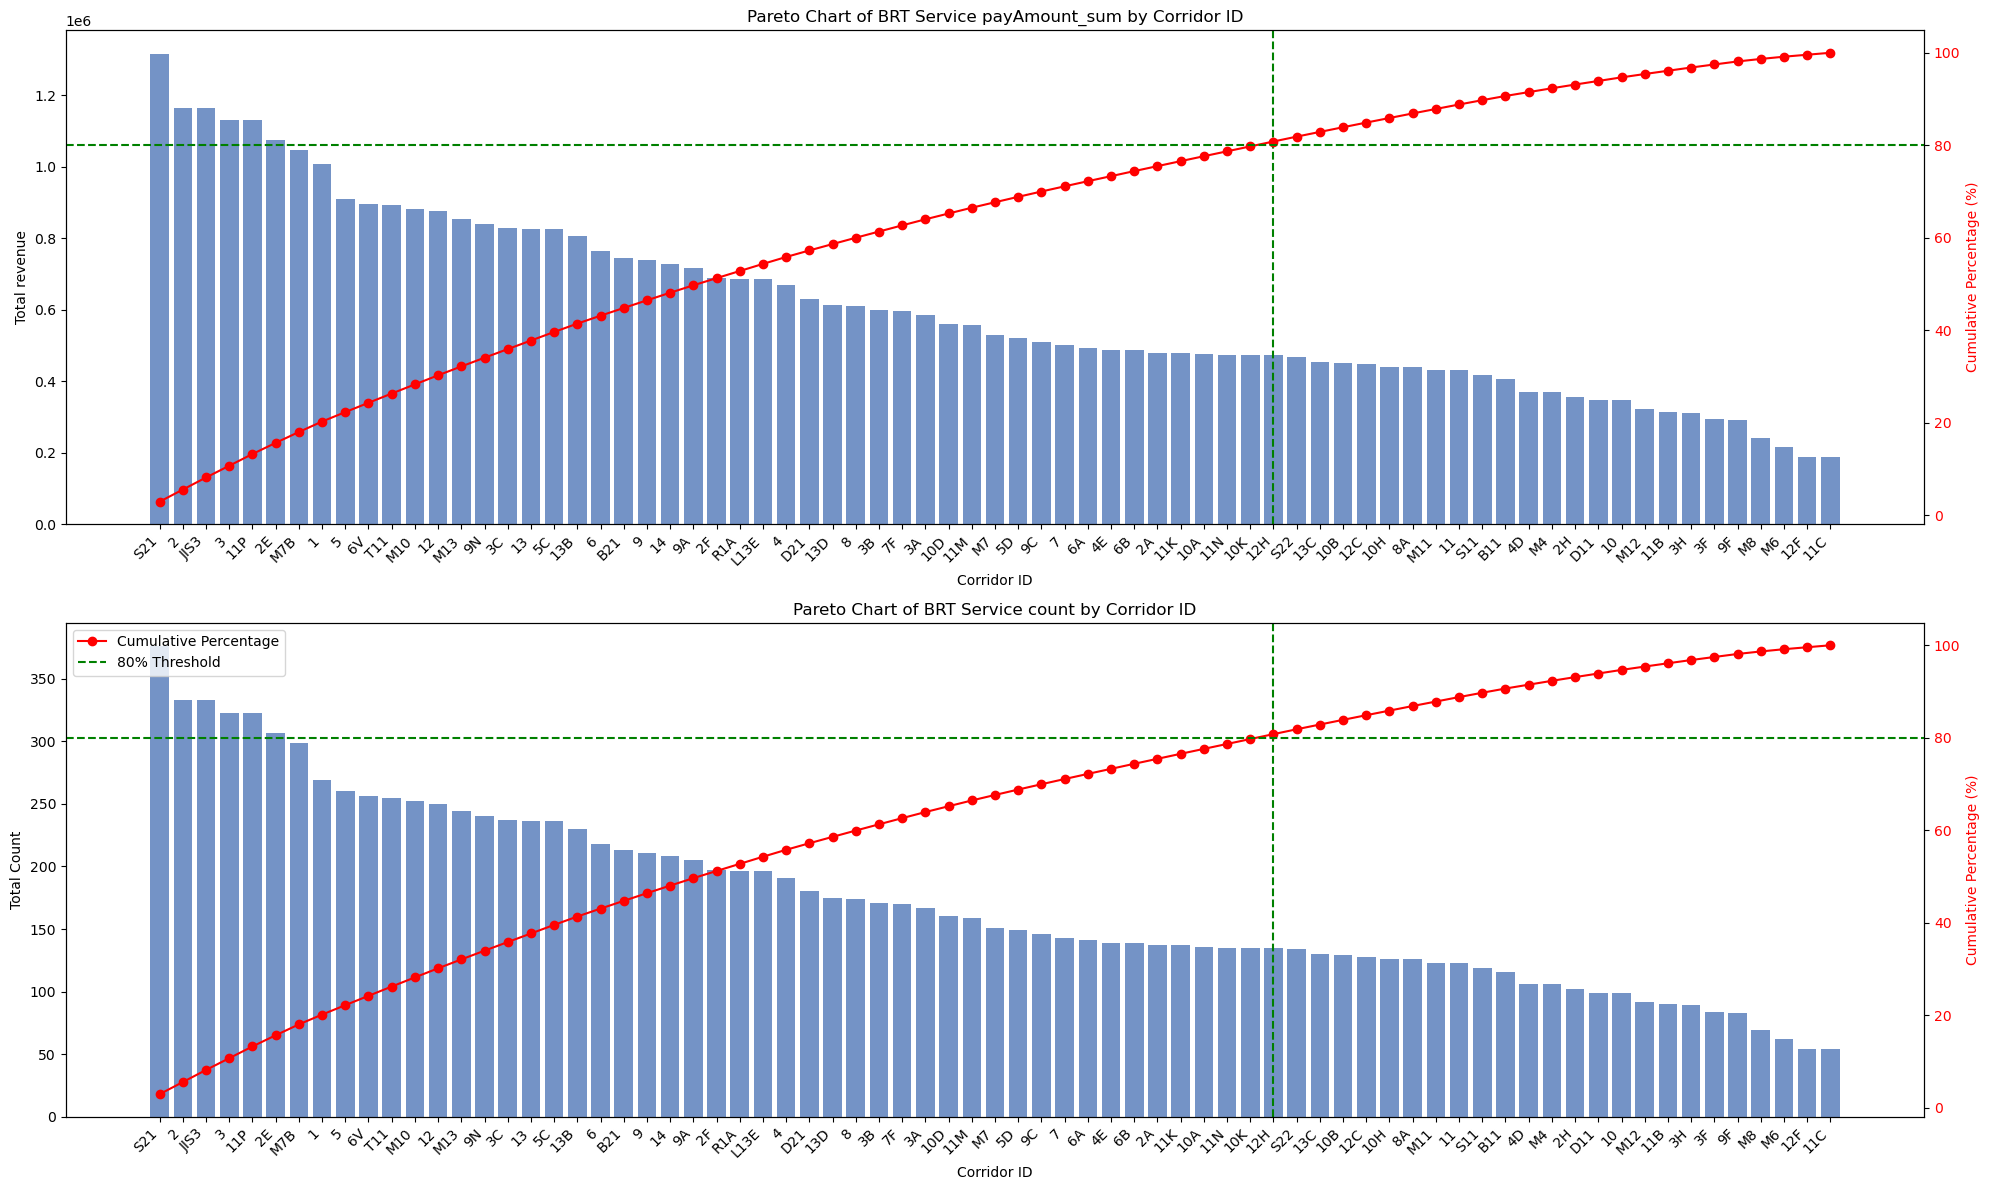

In [251]:
data_list = [('payAmount_sum', 'Total revenue', 'revenue by Corridor ID'), 
             ('count', 'Total Count', 'Count by Corridor ID')]

fig, axes = plt.subplots(2, 1, figsize=(20, 12))

for i, (col_name, label, title) in enumerate(data_list):
    # Sort the DataFrame by the column of interest (col_name)
    brt_count_sorted = brt_count.sort_values(by=col_name, ascending=False)
    
    # Calculate cumulative sum and cumulative percentage
    brt_count_sorted['cumulative_sum'] = brt_count_sorted[col_name].cumsum()
    brt_count_sorted['cumulative_percentage'] = 100 * brt_count_sorted['cumulative_sum'] / brt_count_sorted[col_name].sum()

    # Create bar chart
    ax1 = axes[i]
    ax1.bar(brt_count_sorted['corridorID'], brt_count_sorted[col_name], color='#184ca0', alpha=0.6, label=label)
    ax1.set_xlabel('Corridor ID')
    ax1.set_ylabel(label)
    ax1.tick_params(axis='y')

    # Create cumulative percentage line chart
    ax2 = ax1.twinx()
    ax2.plot(brt_count_sorted['corridorID'], brt_count_sorted['cumulative_percentage'], color='r', marker='o', label='Cumulative Percentage')
    ax2.set_ylabel('Cumulative Percentage (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add a vertical line for the 80% cumulative threshold
    threshold_index = brt_count_sorted[brt_count_sorted['cumulative_percentage'] >= 80].iloc[0].name
    ax1.axvline(x=brt_count_sorted['corridorID'][threshold_index], color='g', linestyle='--', label='80% Threshold')
    ax2.axhline(y=80, color='g', linestyle='--', label='80% Threshold')


    # Rotate x-axis labels
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    # Set title
    ax1.set_title(f'Pareto Chart of BRT Service {col_name} by Corridor ID')

# Add a legend for the threshold line
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='best')

plt.tight_layout()
plt.show()


The simulation results show that after the rerouting, Corridor 1 returns to the top 80% of revenue and passenger volume contributors in the BRT system. With this change, the number of stops on Corridor 1 that fall within the top 80% contributor category has increased to 49, indicating that the rerouting effectively improved Corridor 1's strategic contribution to the overall performance of the BRT network. This result reflects the reroute's positive impact on improving both passenger distribution and revenue generation for the service.

##### **6.3.2.2 Reroute 2: Blok M - Kali Besar Barat (via Kuningan)**

In [252]:
stops_final2 = ['Blok M', 'ASEAN', 'Rawa Barat', 'GOR Sumantri', 'Karet Kuningan', 'Kuningan Madya', 'Setiabudi Utara',
               'Sawah Besar Arah Utara', 'Olimo', 'Monas', 'Mangga Besar Arah Utara', 'Mangga Besar Arah Selatan', 'Harmoni Arah Utara', 'Glodok', 'Kali Besar Barat', 'Bank Indonesia Arah Utara']
reroute_final2 = reroute_latLon[reroute_latLon['stopsName'].isin(stops_final2)]
reroute_final2 = reroute_final2.reset_index()
reroute_final2 = reroute_final2.drop(columns="index")
reroute_final2

stopsName  stopsLat    stopsLon
0      Sawah Besar Arah Utara -6.157418  106.818460
1                       Olimo -6.149300  106.816690
2                       Monas -6.176248  106.822860
3     Mangga Besar Arah Utara -6.153250  106.817536
4   Mangga Besar Arah Selatan -6.153943  106.817952
5          Harmoni Arah Utara -6.162678  106.819663
6                      Glodok -6.144500  106.815450
7            Kali Besar Barat -6.135355  106.811430
8   Bank Indonesia Arah Utara -6.182776  106.822800
9              Kuningan Madya -6.213410  106.830500
10                 Rawa Barat -6.238947  106.816240
11            Setiabudi Utara -6.209189  106.830237
12                      ASEAN -6.239889  106.798970
13             Karet Kuningan -6.216670  106.830737
14               GOR Sumantri -6.221618  106.832245
15                     Blok M -6.243312  106.801750

**Overview of Corridor 1 Second Reroute Option**

The map below depicts Route 1 after re-routing, with orange representing new information and blue representing old information.

In [253]:
new_corridor1_route2 = folium.Map(location=[-6.200000, 106.820000], zoom_start=13)

# Add markers with different colors based on the condition
for _, row in reroute_final2.iterrows():
    color = "blue" if row['stopsName'] in cor1Stops_mapping['stopsName'].values else "orange"
    folium.Marker(
        location=[row['stopsLat'], row['stopsLon']],
        popup=row['stopsName'],
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(new_corridor1_route2)

# Display the map
new_corridor1_route2


In [254]:
switch_stops = reroute_options[reroute_options["stopsName"].isin(reroute_final2["stopsName"])]
switch_stops_min_dist2 = switch_stops.loc[switch_stops.groupby("cor1_stops")["distance_km"].idxmin()]
switch_stops_min_dist2 = switch_stops_min_dist2[switch_stops_min_dist2["distance_km"] < 1]
switch_stops_min_dist2

stopsName       cor1_stops  distance_km  closeby  \
3834                      ASEAN  Kejaksaan Agung         0.09     True   
1578  Bank Indonesia Arah Utara       MH Thamrin         0.59     True   
3826                      ASEAN     Masjid Agung         0.38     True   

      near_mrt  
3834      True  
1578      True  
3826      True

In [255]:
near_mrt = set(near_mrt)
stops_changed = set(switch_stops_min_dist2["cor1_stops"])
unchangedStops2 = near_mrt - stops_changed
unchangedStops2 = list(unchangedStops2)
staying_stops2 = ["Blok M"]
unchangedStops2 = [stop for stop in unchangedStops2 if stop not in staying_stops2]

print(f"The following stops are not rerouted to another stop: {unchangedStops2}")

The following stops are not rerouted to another stop: ['Dukuh Atas', 'Bendungan Hilir', 'Bundaran Senayan', 'Tosari', 'Gelora Bung Karno', 'Bundaran HI', 'Karet Sudirman']


**Potential Customer and revenue Gain and Loss Reroute 2**

**Simulation Data**

In [256]:
stops_map2 = switch_stops_min_dist2.set_index("cor1_stops")["stopsName"].to_dict()

df_simulReroute3 = df
df_simulReroute3.loc[df_simulReroute3["corridorID"] == "1", "tapInStopsName"] = df_simulReroute3.loc[df_simulReroute3["corridorID"] == "1", "tapInStopsName"].map(stops_map2).fillna(df_simulReroute3["tapInStopsName"])
df_simulReroute3.loc[df_simulReroute3["corridorID"] == "1", "tapOutStopsName"] = df_simulReroute3.loc[df_simulReroute3["corridorID"] == "1", "tapOutStopsName"].map(stops_map2).fillna(df_simulReroute3["tapOutStopsName"])



In [257]:
df_simulReroute3_loss = df_simulReroute3[(df_simulReroute3["corridorID"] == "1") & 
                                      ((df_simulReroute3["tapInStopsName"].isin(unchangedStops2)) | 
                                       (df_simulReroute3["tapOutStopsName"].isin(unchangedStops2)))]


df_simulReroute3 = df_simulReroute3[~((df_simulReroute3["corridorID"] == "1") & 
                                      ((df_simulReroute3["tapInStopsName"].isin(unchangedStops2)) | 
                                       (df_simulReroute3["tapOutStopsName"].isin(unchangedStops2))))]

In [258]:
df_simulReroute3_cor1 = df_simulReroute3[df_simulReroute3["corridorID"] == "1"]
df_simulReroute3_nonCor1 = df_simulReroute3[df_simulReroute3["corridorID"] != "1"]

In [259]:
df_simulReroute3_cor1["tapInStopsName"].unique()

array(['Semanggi', 'Blok M', 'Sawah Besar Arah Utara',
       'Bank Indonesia Arah Utara', 'Olimo', 'Monas',
       'Mangga Besar Arah Utara', 'Polda Metro Jaya',
       'Mangga Besar Arah Selatan', 'Harmoni Arah Utara', 'Glodok'],
      dtype=object)

In [260]:
df_simulReroute3_nonCor1

transID            payCardID payCardBank            payCardName  \
0      EIIW227B8L34VB      180062659848800      emoney         Bajragin Usada   
2      DJWR385V2U57TO     4996225095064169         dki          Emong Wastuti   
4      VMLO535V7F95NJ         570928206772       flazz        Embuh Mardhiyah   
11     IIEK980X1O23NZ      347204308990092      emoney  R.M. Labuh Laksmiwati   
12     OPLW560U3S06UG     3536759468239783         dki        Shakila Maryadi   
...               ...                  ...         ...                    ...   
37885  KUXY021D6I25YN       30169751274025         bni        Prasetya Wasita   
37887  UELP204M1S64QX     4068989702474318         dki         Ajimat Pradana   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi        Kamila Mahendra   
37896  YHHK837P6Y95GN     6502902290603767         dki           Titi Siregar   
37899  FMZZ963S4B68ZP         501862539795       flazz      drg. Leo Najmudin   

      payCardSex  payCardBirthDate  age  ageCategory corridorID  \
0           Male              2008   15     Teenager          5   
2         Female              1992   31        Adult        R1A   
4           Male              1982   41        Adult         12   
11        Female              1984   39        Adult        M7B   
12        Female              1988   35        Adult         9A   
...          ...               ...  ...          ...        ...   
37885       Male              1986   37        Adult         3B   
37887     Female              1980   43        Adult         4D   
37895     Female              2004   19  Young Adult         6B   
37896       Male              1974   49        Adult         9N   
37899     Female              1985   38        Adult         13   

                            corridorName  ... stopStartSeq  \
0                  Matraman Baru - Ancol  ...            7   
2                     Pantai Maju - Kota  ...           38   
4                  Tanjung Priok - Pluit  ...            5   
11                          BKN - Blok M  ...           12   
12                      PGC 2 - Grogol 2  ...            4   
...                                  ...  ...          ...   
37885       Rusun Flamboyan - Cengkareng  ...            2   
37887           Pulo Gadung 2 - Kuningan  ...            5   
37895  Ragunan - MH Thamrin via Semanggi  ...            2   
37896             Pinang Ranti - Pramuka  ...            1   
37899                  Ciledug - Tendean  ...            2   

                tapInTime        tapOutStopsName  tapOutStopsLat  \
0     2023-04-03 05:21:44                Tegalan       -6.203101   
2     2023-04-03 05:59:06  Simpang Kunir Kemukus       -6.133731   
4     2023-04-03 06:17:35       Kali Besar Barat       -6.135355   
11    2023-04-03 06:22:10       Mampang Prapatan       -6.242699   
12    2023-04-03 06:15:04               Semanggi       -6.221110   
...                   ...                    ...             ...   
37885 2023-04-08 10:46:06         BSI Cengkareng       -6.147973   
37887 2023-04-04 14:52:31            Pramuka LIA       -6.192238   
37895 2023-04-21 18:18:37                 SMK 57       -6.290967   
37896 2023-04-18 21:52:31           Pinang Ranti       -6.291075   
37899 2023-04-12 21:08:12         Kebayoran Lama       -6.238340   

       tapOutStopsLon stopEndSeq          tapOutTime payAmount  \
0           106.85715         12 2023-04-03 06:00:53    3500.0   
2           106.81475         39 2023-04-03 06:50:55    3500.0   
4           106.81143         15 2023-04-03 06:57:03    3500.0   
11          106.82572         14 2023-04-03 06:50:21    3500.0   
12          106.81354          6 2023-04-03 07:08:31    3500.0   
...               ...        ...                 ...       ...   
37885       106.72781          3 2023-04-08 13:06:42    3500.0   
37887       106.86858          9 2023-04-04 15:38:58    3500.0   
37895       106.82365         13 2023-04-21 19:55:49    3500.0   
37896       10

**Potential Customer and revenue Gain**

In [261]:
df1 = df[df["corridorID"] == "1"]
df3 = df[df["corridorID"] != "1"]
df3 = df3[df3["serviceType"] == "BRT"]

newRoute_density2 = reroute_final2[["stopsName"]]

filtered_df1 = df1[df1["tapInStopsName"].isin(newRoute_density2["stopsName"])]
filtered_df3 = df3[df3["tapInStopsName"].isin(newRoute_density2["stopsName"])]
newRoute_count = {}

data = {
    "before_count": [df1, df3], 
    "after_count": [df_simulReroute3_cor1, df_simulReroute3_nonCor1]
}

for i, j in data.items():
    cor1_TapInCount = j[0][j[0]["tapInStopsName"].isin(newRoute_density2["stopsName"])]["tapInStopsName"].value_counts().reset_index()
    cor1_TapInCount.columns = ['stopsName', 'cor1_tapInCount']
    nonCor1TapInCount = j[1][j[1]["tapInStopsName"].isin(newRoute_density2["stopsName"])]["tapInStopsName"].value_counts().reset_index()
    nonCor1TapInCount.columns = ['stopsName', 'nonCor1_tapInCount']

    cor1TapOutCount = j[0][j[0]["tapOutStopsName"].isin(newRoute_density2["stopsName"])]["tapOutStopsName"].value_counts().reset_index()
    cor1TapOutCount.columns = ['stopsName', 'cor1_tapOutCount']
    nonCor1TapOutCount = j[1][j[1]["tapOutStopsName"].isin(newRoute_density2["stopsName"])]["tapOutStopsName"].value_counts().reset_index()
    nonCor1TapOutCount.columns = ['stopsName', 'nonCor1_tapOutCount']
    
    newRoute_counts = pd.merge(cor1_TapInCount, nonCor1TapInCount, on='stopsName', how='outer')
    newRoute_counts = pd.merge(newRoute_counts, cor1TapOutCount, on='stopsName', how='outer')
    newRoute_counts = pd.merge(newRoute_counts, nonCor1TapOutCount, on='stopsName', how='outer')

    # display(newRoute_counts)

    newRoute_counts.fillna(0, inplace=True)

    newRoute_counts["totalCust"] = (newRoute_counts["cor1_tapInCount"] + 
                                    newRoute_counts["nonCor1_tapInCount"] + 
                                    newRoute_counts["cor1_tapOutCount"] + 
                                    newRoute_counts["nonCor1_tapOutCount"])
    newRoute_counts["totalPayAmount"] = newRoute_counts["totalCust"] * 3500

    newRoute_counts = newRoute_counts.sort_values(by="totalPayAmount", ascending=False).reset_index(drop=True)

    newRoute_count[i] = newRoute_counts
    newRoute_count[i] = pd.DataFrame(newRoute_count[i])



In [262]:
newRoute_custGain2 = pd.merge(newRoute_count["before_count"][["stopsName", "totalCust"]], newRoute_count["after_count"][["stopsName", "totalCust"]], on="stopsName", how="outer")
newRoute_custGain2.columns = ["stopsName", "totalCust_before", "totalCust_after"]
newRoute_custGain2["customerIncreaseRate"] = round(((newRoute_custGain2["totalCust_after"] / newRoute_custGain2["totalCust_before"]) - 1) * 100, 2)
newRoute_custGain2 = newRoute_custGain2.sort_values(by="customerIncreaseRate", ascending=False)

newRoute_custGain2.fillna(0, inplace=True)
newRoute_custGain2 = newRoute_custGain2.reset_index(drop=True)

display(newRoute_custGain2)

newRoute_revenueGain2 = pd.merge(newRoute_count["before_count"][["stopsName", "totalPayAmount"]], newRoute_count["after_count"][["stopsName", "totalPayAmount"]], on="stopsName", how="outer")
newRoute_revenueGain2.columns = ["stopsName", "totalPayAmount_before", "totalPayAmount_after"]
newRoute_revenueGain2["revenueIncreaseRate"] = round(((newRoute_revenueGain2["totalPayAmount_after"] / newRoute_revenueGain2["totalPayAmount_before"]) - 1) * 100, 2)
newRoute_revenueGain2 = newRoute_revenueGain2.sort_values(by="revenueIncreaseRate", ascending=False)

newRoute_revenueGain2.fillna(0, inplace=True)
newRoute_revenueGain2 = newRoute_revenueGain2.reset_index(drop=True)

display(newRoute_revenueGain2)


stopsName  totalCust_before  totalCust_after  \
0                       ASEAN              22.0             22.0   
1                GOR Sumantri              38.0             38.0   
2                      Glodok               3.0              3.0   
3          Harmoni Arah Utara              51.0             51.0   
4            Kali Besar Barat             104.0            104.0   
5              Karet Kuningan             121.0            121.0   
6              Kuningan Madya              94.0             94.0   
7   Mangga Besar Arah Selatan               3.0              3.0   
8                       Monas             190.0            190.0   
9                       Olimo              62.0             62.0   
10                 Rawa Barat             201.0            201.0   
11     Sawah Besar Arah Utara              40.0             40.0   
12            Setiabudi Utara             118.0            118.0   
13  Bank Indonesia Arah Utara             109.0             84.0   
14                     Blok M             119.0             83.0   
15    Mangga Besar Arah Utara              12.0              5.0   

    customerIncreaseRate  
0                   0.00  
1                   0.00  
2                   0.00  
3                   0.00  
4                   0.00  
5                   0.00  
6                   0.00  
7                   0.00  
8                   0.00  
9                   0.00  
10                  0.00  
11                  0.00  
12                  0.00  
13                -22.94  
14                -30.25  
15                -58.33

stopsName  totalPayAmount_before  totalPayAmount_after  \
0                       ASEAN                77000.0               77000.0   
1                GOR Sumantri               133000.0              133000.0   
2                      Glodok                10500.0               10500.0   
3          Harmoni Arah Utara               178500.0              178500.0   
4            Kali Besar Barat               364000.0              364000.0   
5              Karet Kuningan               423500.0              423500.0   
6              Kuningan Madya               329000.0              329000.0   
7   Mangga Besar Arah Selatan                10500.0               10500.0   
8                       Monas               665000.0              665000.0   
9                       Olimo               217000.0              217000.0   
10                 Rawa Barat               703500.0              703500.0   
11     Sawah Besar Arah Utara               140000.0              140000.0   
12            Setiabudi Utara               413000.0              413000.0   
13  Bank Indonesia Arah Utara               381500.0              294000.0   
14                     Blok M               416500.0              290500.0   
15    Mangga Besar Arah Utara                42000.0               17500.0   

    revenueIncreaseRate  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00  
5                  0.00  
6                  0.00  
7                  0.00  
8                  0.00  
9                  0.00  
10                 0.00  
11                 0.00  
12                 0.00  
13               -22.94  
14               -30.25  
15               -58.33

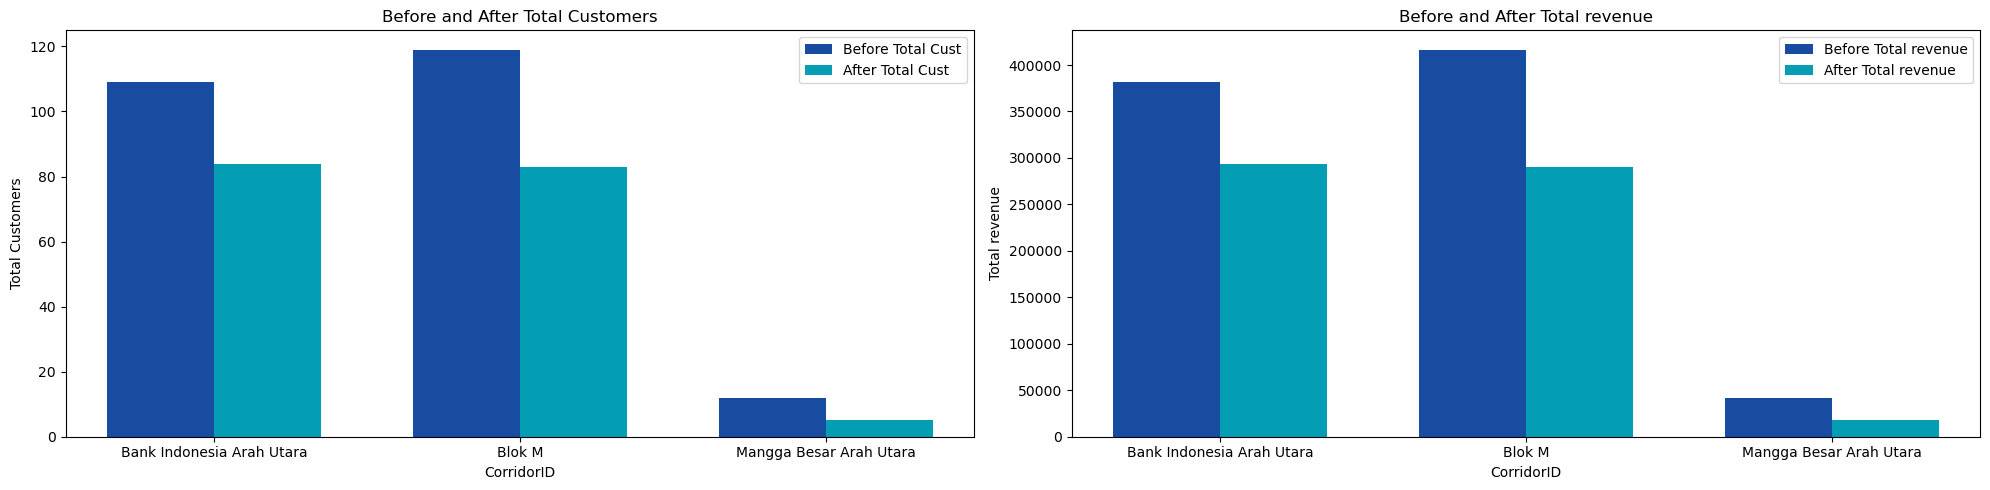

In [263]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# customer gain
bottom3_custGain = newRoute_custGain2.tail(3)
index = np.arange(len(bottom3_custGain))
bar_width = 0.35

axes[0].bar(index, bottom3_custGain["totalCust_before"], bar_width, label='Before Total Cust', color='#184ca0')
axes[0].bar([i + bar_width for i in index], bottom3_custGain["totalCust_after"], bar_width, label='After Total Cust', color='#039eb4')

axes[0].set_xlabel('CorridorID')
axes[0].set_ylabel('Total Customers')
axes[0].set_title('Before and After Total Customers')
axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(bottom3_custGain["stopsName"], rotation=0)
axes[0].legend()

# revenue gain
bottom3_revenueGain = newRoute_revenueGain2.tail(3)
index = np.arange(len(bottom3_revenueGain))
bar_width = 0.35

axes[1].bar(index, bottom3_revenueGain["totalPayAmount_before"], bar_width, label='Before Total revenue', color='#184ca0')
axes[1].bar([i + bar_width for i in index], bottom3_revenueGain["totalPayAmount_after"], bar_width, label='After Total revenue', color='#039eb4')

axes[1].set_xlabel('CorridorID')
axes[1].set_ylabel('Total revenue')
axes[1].set_title('Before and After Total revenue')
axes[1].set_xticks([i + bar_width / 2 for i in index])
axes[1].set_xticklabels(bottom3_revenueGain["stopsName"], rotation=0)
axes[1].legend()


# Display the plot
plt.tight_layout()
plt.show()


In [264]:
penurunan_rate2 = []

for i in range(len(newRoute_custGain2)):
    if newRoute_custGain2["customerIncreaseRate"][i] < 0:
        penurunan_rate2.append(newRoute_custGain2["stopsName"][i])

print(f"\Based on the simulation results, the following stops experienced a decrease in both passengers and revenue, such as {penurunan_rate2}, showing a significant decline in the simulation.\nThis decline is primarily due to the removal of the following stops: {unchangedStops2}")

\Based on the simulation results, the following stops experienced a decrease in both passengers and revenue, such as ['Bank Indonesia Arah Utara', 'Blok M', 'Mangga Besar Arah Utara'], showing a significant decline in the simulation.
This decline is primarily due to the removal of the following stops: ['Dukuh Atas', 'Bendungan Hilir', 'Bundaran Senayan', 'Tosari', 'Gelora Bung Karno', 'Bundaran HI', 'Karet Sudirman']


**How will corridor 1 contribute to BRT service type?**

Text(0.5, 1.0, 'Proportion of Corridor 1 vs Other Corridor revenue\n(BRT Services Only)')

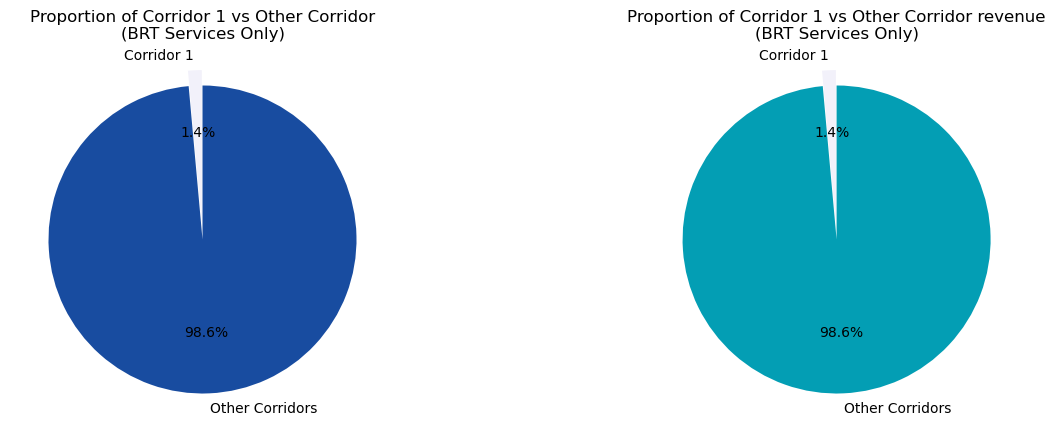

In [265]:
# Cor 1
loss_cust_reroute3 = len(df_simulReroute3_loss)
lost_revenue_reroute3 = loss_cust_reroute3*3500
cor1_cust_reroute3 = len(df_simulReroute3_cor1)
cor1_revenue_reroute3 = cor1_cust_reroute3*3500

# BRT
nonCor1Cust_brtReroute3 = len(df_simulReroute3_nonCor1)
nonCor1Income_brtReroute3 = df_simulReroute3_nonCor1["payAmount"].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

# passenger count
count_data = [cor1_cust_reroute3, nonCor1Cust_brtReroute3]
labels = ["Corridor 1", "Other Corridors"]

axes[0].pie(count_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#184ca0'], startangle=90, explode=(0.1, 0))
axes[0].set_title('Proportion of Corridor 1 vs Other Corridor\n(BRT Services Only)')

# pay Amount
pay_data = [cor1_revenue_reroute3, nonCor1Income_brtReroute3]
labels = ["Corridor 1", "Other Corridors"]

axes[1].pie(pay_data, labels=labels, autopct='%1.1f%%', colors=['#f2f1fa', '#039eb4'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Proportion of Corridor 1 vs Other Corridor revenue\n(BRT Services Only)')



In [266]:
brt_count2 = pd.DataFrame(df_simulReroute3["corridorID"].value_counts())
brt_count2 = brt_count2.reset_index()
brt_count2.columns = ['corridorID', 'count']

payAmount_sum = df[df["serviceType"] == "BRT"].groupby("corridorID")["payAmount"].sum().reset_index()
payAmount_sum.columns = ['corridorID', 'payAmount_sum']

brt_count2 = brt_count2.merge(payAmount_sum, on="corridorID", how="left")

brt_count2["percentage"] = round(brt_count2["count"] / brt_count2["count"].sum(), 2)

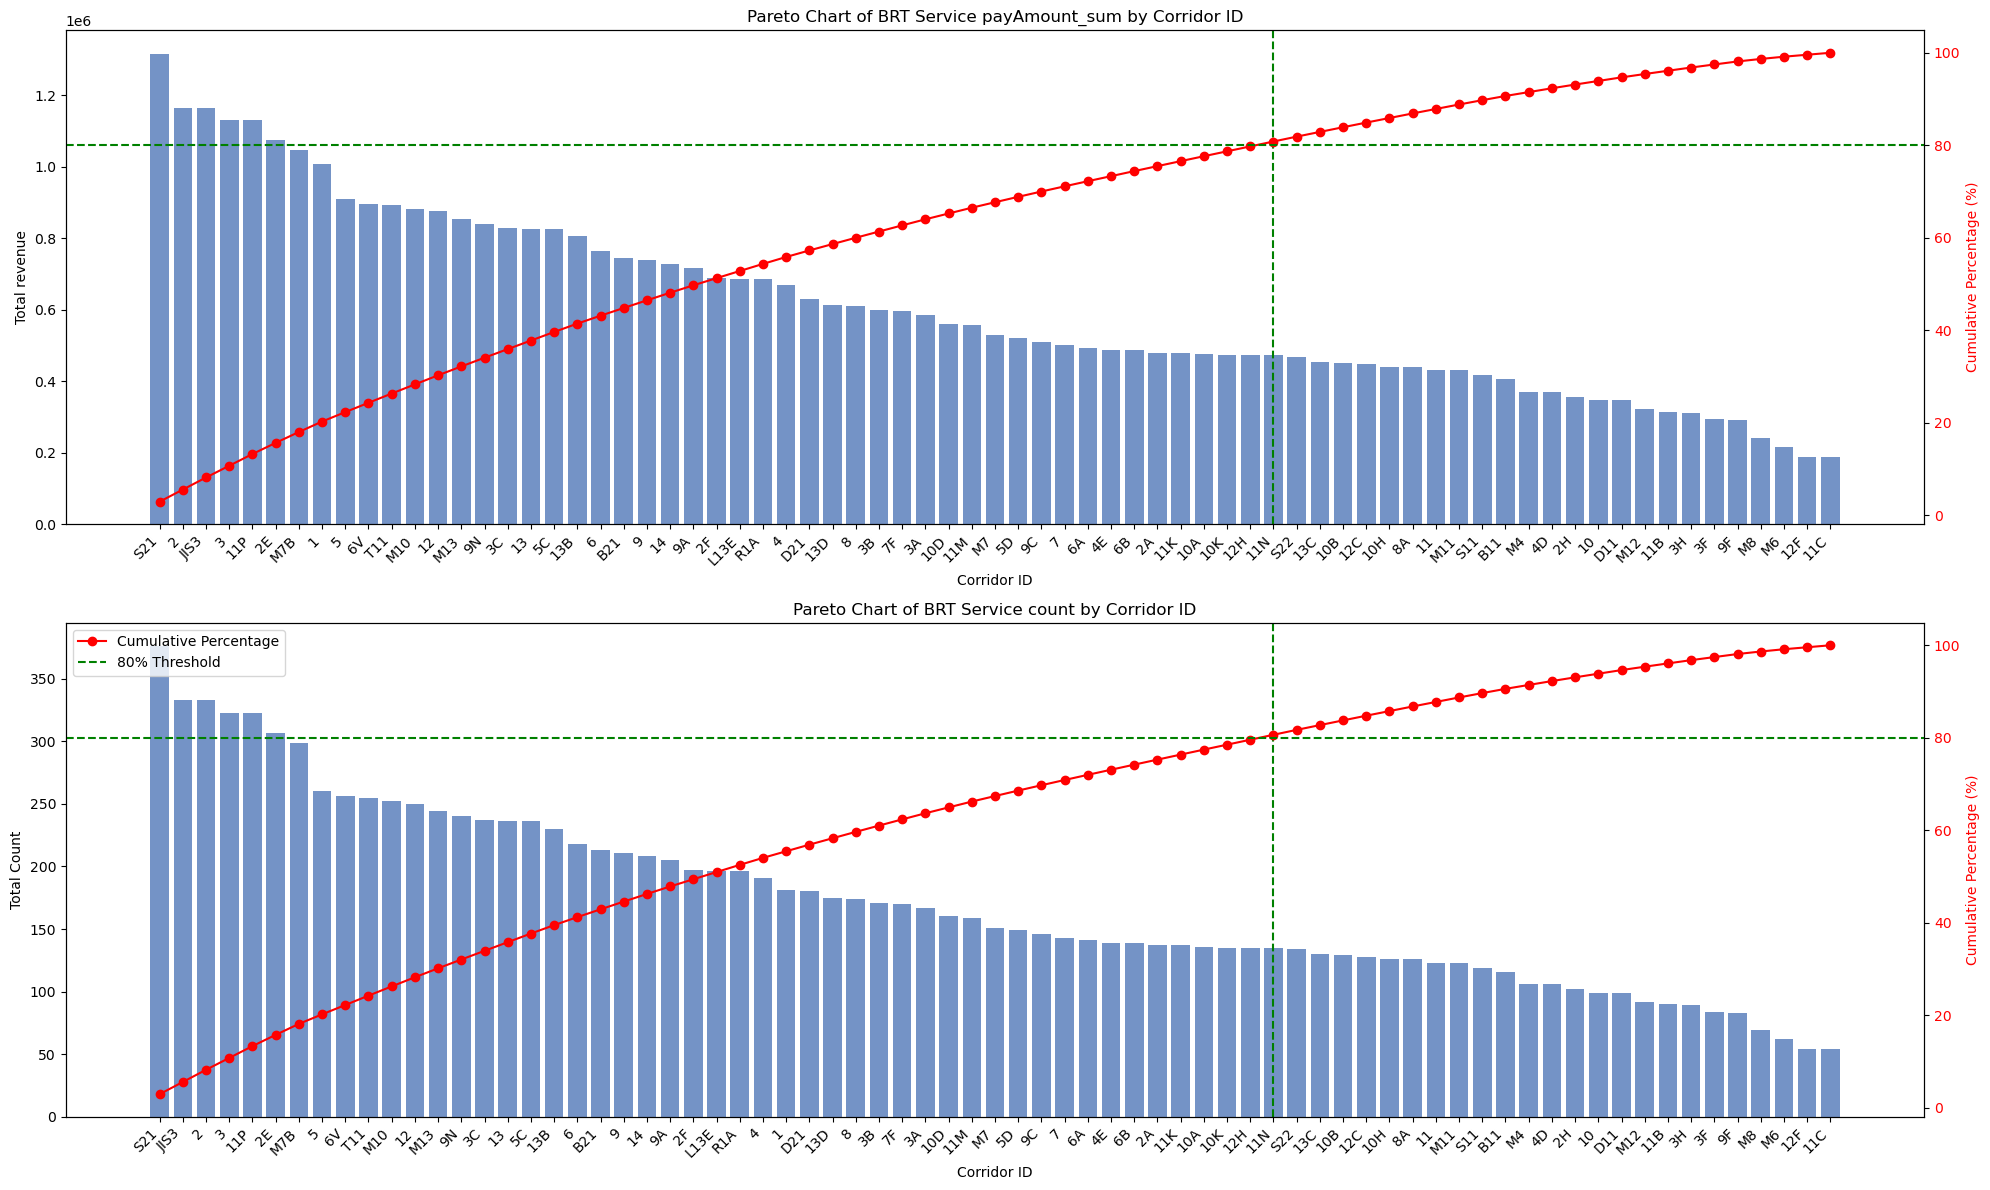

In [267]:
data_list = [('payAmount_sum', 'Total revenue', 'revenue by Corridor ID'), 
             ('count', 'Total Count', 'Count by Corridor ID')]

fig, axes = plt.subplots(2, 1, figsize=(20, 12))

for i, (col_name, label, title) in enumerate(data_list):
    # Sort the DataFrame by the column of interest (col_name)
    brt_count2_sorted = brt_count2.sort_values(by=col_name, ascending=False)
    
    # Calculate cumulative sum and cumulative percentage
    brt_count2_sorted['cumulative_sum'] = brt_count2_sorted[col_name].cumsum()
    brt_count2_sorted['cumulative_percentage'] = 100 * brt_count2_sorted['cumulative_sum'] / brt_count2_sorted[col_name].sum()

    # Create bar chart
    ax1 = axes[i]
    ax1.bar(brt_count2_sorted['corridorID'], brt_count2_sorted[col_name], color='#184ca0', alpha=0.6, label=label)
    ax1.set_xlabel('Corridor ID')
    ax1.set_ylabel(label)
    ax1.tick_params(axis='y')

    # Create cumulative percentage line chart
    ax2 = ax1.twinx()
    ax2.plot(brt_count2_sorted['corridorID'], brt_count2_sorted['cumulative_percentage'], color='r', marker='o', label='Cumulative Percentage')
    ax2.set_ylabel('Cumulative Percentage (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add a vertical line for the 80% cumulative threshold
    threshold_index = brt_count2_sorted[brt_count2_sorted['cumulative_percentage'] >= 80].iloc[0].name
    ax1.axvline(x=brt_count2_sorted['corridorID'][threshold_index], color='g', linestyle='--', label='80% Threshold')
    ax2.axhline(y=80, color='g', linestyle='--', label='80% Threshold')


    # Rotate x-axis labels
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

    # Set title
    ax1.set_title(f'Pareto Chart of BRT Service {col_name} by Corridor ID')

# Add a legend for the threshold line
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='best')

plt.tight_layout()
plt.show()


The simulation results show that after the reroute, Corridor 1 no longer ranks among the top 80% of revenue and passenger contributors in the BRT system. Following the changes, the top 80% of contributors now include 48 stops, indicating that the reroute effectively prioritised high-demand stops for efficiency.

However, the absence of Corridor 1 from this group presents new challenges to Transjakarta management. The operational focus and management strategies that were previously focused on Corridor 1 must now be adjusted to maximise the other corridors that have become the primary focus. This includes revising resource allocation strategies, tracking the performance of the new key corridors, and ensuring that services continue to meet the needs of those affected by the changes.


### **6.4 Scenarios Summary**

To summarize the output based on the analysis, we can create a table that highlights key metrics, focusing on the impact of the rerouting and the changes in passenger count, revenue, and the effect of ticket subsidies.

In [268]:
total_revenue_cor1 = df[df["corridorID"] == "1"]["payAmount"].sum()
total_cust_brt = len(df)
total_revenue_brt = df["payAmount"].sum()

## Delete 1
total_cust_del1 = nonCor1_brtTotalCust_del1
total_rev_del1 = nonCor1_brtTotalRevenue_del1+(total_revenue_cor1-lost_revenue_del1)

## Delete 2
total_cust_del2 = nonCor1_brtTotalCust_del2
total_rev_del2 = nonCor1_brtTotalrevenue_del2+(total_revenue_cor1-lost_revenue_del2)

## Reroute 1
total_cust_re1 = nonCor1_brtTotalCust_reroute1+cor1Cust_reroute1
total_rev_re1 = nonCor1_brtTotalrevenue_reroute1+cor1revenue_reroute1

## Reroute 2
total_cust_re2 = nonCor1Cust_brtReroute2+cor1_cust_reroute2
total_rev_re2 = nonCor1Income_brtReroute2+cor1_revenue_reroute2


## Reroute 3
total_cust_re3 = nonCor1Cust_brtReroute3+cor1_cust_reroute3
total_rev_re3 = nonCor1Income_brtReroute3+cor1_revenue_reroute3

scenario = [
    {"Scenario": "Delete 1", "Total Customers": total_cust_del1, "Total Revenue": total_rev_del1},
    {"Scenario": "Delete 2", "Total Customers": total_cust_del2, "Total Revenue": total_rev_del2},
    {"Scenario": "Reroute 1", "Total Customers": total_cust_re1, "Total Revenue": total_rev_re1},
    {"Scenario": "Reroute 2", "Total Customers": total_cust_re2, "Total Revenue": total_rev_re2},
    {"Scenario": "Reroute 3", "Total Customers": total_cust_re3, "Total Revenue": total_rev_re3},
]

# Convert the list of dictionaries into a DataFrame
df_scenario = pd.DataFrame(scenario)

# Display the DataFrame
df_scenario["Customers Loss"] = total_cust_brt - df_scenario["Total Customers"]
df_scenario["Cor 1 Cust"] = 288 - df_scenario["Customers Loss"]
df_scenario["Lost Revenue"] = total_revenue_brt - df_scenario["Total Revenue"]
df_scenario["Loss Percentage"] = round(df_scenario["Customers Loss"]/(df_scenario["Total Customers"] + df_scenario["Customers Loss"]),3)

# subsidy per tiket
# berdasarkan annual report tahun 2023, halaman 158
subsidy_perCust = 13525
totalSubsidy_tiket =  89708521870 # subsidy per ticket
target_cust = 6632793 # target per corridor
profit_perCust = 2000 #https://jakarta.bpk.go.id/pemprov-dki-jakarta-pangkas-subsidi-transjakarta-rp336-miliar-tarif-bus-bakal-naik/

df_scenario["Profit"]= df_scenario["Total Customers"]*profit_perCust
df_scenario["Ticket Subsidy"]=(df_scenario["Total Customers"]*subsidy_perCust)
df_scenario["Ticket Subsidy Utilization (percent)"] = round((df_scenario["Ticket Subsidy"] / totalSubsidy_tiket)*100,2)
df_scenario["Customers Target Achievement (percent)"] = round((df_scenario["Total Customers"]/target_cust)*100,2)

df_scenario = df_scenario.reset_index().drop(labels="index", axis=1)

display(df_scenario)

df_scenario.to_excel("df_scenario.xlsx")

Scenario  Total Customers  Total Revenue  Customers Loss  Cor 1 Cust  \
0   Delete 1            12447     43564500.0             288           0   
1   Delete 2            12552     44299500.0             183         105   
2  Reroute 1            12492     43722000.0             243          45   
3  Reroute 2            12716     44506000.0              19         269   
4  Reroute 3            12628     44198000.0             107         181   

   Lost Revenue  Loss Percentage    Profit  Ticket Subsidy  \
0     1008000.0            0.023  24894000       168345675   
1      273000.0            0.014  25104000       169765800   
2      850500.0            0.019  24984000       168954300   
3       66500.0            0.001  25432000       171983900   
4      374500.0            0.008  25256000       170793700   

   Ticket Subsidy Utilization (percent)  \
0                                  0.19   
1                                  0.19   
2                                  0.19   
3                                  0.19   
4                                  0.19   

   Customers Target Achievement (percent)  
0                                    0.19  
1                                    0.19  
2                                    0.19  
3                                    0.19  
4                                    0.19

---

## **07. Growth Strategy**

#### **7.1 Analysis Summary**
In analyzing the different scenarios for the BRT system, we focused on key metrics such as total customers, total revenue, customer loss, and ticket subsidy utilization. The analysis explored how rerouting MRT stops affects customer behavior and financial performance.

#### **7.2 Analysis**

1. **Customer Count**: A significant difference in customer counts across the rerouting scenarios was observed. Reroute 2 showed the highest customer retention, with 12,716 customers, which indicates that rerouting MRT stops can have a substantial impact on customer attraction and retention.
2. **Total Revenue**: Reroute 2 also demonstrated the highest total revenue at 44,506,000, confirming that rerouting strategies are not only impactful in terms of customer retention but also in boosting revenue generation.
3. **Ticket Subsidy Utilization**: The ticket subsidy utilization remained consistently high across all scenarios (96% to 98%). This suggests that the efficient allocation of subsidies was maintained despite the changes in rerouting strategies.
4. **Customer Loss and Revenue Loss**:  Reroute 2 showed the least customer loss (only 19 customers) and the lowest revenue loss (66,500), indicating that this rerouting strategy minimizes negative financial and customer impacts. This further reinforces the effectiveness of Reroute 2.

#### **7.3 Key Insights**

From the comparison, Scenario **Reroute 2** stands out as the best option:

1. **Lowest Customer Loss**: Only 19 customers are lost, which is a minimal decrease in customer base compared to other scenarios.
2. **Lowest Revenue Loss**: The lost revenue is only 66,500, making it the least impactful in terms of financial loss.
3. **Highest Ticket Subsidy Utilization**: At 98%, this scenario shows the most efficient use of ticket subsidies.
4. **Highest Total Revenue**: It also has the highest total revenue at 44,506,000, which indicates that rerouting this way maximizes revenue.

The analysis shows that rerouting MRT stops has a significant impact on customer counts and total revenue. Reroute 2 is the most effective strategy, improving both customer retention and financial performance. It minimizes customer loss and revenue loss while maximizing revenue, making it the optimal choice for improving the BRT system's performance.

By prioritizing rerouting over corridor deletions, Reroute 2 demonstrates how such strategies can optimize service quality and financial viability in the long run.
